In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text



class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent, width, height, fontsize,trans):
        tx = Text(width/2., height/2, tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

In [2]:
data = pd.read_csv('answers2.csv')

In [3]:
data.shape

(163, 31)

In [4]:
interesting_columns = [
       'Gender',
       'My position is', 'My working sector is', 
       'My working industry is',
       'What are your net earnings per year?',
       'How do you feel about privacy policies on applications?',
       'Do you feel you should be compensated for sharing your personal data?',
       'How would you value all your personal data?',
       'Do you own a smartphone or tablet?',
       'How many smartphones/tablets do you personally own?',
       'If you have multiple smartphones and/or tablets, please, give answers on the following questions taking in mind your main device.',
       'How many apps have you installed on your smartphone in total?',
       'How many games have you installed on your smartphone?',
       'How many apps have you installed, where you purchase goods?',
       'How many apps have you installed, where you own paid subscriptions?',
       'How many bank’s apps do you have?',
       'How many apps from social networks do you have?',
       'How many installed payment systems do you have?',
       'Where are you from?',
       'What kind of smartphone do you use?',
       'Thank you for attention. If you would like, you can write any comments here:',
       'Where did you find the survey?',
       'Age'
]

GENDER = 'Gender'
POSITION = 'My position is'
WORKING_SECTOR = 'My working sector is'
WORKING_INDUSTRY = 'My working industry is'
EARNINGS = 'What are your net earnings per year?'
FEEL_ABOUT_POLICIES = 'How do you feel about privacy policies on applications?'
COMPENSATION = 'Do you feel you should be compensated for sharing your personal data?'
DATA_VALUE = 'How would you value all your personal data?'
HAVE_SMARTPHONE = 'Do you own a smartphone or tablet?'
SMARTPHONE_COUNT = 'How many smartphones/tablets do you personally own?'
MAIN_SMARTPHONE = 'If you have multiple smartphones and/or tablets, please, give answers on the following questions taking in mind your main device.'
COUNT_TOTAL_APPS = 'How many apps have you installed on your smartphone in total?'
COUNT_GAMES = 'How many games have you installed on your smartphone?'
COUNT_PURCHASE_GOODS = 'How many apps have you installed, where you purchase goods?'
COUNT_SUBSCRIPTIONS = 'How many apps have you installed, where you own paid subscriptions?'
COUNT_BANKS = 'How many bank’s apps do you have?'
COUNT_SOCIAL = 'How many apps from social networks do you have?'
COUNT_PAYMENTS = 'How many installed payment systems do you have?'
WHERE_ARE_YOU = 'Where are you from?'
SMARTPHONE_TYPE = 'What kind of smartphone do you use?'
COMMENTS = 'Thank you for attention. If you would like, you can write any comments here:'
SURVEY_SOURCE = 'Where did you find the survey?'
AGE = 'Age'

def print_columns():
    print("GENDER = 'Gender'")
    print("POSITION = 'My position is'")
    print("WORKING_SECTOR = 'My working sector is'")
    print("WORKING_INDUSTRY = 'My working industry is'")
    print("EARNINGS = 'What are your net earnings per year?'")
    print("FEEL_ABOUT_POLICIES = 'How do you feel about privacy policies on applications?'")
    print("COMPENSATION = 'Do you feel you should be compensated for sharing your personal data?'")
    print("DATA_VALUE = 'How would you value all your personal data?'")
    print("HAVE_SMARTPHONE = 'Do you own a smartphone or tablet?'")
    print("SMARTPHONE_COUNT = 'How many smartphones/tablets do you personally own?'")
    print("MAIN_SMARTPHONE = 'If you have multiple smartphones and/or tablets, please, give answers on the following questions taking in mind your main device.'")
    print("COUNT_TOTAL_APPS = 'How many apps have you installed on your smartphone in total?'")
    print("COUNT_GAMES = 'How many games have you installed on your smartphone?'")
    print("COUNT_PURCHASE_GOODS = 'How many apps have you installed, where you purchase goods?'")
    print("COUNT_SUBSCRIPTIONS = 'How many apps have you installed, where you own paid subscriptions?'")
    print("COUNT_BANKS = 'How many bank’s apps do you have?'")
    print("COUNT_SOCIAL = 'How many apps from social networks do you have?'")
    print("COUNT_PAYMENTS = 'How many installed payment systems do you have?'")
    print("WHERE_ARE_YOU = 'Where are you from?'")
    print("SMARTPHONE_TYPE = 'What kind of smartphone do you use?'")
    print("COMMENTS = 'Thank you for attention. If you would like, you can write any comments here:'")
    print("SURVEY_SOURCE = 'Where did you find the survey?'")
    print("AGE = 'Age'")
    
COMPENSATION_MOSTLY_YES_1 = 'Mostly yes, depending on the personal data and goals;'
COMPENSATION_MOSTLY_YES_2 = 'Mostly yes, depending on the personal data;'
COMPENSATION_STRONG_YES = 'Yes, I strongly believe that companies should pay me for personal data;'
COMPENSATION_FREE = 'No, I’m fine to give my personal data for free;'

In [5]:

def tr_gender(x):
    if x == 'Male':
        return 0
    if x == 'Female':
        return 1
    return 2

def tr_earnings(x):
    if x == '< $40000':
        return 1
    if x == '$40000 - $70000':
        return 2
    if x == '$70000 - $150000':
        return 3
    if x == '$150000 - $400000':
        return 4
    if x == '> $400000':
        return 5
    return -1

def tr_feelings_bar(x):
    if x == "I don’t care, I just check “Agree”;":
        return x
    if x == "Never read it, still care but not enough to not use the app":
        return 'Other'
    if x == 'What policies?':
        return 'Other'
    if x == "I’m annoyed of these policies, and check “Agree”;":
        return x
    if x == "I don't always read. They are usually too long.":
        return 'Other'
    if x == "I always read it and agree, even if I don’t want to, but need to use the app;":
        return x
    if x == "I don't read them, but I'm generally aware of what they are about":
        return 'Other'
    if x == 'I decline them when I can':
        return 'Other'
    if x == "If I need it I agree, if I don't need it I read some.":
        return 'Other'
    if x == 'I usually agree, but am leary with some':
        return 'Other'
    if x == 'I always read it and only agree, when I want to;':
        return x
    if x == "free/libre open source applications, thank you":
        return 'Other'
    return x

def tr_feelings(x):
    x = tr_feelings_bar(x)
    if x == "I don’t care, I just check “Agree”;":
        return 1
    if x == "I’m annoyed of these policies, and check “Agree”;":
        return 2
    if x == "I always read it and agree, even if I don’t want to, but need to use the app;":
        return 3
    if x == 'I always read it and only agree, when I want to;':
        return 4
    if x == 'Other':
        return 5
#     if x == "Never read it, still care but not enough to not use the app":
#         return 0
#     if x == 'What policies?':
#         return 0
#     if x == "I’m annoyed of these policies, and check “Agree”;":
#         return 1
#     if x == "I don't always read. They are usually too long.":
#         return 1
#     if x == "I always read it and agree, even if I don’t want to, but need to use the app;":
#         return 2
#     if x == "I don't read them, but I'm generally aware of what they are about":
#         return 2
#     if x == 'I decline them when I can':
#         return 2
#     if x == "If I need it I agree, if I don't need it I read some.":
#         return 2
#     if x == 'I usually agree, but am leary with some':
#         return 2
#     if x == 'I always read it and only agree, when I want to;':
#         return 3
#     if x == "free/libre open source applications, thank you":
#         return 3
    return -1

def tr_compensation(x):
    if x == 'No, I don’t want them to get any of my personal data, even if they pay;':
        return 5
    if x == 'Yes, I strongly believe that companies should pay me for personal data;':
        return 4
    if x == 'Mostly yes, depending on the personal data and goals;':
        return 3
    if x == 'Mostly yes, depending on the personal data;':
        return 3
    if x == 'No, I’m fine to give my personal data for free;':
        return 2
    if x == "depends on the data; if i'm basically anonymous then whatever.":
        return 3
    if x == 'Yes for product marketing, no for non-profit marketing':
        return 3
    if x == 'You never give your data for free, you get the service in exchange':
        return 1
    return -1

def tr_data_value(x):
    if x == 'Free;':
        return 0
    if x == 'Low cost;':
        return 1
    if x == 'Average cost;':
        return 2
    if x == 'Expensive;':
        return 3
    if x == 'Extremely expensive;':
        return 4
    return -1

def tr_count_smartphone(x):
    if x == '>= 5':
        return 5
    try:
        return int(x)
    except:
        return -1

def tr_some_count(x):
    try:
        return int(x)
    except:
        if x == '20+':
            return 21
        if x == '80-85 maybe':
            return 80
        if x == '<15':
            return 14
        if x == '20÷':
            return 20
        if x == "I can't even count them all. Maybe 50?":
            return 50
        if x == '>40':
            return 41
        if x == '100 +':
            return 100
        if x == 'Approximately 50':
            return 50
        if x == '30+':
            return 31
        if x == '50 counting the standard apps on my phone, 32 without counting the standard apps':
            return 32
        if x == 'More than 20':
            return 21
        if x == '40+':
            return 41
        if x == 'none':
            return 0
        if x == '~5':
            return 5
        if x == '5 at most':
            return 5
        if x == "7 where I can pay for it, but I've only payed in 2 of them":
            return 2
        if x == '>10':
            return 11
        if x == 'About 3.':
            return 3
        if x == 'None':
            return 0
        if x == 'About 5.':
            return 5
        if x == 'yes':
            return 1
        if x == 'Unsure':
            return 0
        if x == '...... not sure':
            return 0
        if x == 'over 10':
            return 10
        if x == 'Not sure':
            return 0
        if x == '7+':
            return 8
        if x == "I didn't understand this question ":
            return 0
        if x == 'around 30':
            return 30
        if x == '6 or 9':
            return 7
        if x == 'Refused' or x == 'Refused ':
            return 0
        if x == "Pinterest, Facebook, Line, Instagram":
            return 4
        if x == "Over 20? ":
            return 20
        if x == "maybe 25":
            return 25
        if x == "maybe 3":
            return 3
        if x == "2 (Calm, Headspace)":
            return 2
        if x == "2 (BOA and Chase) ":
            return 2
        if x == "Amazon mostly ":
            return 1
        if x == "<2":
            return 1
#         "Over 20? "
# "Rhbs"
# "dsa"
# "maybe 25"
# "<2"
# "Bbd"
# "asdf"
# "Amazon mostly "
# "S"
# "dfa"
# "maybe 3"
# "2 (Calm, Headspace)"
# "Bh"
# "sdf"
# "2 (BOA and Chase) "
# "Xbd"
# "asdf"
# "Pinterest, Facebook, Line, Instagram"
# "Bd"
# "SFA"
# "Bdb"
# "asdf"
# "what?"
        
    print('"' + x + '"')
    return -1
    
def tr_count_total_apps(x):
    return tr_some_count(x)

def tr_count_games(x):
    return tr_some_count(x)

def tr_count_purchase_good(x):
    return tr_some_count(x)

def tr_count_subscriptions(x):
    return tr_some_count(x)

def tr_count_banks(x):
    return tr_some_count(x)

def tr_count_social(x):
    return tr_some_count(x)

def tr_count_payments(x):
    return tr_some_count(x)

def tr_smartphone_type(x):
    apple = 1
    android = 2
    if x == 'iOS':
        return apple
    if x == 'Android':
        return android
    if x == 'Android phone and iOS Ipad Air':
        return android
    if x == 'Android and Ios':
        return apple
    if x == 'iphone':
        return apple
    if x != x:
        return 0
    return -1

def tr_country(x):
    if x == x:
        x = x.strip()
    if x == 'United Kingdom':
        return 'UK'
    if x == 'US' or x == 'us':
        return 'USA'
    if x == 'England':
        return 'UK'
    if x == 'United States':
        return 'USA'
    if x == 'Texas':
        return 'USA'
    if x == 'U.S.':
        return 'USA'
    if x == 'Long Island, New York':
        return 'USA'
    if x == 'Florida':
        return 'USA'
    if x == 'Ireland/England':
        return 'Ireland'.upper()
    if x == 'London':
        return 'UK'
    if x == 'ENgland':
        return 'UK'
    if x == 'lincoln':
        return 'USA'
    if x == 'United States of America' or x == 'united states' or x == 'United states':
        return 'USA'
    if x == 'NH':
        return 'Netherlands'.upper()
    if x == 'Seattle':
        return 'USA'
    if x == 'USA, New York':
        return 'USA'
    if x == 'Dublin':
        return 'Ireland'.upper()
    if x == 'Washington, DC':
        return 'USA'
    if x == 'Britain':
        return 'UK'
    if x == 'Connecticut':
        return 'USA'
    if x == 'Nevada':
        return 'USA'
    if x == 'Odenton, MD':
        return 'USA'
    if x == 'maastricht':
        return 'Netherlands'.upper()
    if x == 'The United Kingdom':
        return 'UK'
    if x == 'United Kingdom':
        return 'UK'
    if x == 'North carolina':
        return 'USA'
    if x == x and (x.strip() == 'England' or x.strip() == 'Britain' or x.strip() == 'Britian' or x == 'england'):
        return 'UK'
    if x == 'united states':
        return 'USA'
    if x == 'Amsterdam' or x == 'The Netherlands' or x == 'Holland':
        return 'Netherlands'.upper()
    if x == 'Leeds':
        return 'UK'
    if x == 'Bellingham, WA':
        return 'USA'
    if x == 'Utah, USA' or x == 'Phoenix' or x == 'Seattle, Washington' or x == 'Pennsylvania' or x == 'Richmond, VA':
        return 'USA'
    if x == 'Prefer not to say':
        return 'N/A'
    if x == 'los angeles, ca':
        return 'USA'
    if x == 'Grmany':
        x = 'Germany'
    if x == 'califrona':
        return 'USA'
    if x == x:
        x = x.upper()
        if x == 'FLORIDA':
            return 'USA'
        if x == 'AMERICA':
            return 'USA'
        if x == 'TEST' or x == 'AA':
            return 'N/A'
    else:
        return 'N/A'
    return x

def tr_position(x):
    if x == 'Student' or x == 'Intern':
        return 0
    if x == 'Individual Contributor':
        return 1
    if x == 'Manager':
        return 2
    if x == 'Owner':
        return 3
    if x == 'Director':
        return 4
    if x == 'C-Level':
        return 5

In [6]:
data[SMARTPHONE_TYPE].map(tr_smartphone_type).value_counts()

1    82
2    70
0    11
Name: What kind of smartphone do you use?, dtype: int64

In [7]:
transformation = {
    GENDER: tr_gender,
    POSITION: tr_position,
    EARNINGS: tr_earnings,
    FEEL_ABOUT_POLICIES: tr_feelings,
    COMPENSATION: tr_compensation,
    DATA_VALUE: tr_data_value,
    SMARTPHONE_COUNT: tr_count_smartphone,
    COUNT_TOTAL_APPS: tr_count_total_apps,
    COUNT_GAMES: tr_count_games,
    COUNT_PURCHASE_GOODS: tr_count_purchase_good,
    COUNT_SUBSCRIPTIONS: tr_count_subscriptions,
    COUNT_BANKS: tr_count_banks,
    COUNT_SOCIAL: tr_count_social,
    COUNT_PAYMENTS: tr_count_payments,
    WHERE_ARE_YOU: tr_country,
    SMARTPHONE_TYPE: tr_smartphone_type
}

In [8]:
def transform_dataset(d):
    ted = d.copy()
    for c, t in transformation.items():
        ted[c+'_norm'] = ted[c].map(t)
    return ted

In [9]:
data = transform_dataset(data)

"Rhbs"
"dsa"
"Bbd"
"asdf"
"S"
"dfa"
"Bh"
"sdf"
"Xbd"
"asdf"
"Bd"
"SFA"
"Bdb"
"asdf"
"what?"


In [10]:
data.columns

Index(['Отметка времени', 'Name:',
       'Date of birth (please, use MM/DD/YYYY format):', 'Gender',
       'My position is', 'My working sector is', 'My working industry is',
       'What are your net earnings per year?',
       'How do you feel about privacy policies on applications?',
       'Do you feel you should be compensated for sharing your personal data?',
       'How would you value all your personal data?',
       'Do you own a smartphone or tablet?',
       'How many smartphones/tablets do you personally own?',
       'If you have multiple smartphones and/or tablets, please, give answers on the following questions taking in mind your main device.',
       'How many apps have you installed on your smartphone in total?',
       'How many games have you installed on your smartphone?',
       'How many apps have you installed, where you purchase goods?',
       'How many apps have you installed, where you own paid subscriptions?',
       'How many bank’s apps do you have?',
 

In [11]:
dropped = data.drop(columns=['Отметка времени', 'Name:', 
                             'Date of birth (please, use MM/DD/YYYY format):', 
                             'Redeem Survey Code with one click: https://www.surveycircle.com/QRZZ-GM38-PG35-653D',
                            'Thank you for attention. If you would like, you can write any comments here:',
                            'If you would like to stay informed about the topic, please, type email (we are planning to solve the problem,  send you results, no other spam mails).',
                            'Unnamed: 30',
                            'surveyswap.io link to get credits (click):  https://surveyswap.io/sr/Qw0VXTkeyKitIReP',
                            'What is your SurveyTandem user name? (Please ignore this question if you are not a https://www.surveytandem.com user.)',
                            'Where did you find the survey?',
                            'If you have multiple smartphones and/or tablets, please, give answers on the following questions taking in mind your main device.',
                            'Do you own a smartphone or tablet?'])

In [12]:
dropped.to_csv('processed2.csv')

In [13]:
dropped['Age']

0                     28
1                     23
2                     40
3                     28
4                     29
5                     21
6                     25
7                     21
8                     25
9                     32
10                    21
11                    22
12                    28
13                    21
14                    21
15                    25
16                    28
17                    23
18                    22
19                    24
20                    21
21                    39
22                    23
23                   NaN
24                    25
25                    22
26                    21
27                    23
28                    21
29                    22
             ...        
133                   22
134                   22
135                   41
136                   26
137                   26
138                   35
139    prefer not to say
140                   46
141                   40


In [14]:
interesting_columns_normed = []
for c in transformation.keys():
    interesting_columns_normed.append(c + '_norm') 

In [15]:
def to_bar_data(df, column, map_func = None):
    if map_func is not None:
        vc = pd.DataFrame(df[column].map(map_func).value_counts()).reset_index()
    else:
        vc = pd.DataFrame(df[column].value_counts()).reset_index()
    vc.columns = [column, 'count']
    return vc

def rotateTickLabels(ax, rotation, which, rotation_mode='anchor', ha='right'):
    axes = []
    if which in ['x', 'both']:
        axes.append(ax.xaxis)

    elif which in ['y', 'both']:
        axes.append(ax.yaxis)

    for axis in axes:
        for t in axis.get_ticklabels():
            t.set_horizontalalignment(ha)
            t.set_rotation(rotation)
            t.set_rotation_mode(rotation_mode)
            
def map_earnings(x):
    if x == '> $400000' or x == '$150000 - $400000':
        return '>= \$150000'
    if x == x:
        return x.replace('$', '\$')
    return x

In [16]:
def filter_small_earnings(df):
    return df[(df[EARNINGS + '_norm'] != 4) & (df[EARNINGS + '_norm'] != 5)]

def filter_gender(df):
    return df[df[GENDER + '_norm'] != 2]

def filter_na_age(df):
    def map_age_internal(x):
        if x != x or x == 'prefer not to say':
            return 'N/A'
        return x
    return df[df[AGE].map(map_age_internal) != 'N/A']

def filter_country(df):
    return df[df[WHERE_ARE_YOU + '_norm'] != 'N/A']

def filter_feealings(df):
    return df[df[FEEL_ABOUT_POLICIES + '_norm'] != -1]


def filter_numbers(df):
    number_columns = ['How many apps have you installed on your smartphone in total?',
       'How many games have you installed on your smartphone?',
       'How many apps have you installed, where you purchase goods?',
       'How many apps have you installed, where you own paid subscriptions?',
       'How many bank’s apps do you have?',
       'How many apps from social networks do you have?',
       'How many installed payment systems do you have?']
    for c in number_columns:
        df = df[df[c + '_norm'] != -1]
    return df

In [17]:
def apply_filters(df):
    df = filter_small_earnings(df)
    df = filter_gender(df)
    df = filter_na_age(df)
    df = filter_country(df)
    df = filter_feealings(df)
    df = filter_numbers(df)
    return df.reset_index()

In [18]:
filtered_data = apply_filters(data)

In [19]:
filtered_data.to_csv('filtered_data.csv')

In [20]:
students = filtered_data[(filtered_data[POSITION] == 'Student') | (filtered_data[POSITION] == 'Intern')]
earners  = filtered_data[(filtered_data[POSITION] != 'Student') & (filtered_data[POSITION] != 'Intern')]

In [21]:
def get_students(df):
    return df[(df[POSITION] == 'Student') | (df[POSITION] == 'Intern')]

def get_earners(df):
    return df[(df[POSITION] != 'Student') & (df[POSITION] != 'Intern')]

In [22]:
for column in interesting_columns:
    try:
        print(column + ':\n')
        print(filtered_data[column].value_counts())
        print('\n')
    except:
        pass

Gender:

Female    101
Male       51
Name: Gender, dtype: int64


My position is:

Student                   112
Individual Contributor     18
Manager                     9
Owner                       8
Intern                      3
Director                    2
Name: My position is, dtype: int64


My working sector is:

Student                            59
Marketing                          12
Engineering                         9
Art/Creative/Design                 9
Consulting                          6
IT                                  6
Not Applicable                      5
Healthcare Provider                 5
Sales                               5
Educator/Instructor                 5
Customer Service                    5
Advertising                         4
Accounting                          3
Product Management                  3
Research/Analytics                  3
Business/Strategy                   3
Legal/Compliance                    2
Management                     

In [23]:
def add_percentage(df, ax):    
    total = df['count'].sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        perc_len = (len(percentage) * 2.5) / 100
        if perc_len > p.get_width() / 2:
            x = p.get_x()
        else:
            x = p.get_x() + (p.get_width() - perc_len) / 2
#         x = p.get_x() + p.get_width() / 2 - diff
        y = p.get_y() + p.get_height() + 0.03
        ax.annotate(percentage, (x, y))

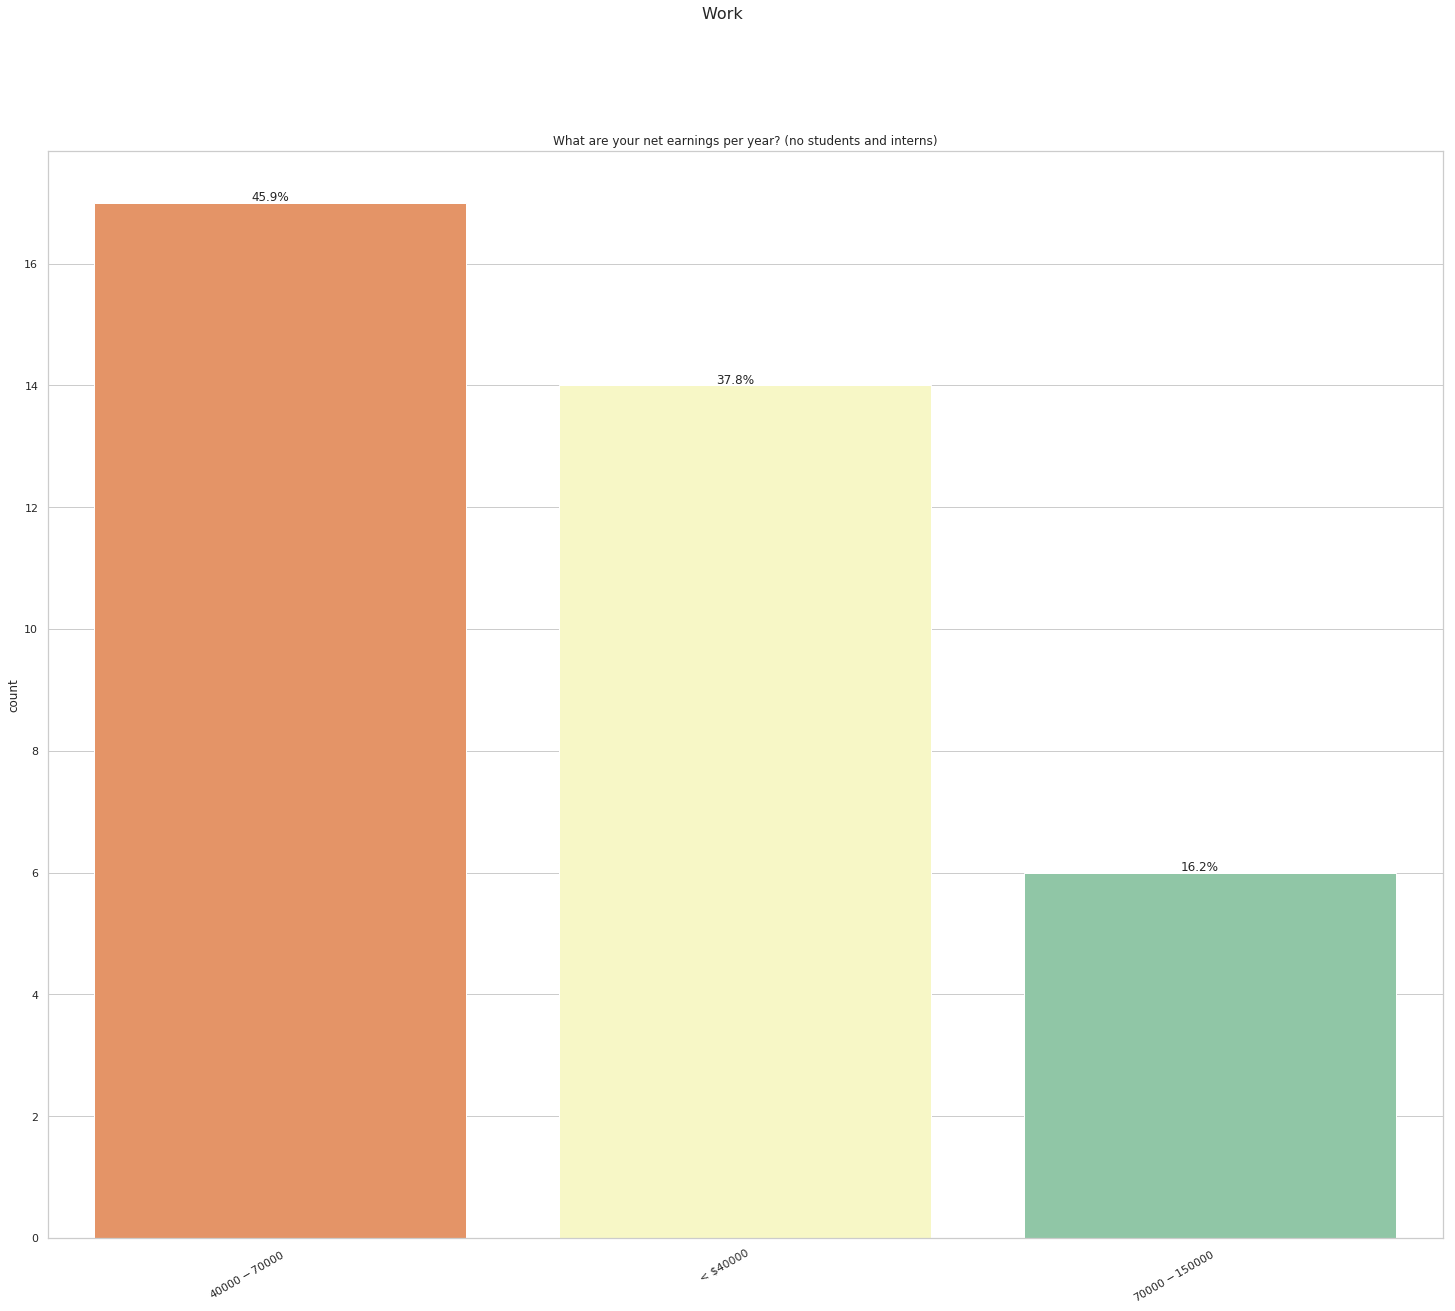

In [24]:
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

# source_data = pd.DataFrame(source_counts).reset_index()
# flavor_data = pd.DataFrame(flavor_counts).reset_index()

fig = plt.figure(2, figsize=(25,20))
# fig, ax = plt.subplots()
the_grid = GridSpec(1, 1)

df = to_bar_data(earners, EARNINGS)
plt.subplot(the_grid[0, 0], title=EARNINGS + ' (no students and interns)')
gearn = sns.barplot(x=EARNINGS, y='count', data=df, palette='Spectral')
rotateTickLabels(gearn, 30, 'x')
plt.xlabel('')
add_percentage(df, gearn)

plt.suptitle('Work', fontsize=16)

# ... plot stuff
plt.subplots_adjust(hspace=0.3)

In [25]:
countries = pd.DataFrame(filtered_data[WHERE_ARE_YOU + '_norm'].value_counts()).reset_index()
countries.columns = [WHERE_ARE_YOU + '_norm', 'count']

In [26]:
countries.to_csv('filtered_countries.csv')

In [27]:
def tr_cut_countries(x):
    if x in ('PORTUGAL', 'SWITZERLAND', 'SERBIA', 'SCOTLAND', 'LATVIA', 'BELGIUM', 'AUSTRIA', 'NORWAY', 'ITALY', 'GERMANY',
            'IRELAND', 'NETHERLANDS', 'SWEDEN', 'FRANCE', 'POLAND'):
        return 'Europe without UK'
#     if x in ('TURKEY', 'KAZAKHSTAN', 'GREECE', 'PAKISTAN', 'CHINA'):
#         return 'Asia'
#     if x == 'ASIA':
#         return 'Asia'
    if x not in ('USA', 'UK'):
        return 'Other'
    return x

In [28]:
def map_age(x):
    if x != x or x == 'prefer not to say':
        return 'N/A'
    x = int(x)
    if x < 18:
        return '0 <= x < 18'
    if x < 25:
        return '18 <= x < 25'
    if x < 35:
        return '25 <= x < 35'
    if x < 45:
        return '35 <= x < 45'
    return '>= 45'

In [29]:
cut_countries = pd.DataFrame(filtered_data[WHERE_ARE_YOU + '_norm'].map(tr_cut_countries).value_counts()).reset_index()
cut_countries.columns = [WHERE_ARE_YOU + '_norm', 'count']

In [30]:
ages = pd.DataFrame(filtered_data[AGE].map(map_age).value_counts()).reset_index()
ages.columns = [AGE, 'count']

In [31]:
def map_age_for_not_students(x):
    if map_age(x) != '< 35':
        return map_age(x)
    return 'between 26 and 35'

In [32]:
gender_dist = pd.DataFrame(filtered_data[GENDER].value_counts()).reset_index()
gender_dist.columns = [GENDER, 'count']

In [33]:
def print_opinions(dataset, title_postfix = ''):
    sns.set(style="whitegrid")
    #sns.set_color_codes("Spectral")

    # source_data = pd.DataFrame(source_counts).reset_index()
    # flavor_data = pd.DataFrame(flavor_counts).reset_index()

    plt.figure(2, figsize=(25,50))
    the_grid = GridSpec(3, 1)

    plt.subplot(the_grid[0, 0], title=COMPENSATION)
    df = to_bar_data(dataset, COMPENSATION + '_norm')
    comp_ax = sns.barplot(x=COMPENSATION + '_norm', y='count', data=df, palette='bright')
    handltext = ["-1", "1", "2", "3", "4", "5"]
    labels = ["Unknown", "Other", \
              'No, I’m fine to give my personal data for free;', \
              'Mostly yes, depending on the personal data and goals;', \
              'Yes, I strongly believe that companies should pay me for personal data;', \
              'No, I don’t want them to get any of my personal data, even if they pay;']
    t = comp_ax.get_xticklabels()
    labeldic = dict(zip(handltext, labels))
    labels = [labeldic[h.get_text()]  for h in t]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(t, comp_ax.patches)]
    comp_ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
    plt.xlabel('')
    add_percentage(df, comp_ax)

    plt.subplot(the_grid[1, 0], title=FEEL_ABOUT_POLICIES)
    df=to_bar_data(dataset, FEEL_ABOUT_POLICIES + '_norm')
    feel_ax = sns.barplot(x=FEEL_ABOUT_POLICIES + '_norm', y='count', data=df, palette='Spectral')
    handltext = ["-1", "1", "2", "3", "4", "5"]
    labels = ["Unknown", "I don’t care, I just check “Agree”;", "I’m annoyed of these policies, and check “Agree”;", \
              "I always read it and agree, even if I don’t want to,\n but need to use the app;", \
              'I always read it and only agree, when I want to;', "Other"]
    t = feel_ax.get_xticklabels()
    labeldic = dict(zip(handltext, labels))
    labels = [labeldic[h.get_text()]  for h in t]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(t, feel_ax.patches)]
    feel_ax.legend(handles, labels, handler_map={tuple : TextHandler()})
    plt.xlabel('')
    add_percentage(df, feel_ax)

    df=to_bar_data(dataset, DATA_VALUE + '_norm')
    plt.subplot(the_grid[2, 0], title=DATA_VALUE)
    data_ax = sns.barplot(x=DATA_VALUE + '_norm', y='count', data=df, palette='Spectral')
    handltext = ["-1", "0", "1", "2", "3", "4"]
    labels = ["Unknown", "Free", "Low cost", \
              "Average cost", \
              'Expensive', "Very expensive"]
    t = data_ax.get_xticklabels()
    labeldic = dict(zip(handltext, labels))
    labels = [labeldic[h.get_text()]  for h in t]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(t, data_ax.patches)]
    data_ax.legend(handles, labels, handler_map={tuple : TextHandler()})
    plt.xlabel('')
    add_percentage(df, data_ax)

    plt.suptitle('', fontsize=16)
    plt.show()
    
def print_basics(dataset, postfix = ''):

    sns.set(style="whitegrid")
    #sns.set_color_codes("Spectral")

    # source_data = pd.DataFrame(source_counts).reset_index()
    # flavor_data = pd.DataFrame(flavor_counts).reset_index()

    plt.figure(2, figsize=(25,15))
    the_grid = GridSpec(2, 2)

    plt.subplot(the_grid[0, 0],  title='Gender')
    df=to_bar_data(dataset, GENDER)
    ax=sns.barplot(x=GENDER, y='count', data=df, palette='Spectral')
    plt.xlabel('')
    add_percentage(df, ax)

    plt.subplot(the_grid[0, 1], title='Countries')
    df = to_bar_data(dataset, WHERE_ARE_YOU + '_norm', tr_cut_countries)
    ax = sns.barplot(x=WHERE_ARE_YOU + '_norm', y='count', data=df, palette='Spectral')
    plt.xlabel('')
    add_percentage(df, ax)

    plt.subplot(the_grid[1, 0], title='Age')
    df=to_bar_data(dataset, AGE, map_age_for_not_students)
    ax = sns.barplot(x=AGE, y='count', data=df, palette='Spectral')
    plt.xlabel('')
    add_percentage(df, ax)

    plt.suptitle('', fontsize=16)
    plt.show()

def print_work(dataset, postfix=''):
    sns.set(style="whitegrid")
    #sns.set_color_codes("Spectral")

    # source_data = pd.DataFrame(source_counts).reset_index()
    # flavor_data = pd.DataFrame(flavor_counts).reset_index()

    fig = plt.figure(2, figsize=(25,20))
    # fig, ax = plt.subplots()
    the_grid = GridSpec(3, 2)

    plt.subplot(the_grid[0, 0], title='Position')
    df=to_bar_data(dataset, POSITION)
    gpos = sns.barplot(x=POSITION, y='count', data=df, palette='Spectral')
    rotateTickLabels(gpos, 30, 'x')
    plt.xlabel('')
    add_percentage(df, gpos)

    plt.subplot(the_grid[0, 1], title='Industry (all)')
    df=to_bar_data(dataset, WORKING_INDUSTRY)
    gind = sns.barplot(x=WORKING_INDUSTRY, y='count', data=df, palette='Spectral')
    rotateTickLabels(gind, 30, 'x')
    plt.xlabel('')
    add_percentage(df, gind)

    plt.subplot(the_grid[1, 0], title='Industry (no students)')
    df=to_bar_data(get_earners(dataset), WORKING_INDUSTRY)
    gind = sns.barplot(x=WORKING_INDUSTRY, y='count', data=df, palette='Spectral')
    rotateTickLabels(gind, 30, 'x')
    plt.xlabel('')
    total = df['count'].sum()
    for p in gind.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.02
        gind.annotate(percentage, (x, y))

    plt.subplot(the_grid[1, 1], title='Sector (no students)')
    df=to_bar_data(get_earners(dataset), WORKING_SECTOR)
    gsector = sns.barplot(x=WORKING_SECTOR, y='count', data=df, palette='Spectral')
    rotateTickLabels(gsector, 30, 'x')
    plt.xlabel('')
    add_percentage(df, gsector)

    plt.subplot(the_grid[2, 0], title='Earnings (no students)')
    df=to_bar_data(get_earners(dataset), EARNINGS, map_earnings)
    gearn = sns.barplot(x=EARNINGS, y='count', data=df, palette='Spectral')
    rotateTickLabels(gearn, 30, 'x')
    plt.xlabel('')
    add_percentage(df, gearn)

    plt.subplot(the_grid[2, 1], title='Earnings (students and interns)')
    df=to_bar_data(get_students(dataset), EARNINGS, map_earnings)
    gearn = sns.barplot(x=EARNINGS, y='count', data=df, palette='Spectral')
    rotateTickLabels(gearn, 30, 'x')
    plt.xlabel('')
    add_percentage(df, gearn)

    plt.suptitle('', fontsize=16)

    # ... plot stuff
    plt.subplots_adjust(hspace=0.4)
    plt.show()

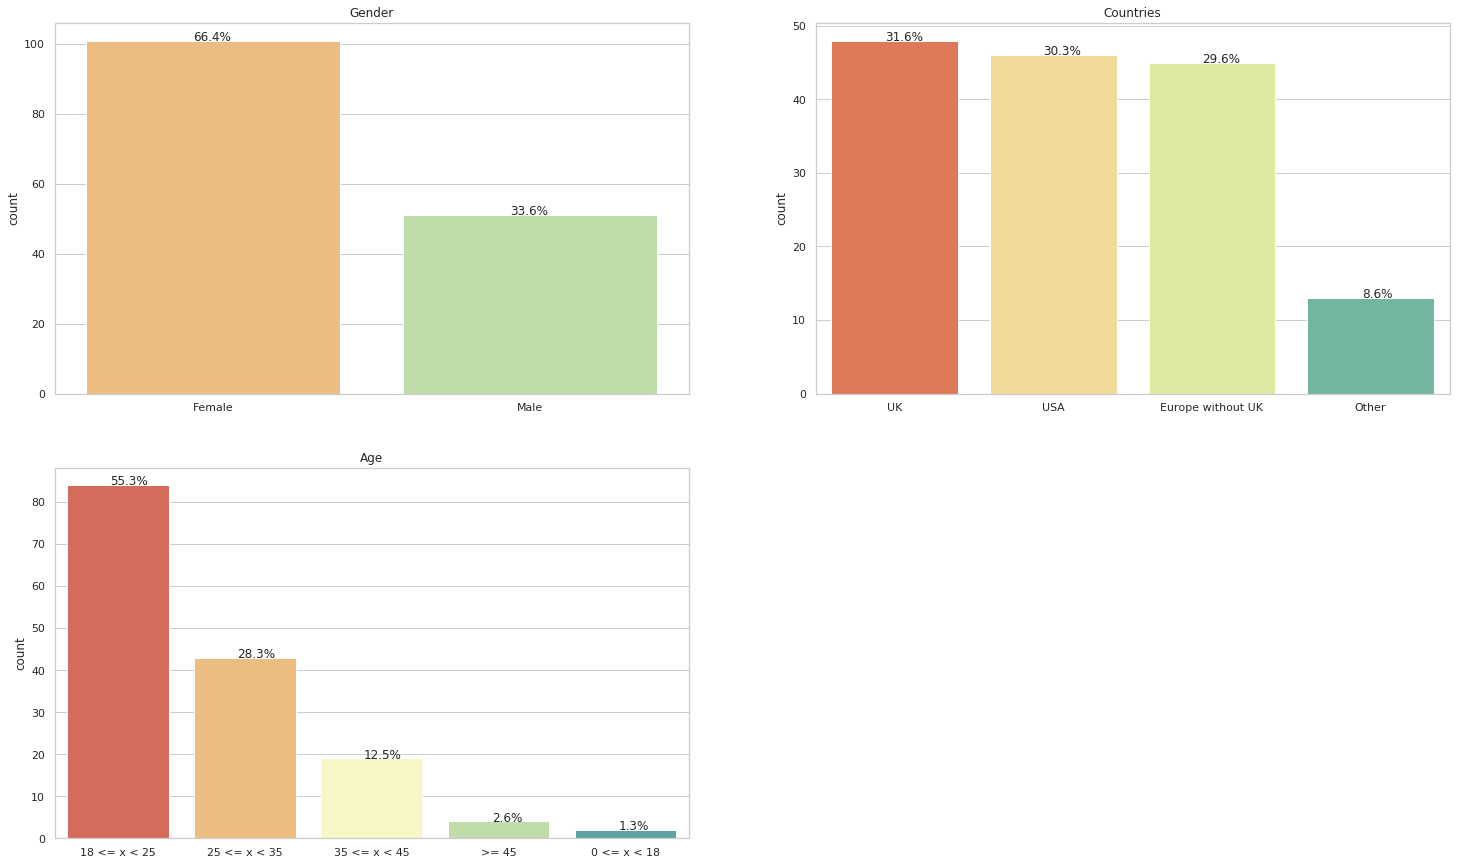

In [34]:
print_basics(filtered_data)

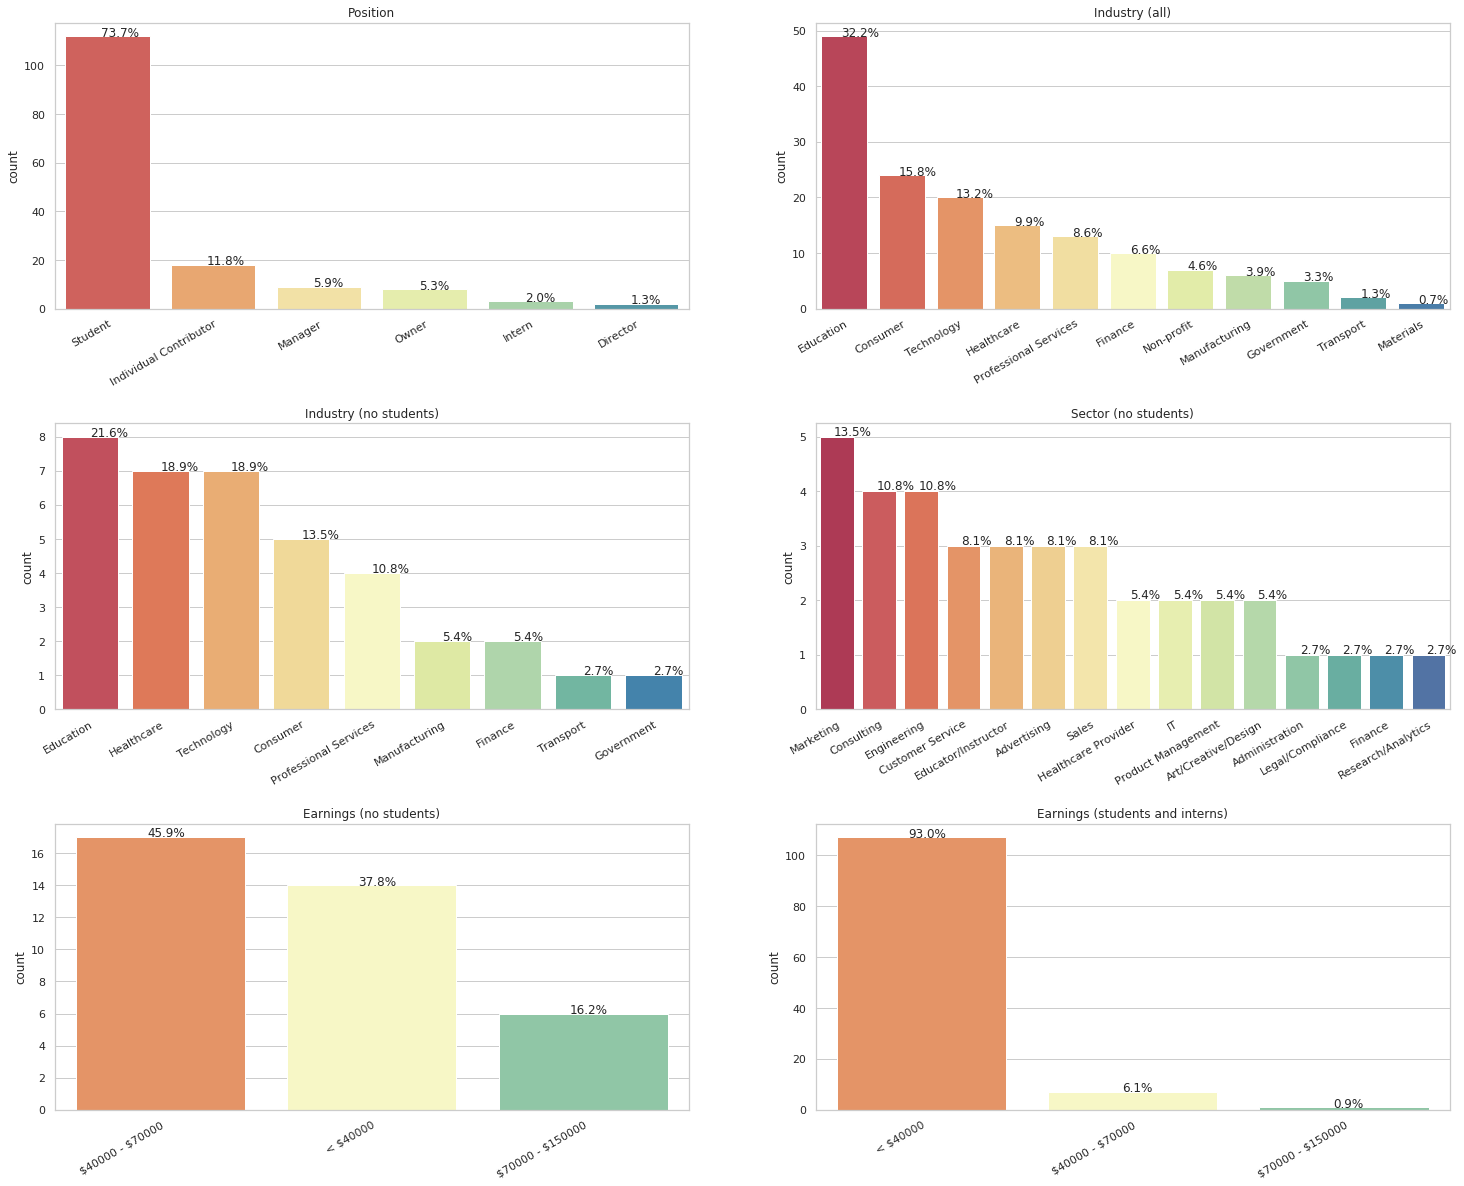

In [35]:
print_work(filtered_data)

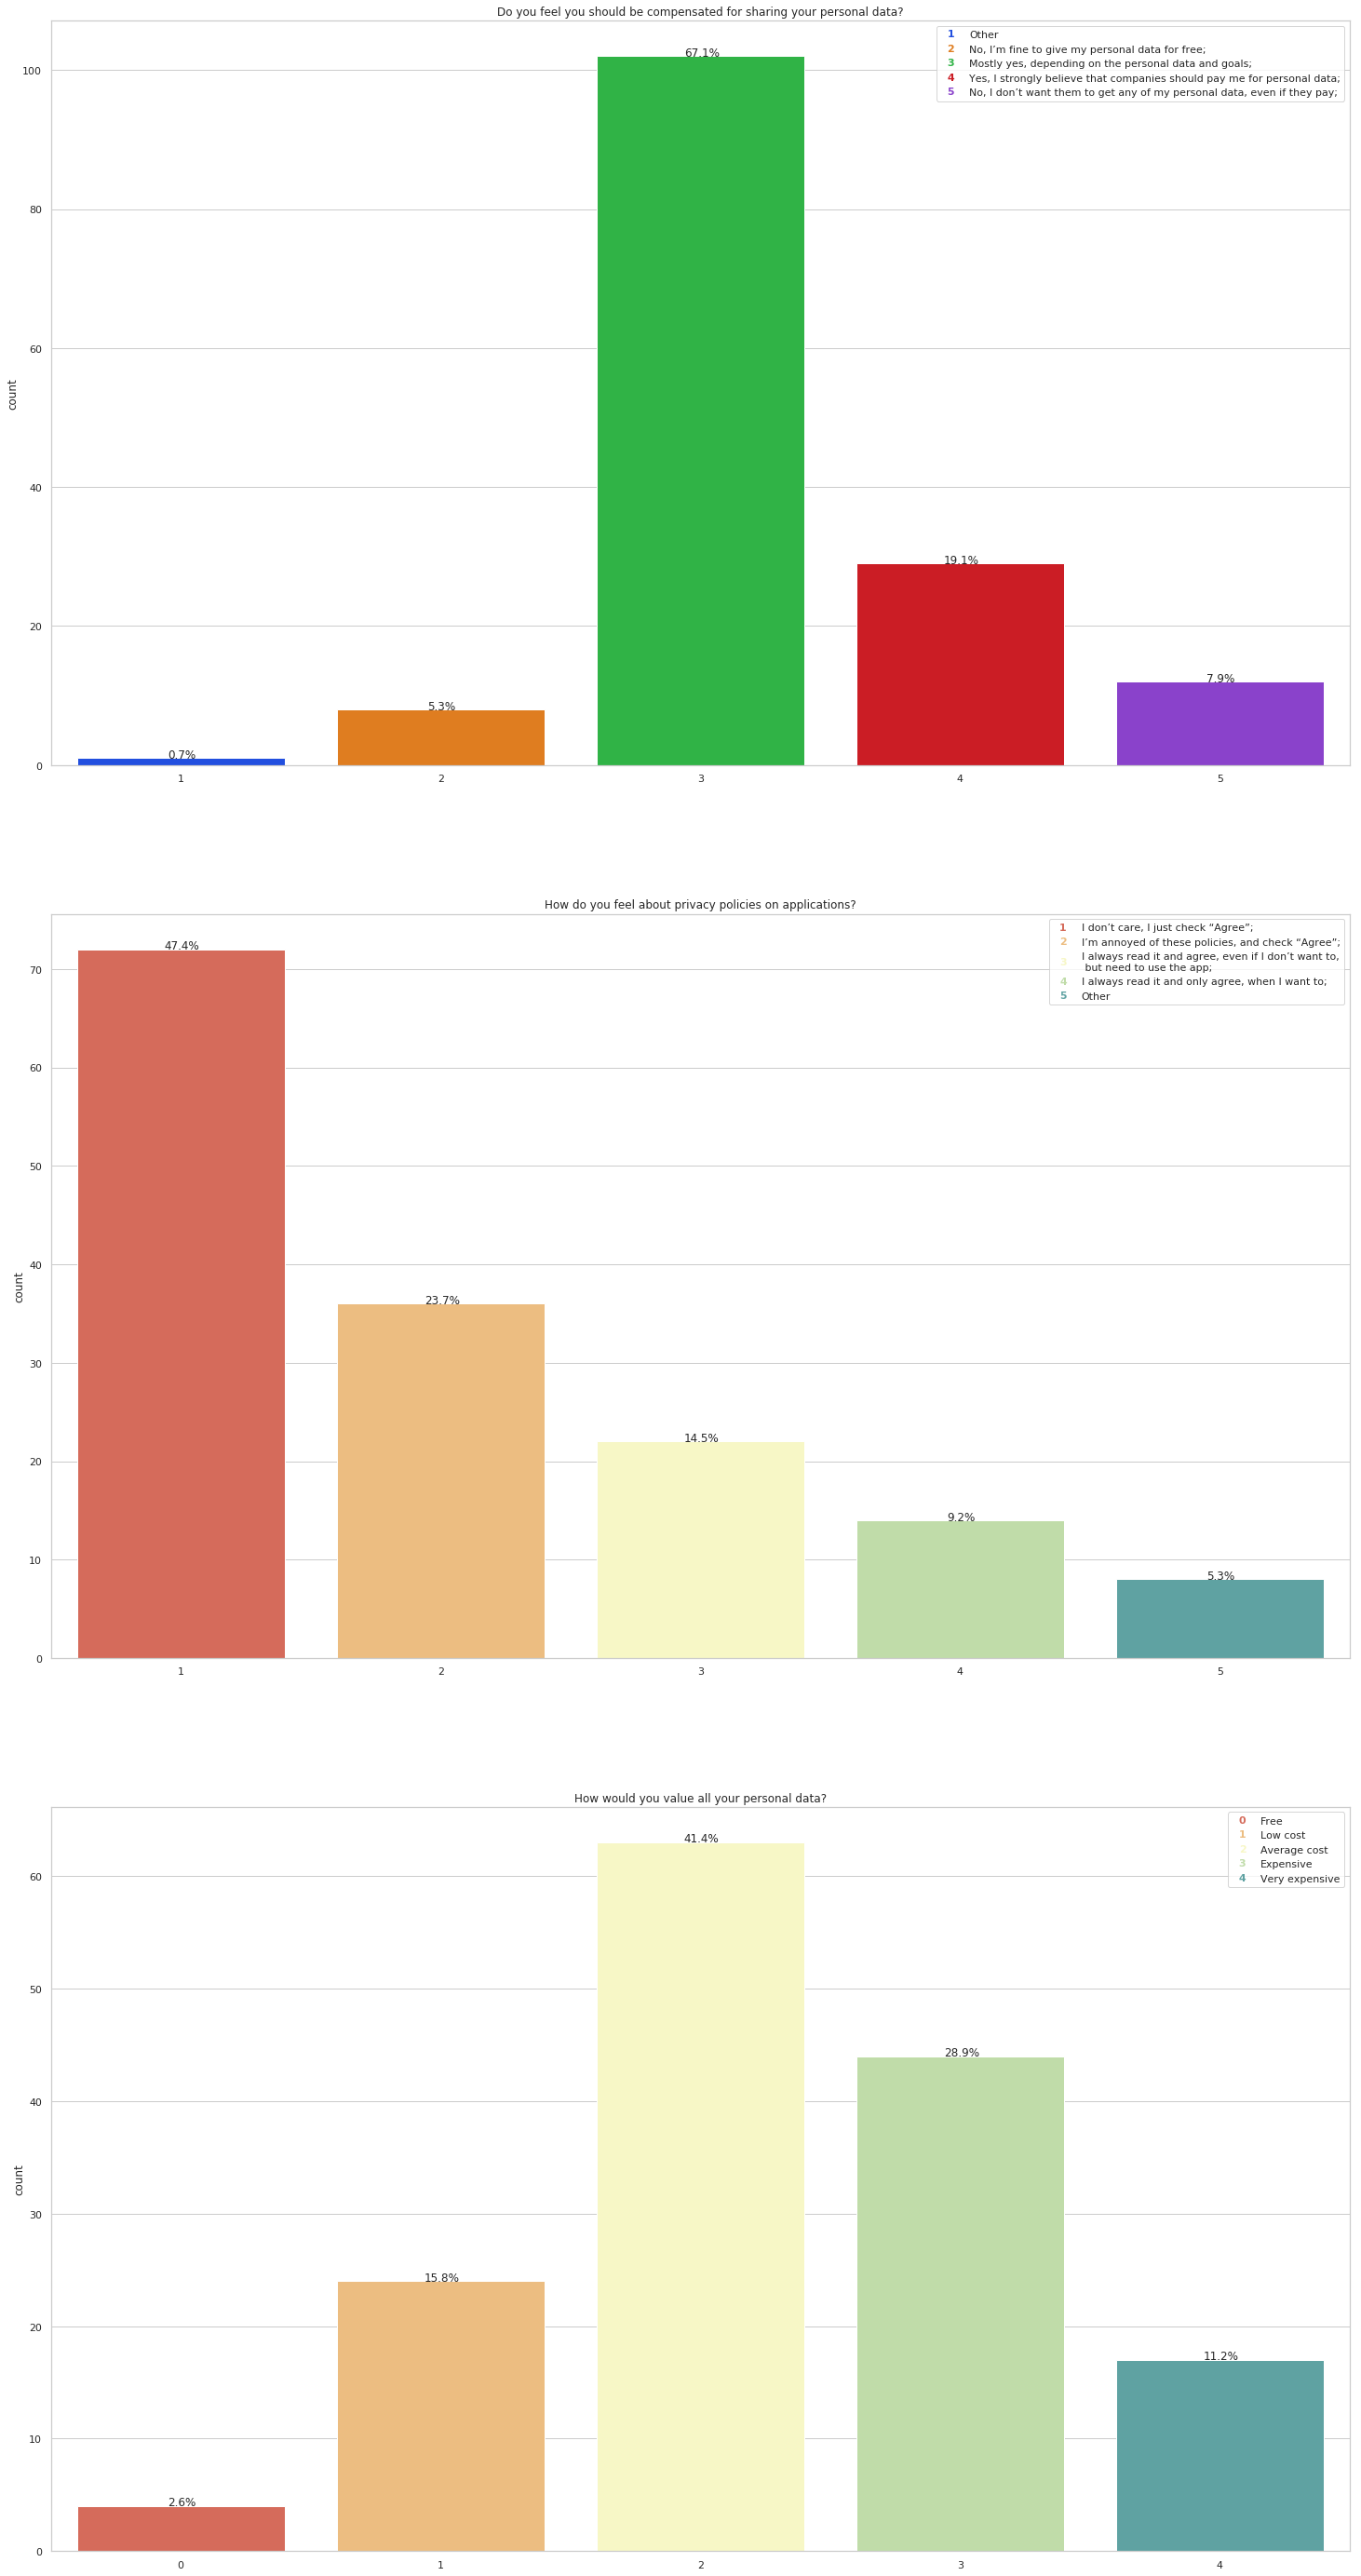

In [36]:
print_opinions(filtered_data)

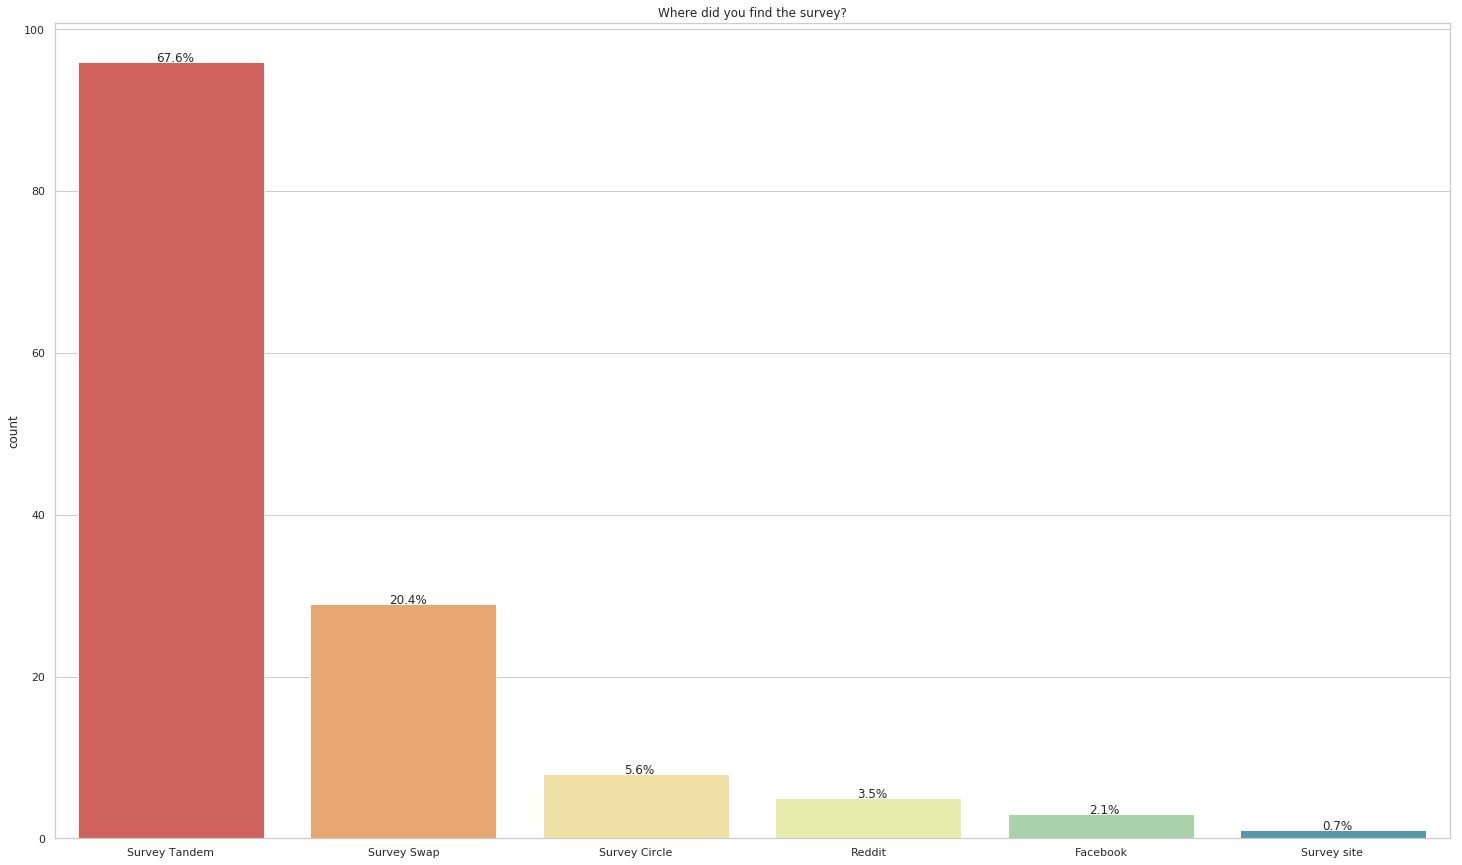

In [85]:

sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

# source_data = pd.DataFrame(source_counts).reset_index()
# flavor_data = pd.DataFrame(flavor_counts).reset_index()

plt.figure(2, figsize=(25,15))
the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0],  title=SURVEY_SOURCE)
df=to_bar_data(filtered_data, SURVEY_SOURCE)
ax=sns.barplot(x=SURVEY_SOURCE, y='count', data=df, palette='Spectral')
plt.xlabel('')
add_percentage(df, ax)

In [37]:
filtered_data[COMPENSATION + '_norm'].value_counts()

3    102
4     29
5     12
2      8
1      1
Name: Do you feel you should be compensated for sharing your personal data?_norm, dtype: int64

In [38]:
print((students.shape, earners.shape,  earners.shape[0] / students.shape[0]))
print((filtered_data[filtered_data[GENDER] == 'Female'].shape, filtered_data[filtered_data[GENDER] == 'Male'].shape,  \
    filtered_data[filtered_data[GENDER] == 'Male'].shape[0] / filtered_data[filtered_data[GENDER] == 'Female'].shape[0]))

((115, 48), (37, 48), 0.3217391304347826)
((101, 48), (51, 48), 0.504950495049505)


In [39]:
def print_percentiles(df, column, quants, postfix = '_norm'):
    results = []
    for q in quants:
        results.append(df[column + postfix].quantile(q))
    return results

In [40]:
DEFAULT_PERCENTILES = [0.3, 0.5, 0.7, 0.9, 0.95, 0.99]

## People are addicted to socials

In [41]:
print_percentiles(students, COUNT_SOCIAL, [0.3, 0.5, 0.7, 0.9, 0.95, 0.99])

[3.0, 5.0, 5.0, 9.0, 10.0, 14.439999999999998]

In [42]:
print_percentiles(earners, COUNT_SOCIAL, [0.3, 0.5, 0.7, 0.9, 0.95, 0.99])

[2.0, 3.0, 5.0, 7.0, 9.199999999999996, 13.200000000000003]

In [43]:
total_80_percentile = filtered_data[COUNT_SOCIAL + '_norm'].quantile(0.8)

In [44]:
top_20_social_users = filtered_data[filtered_data[COUNT_SOCIAL + '_norm'] > total_80_percentile]

In [45]:
top_20_social_users.shape

(31, 48)

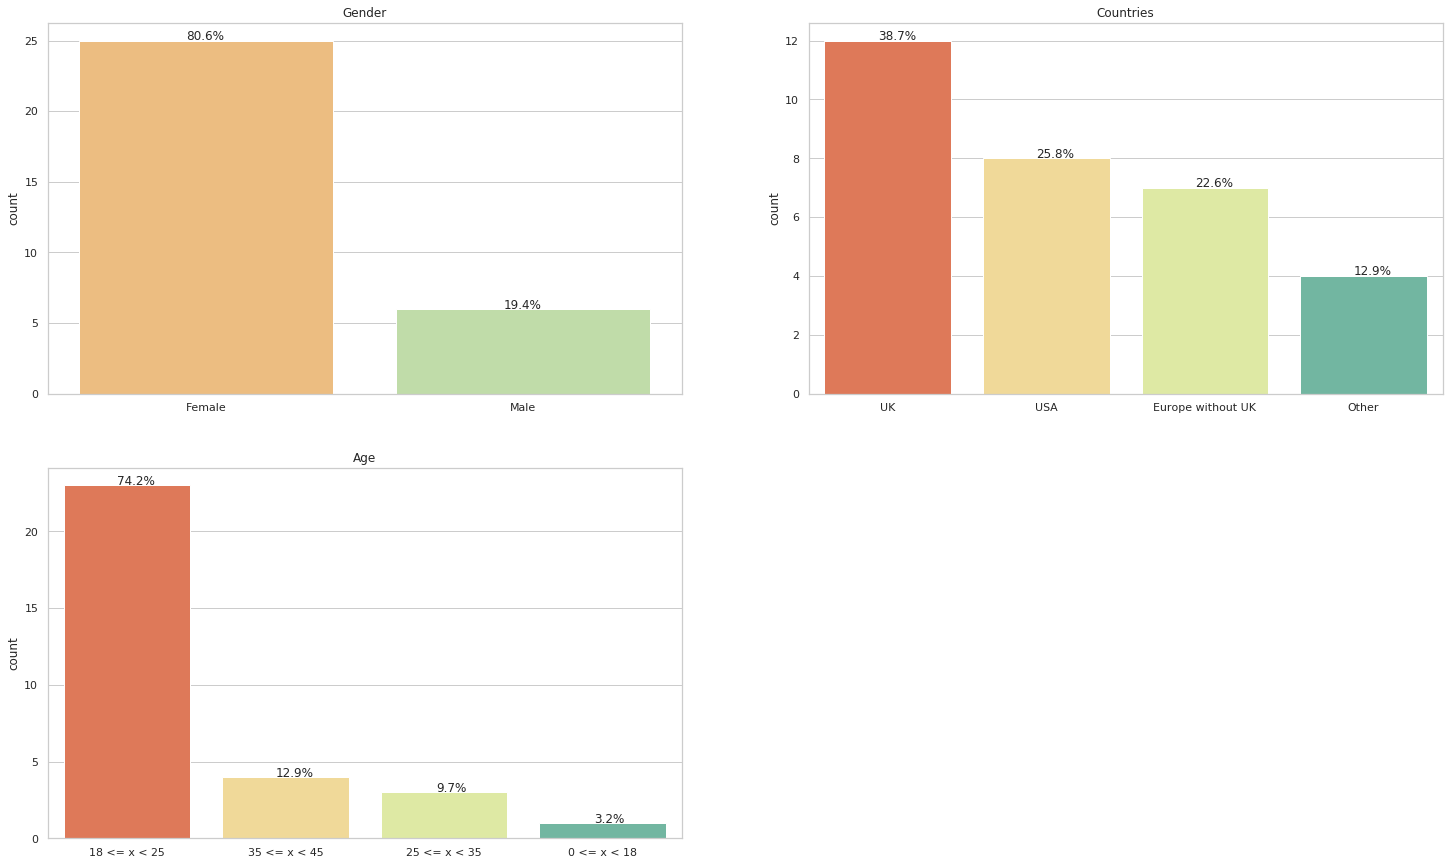

In [46]:
print_basics(top_20_social_users, ' for Top 20 social users')

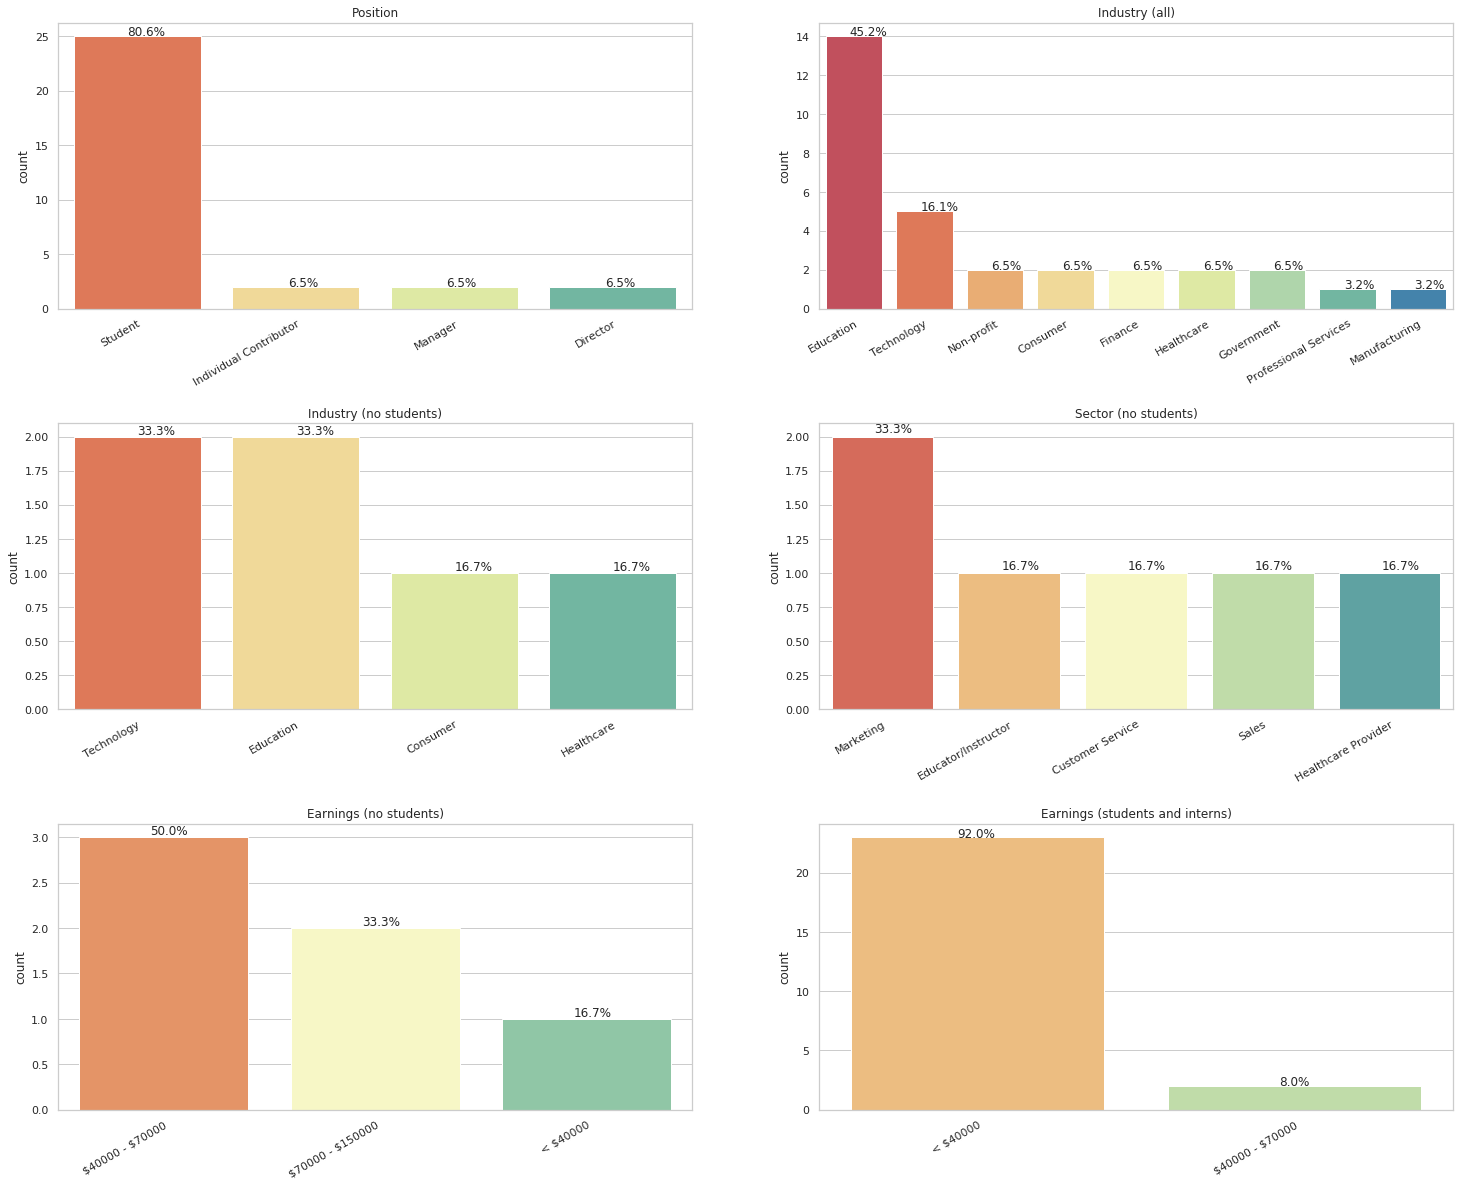

In [47]:
print_work(top_20_social_users, ' for Top 20 social users')

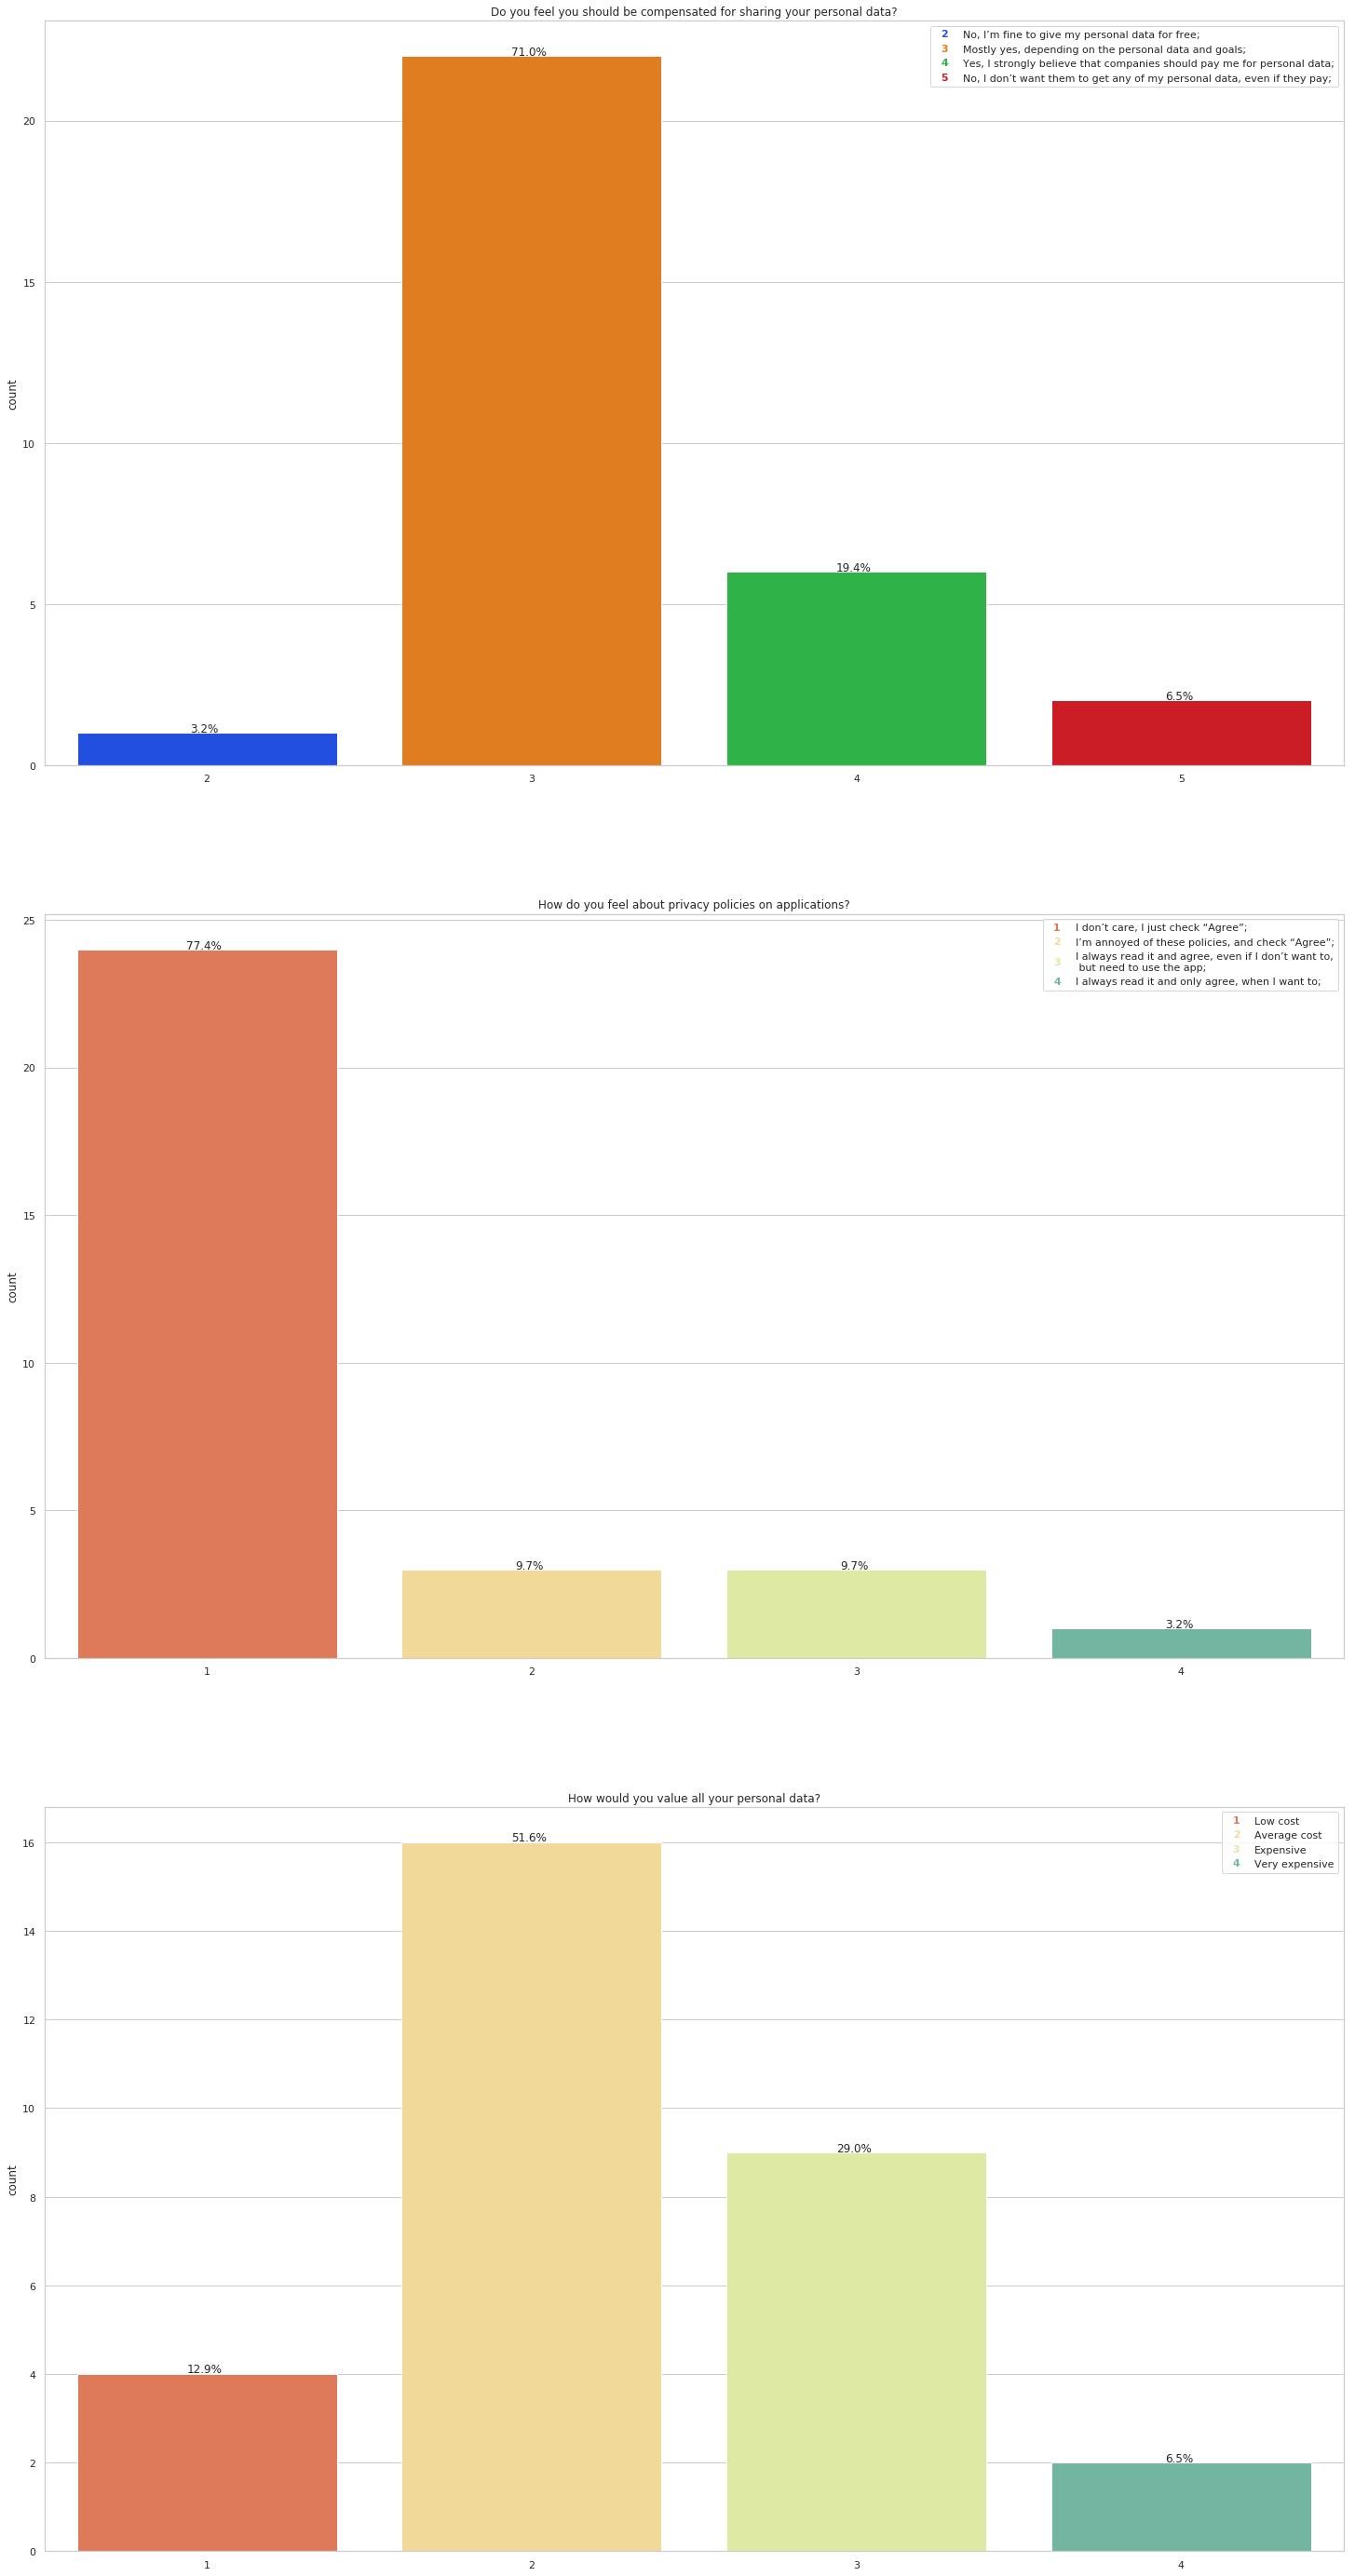

In [48]:
print_opinions(top_20_social_users, ' for Top 20 social users')

In [49]:
top_20_social_users[(top_20_social_users[GENDER] == 'Female') & (top_20_social_users[POSITION] == 'Student')].shape

(22, 48)

Student woman like social networks very much, because I see on Top 10 and Top 20 (more over on Top 20 is stronger). <br/>
In Top 10 I see 1:4 -> man:woman, and 1:4 earners:students, and 7 from 8 (and 10) is woman&student. <br/>
In Top 20 I see 1:5 -> man:woman, and 1:5 earners:students, and 22 from 25 (and 30) is woman&student. <br/>
Basicaly, I have 1:2 man:woman, 1:3 earners:students.

In [50]:
bottom_20_social_users =  filtered_data[filtered_data[COUNT_SOCIAL + '_norm'] < filtered_data[COUNT_SOCIAL + '_norm'].quantile(0.1)]

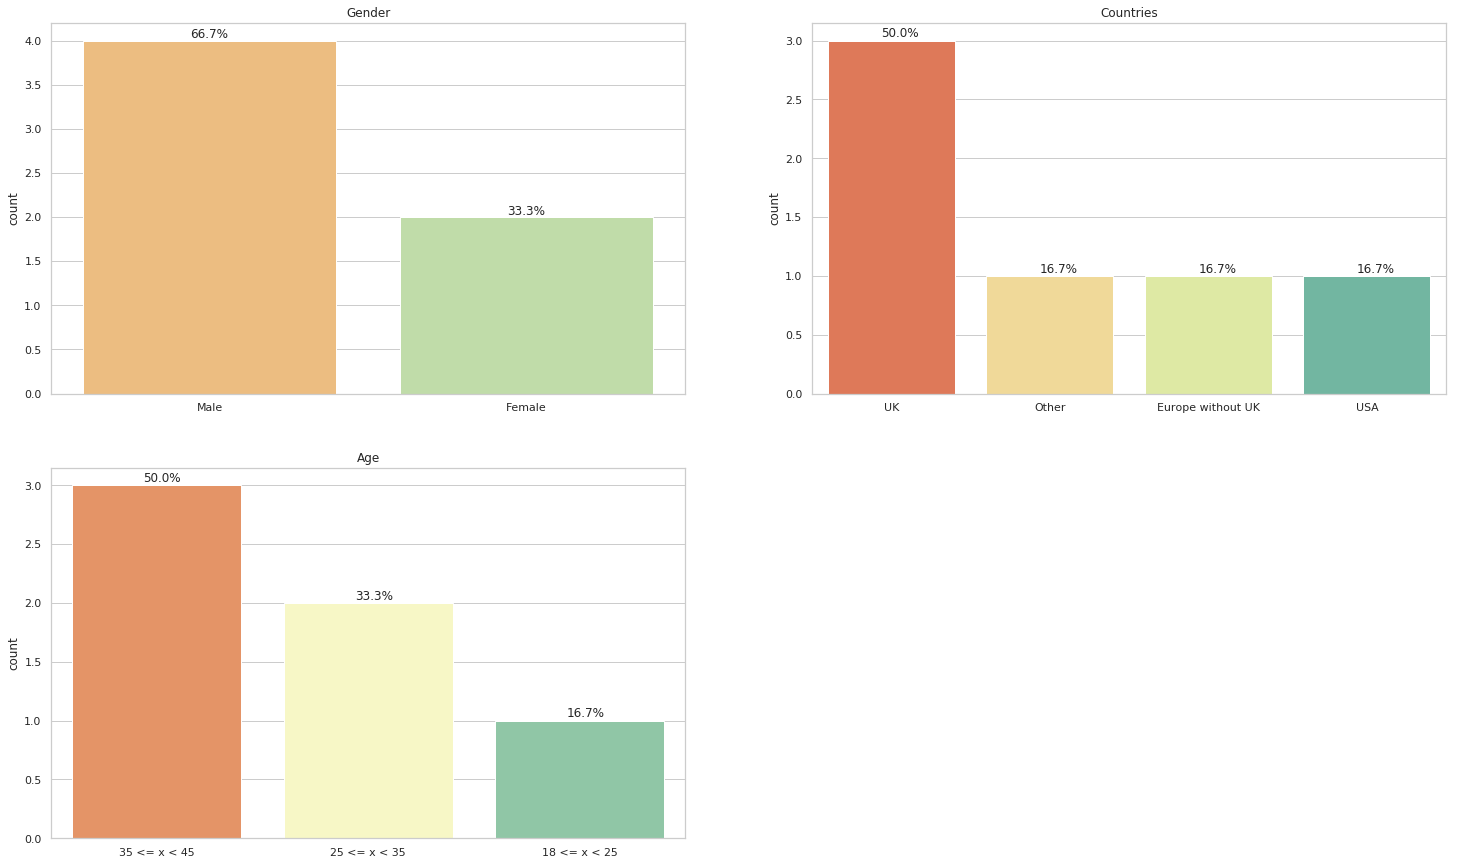

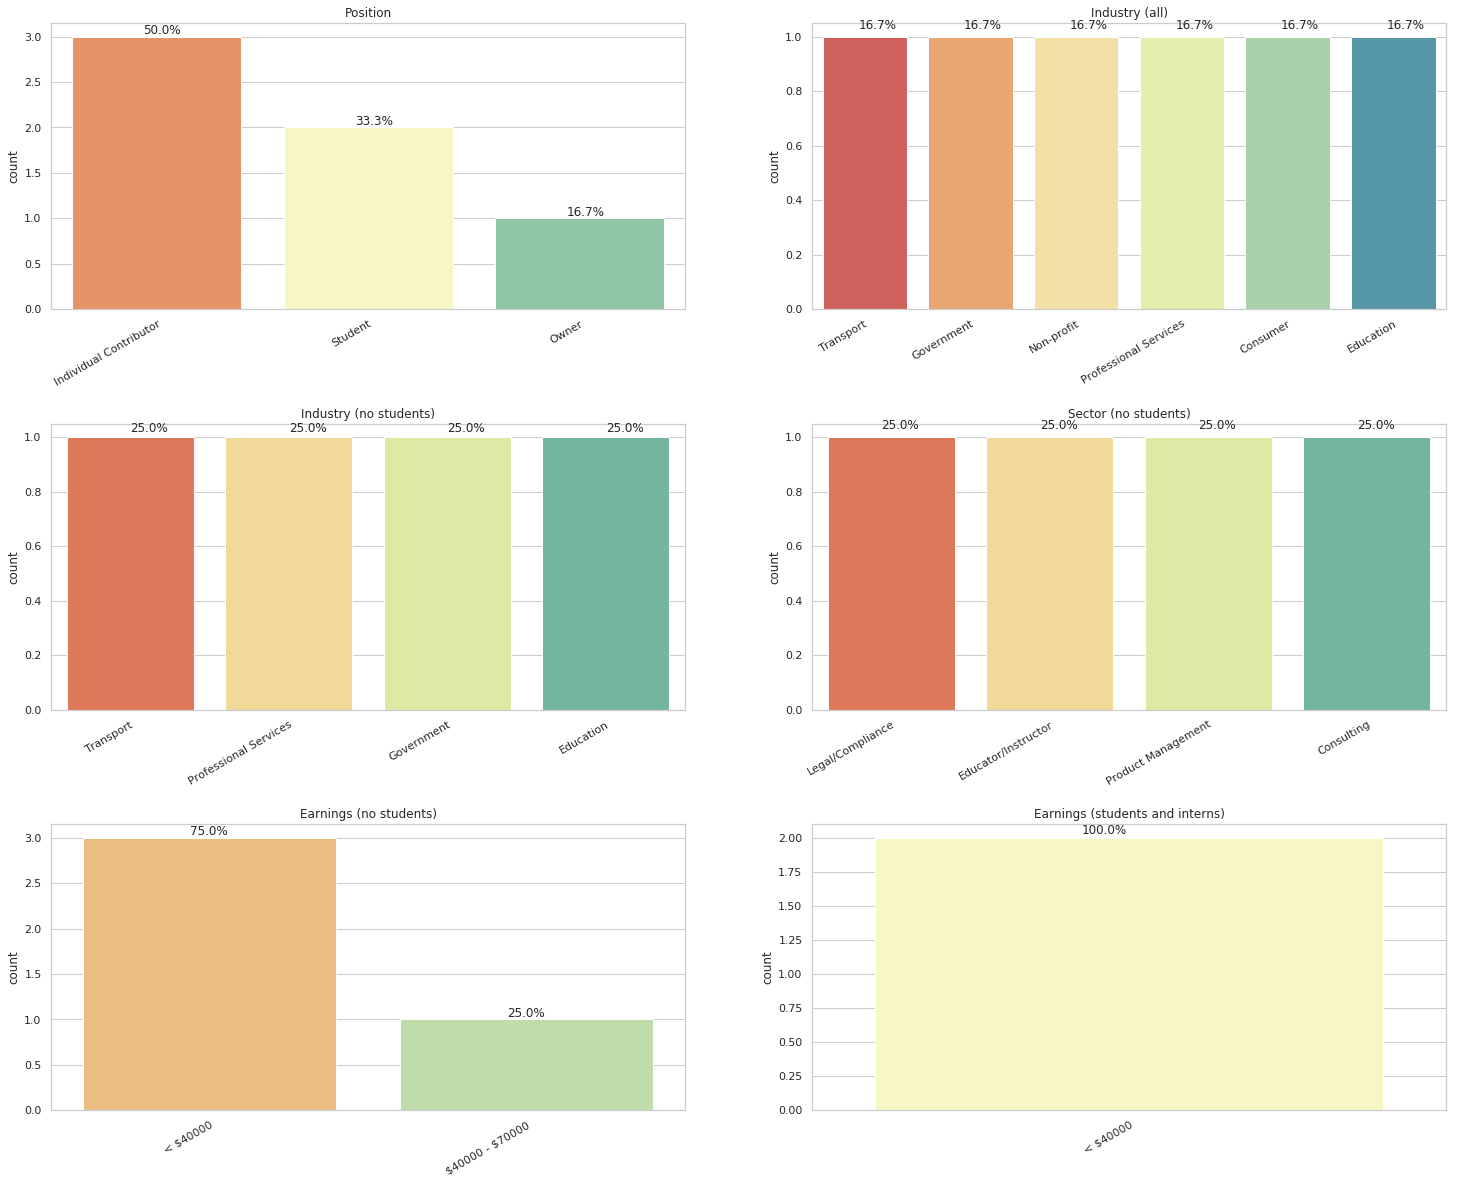

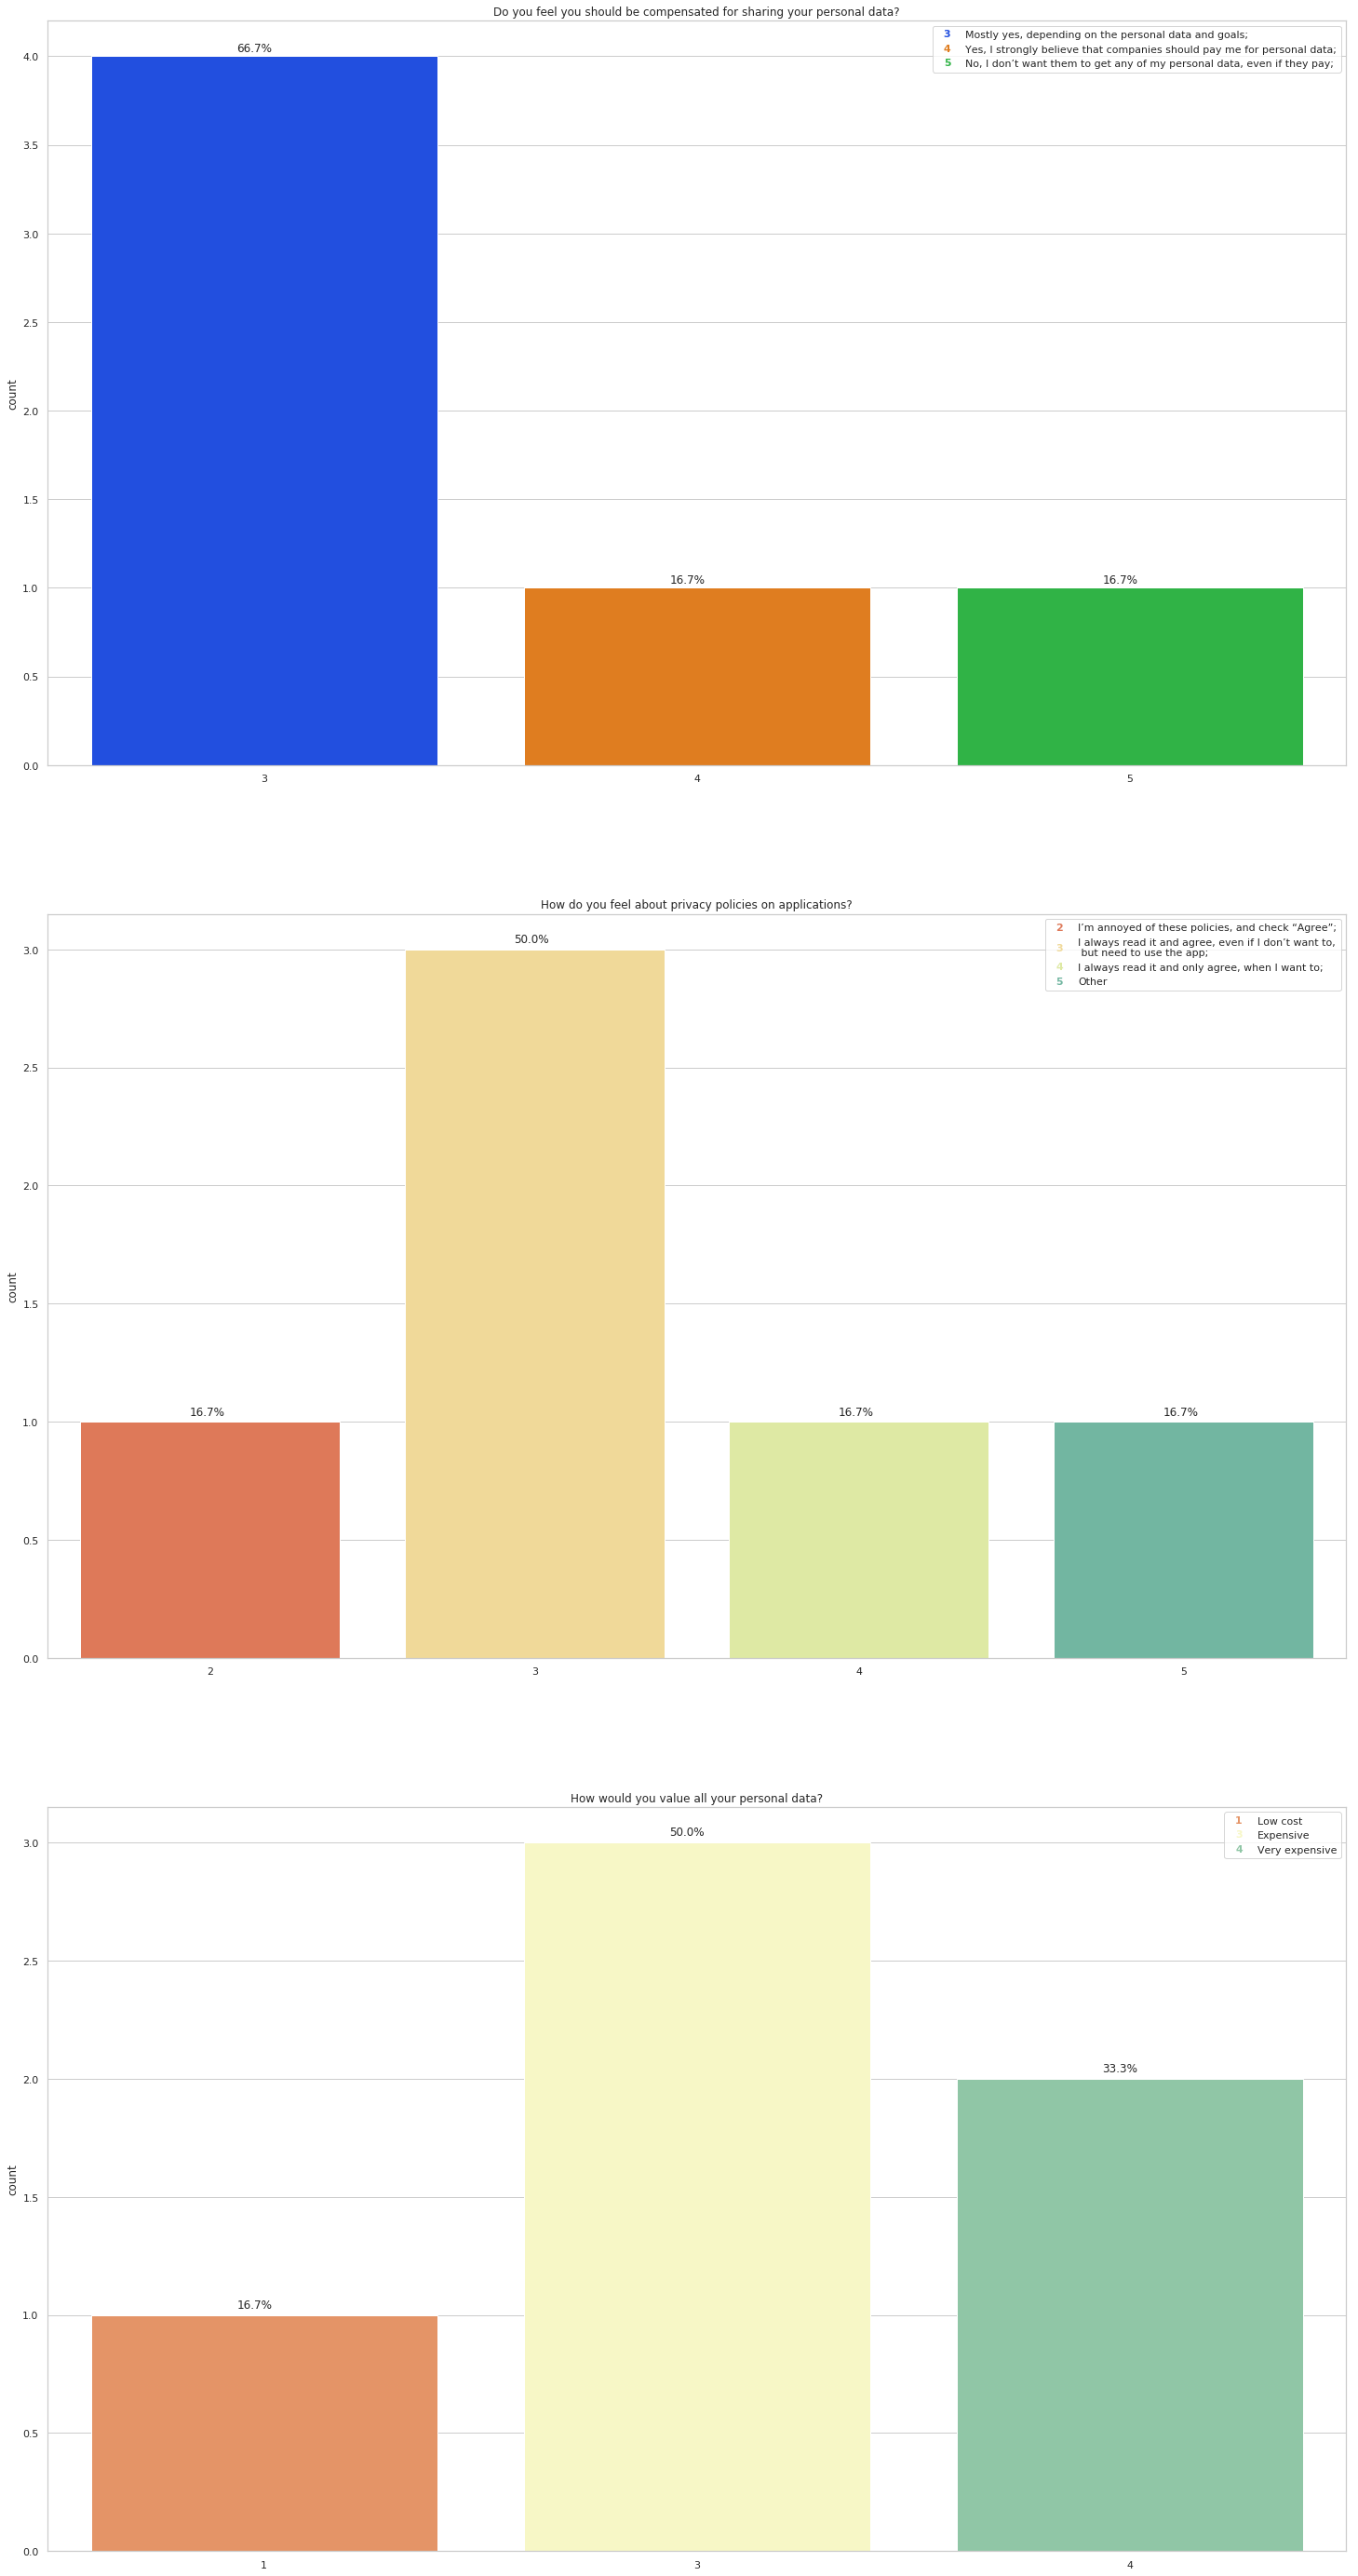

In [51]:
print_basics(bottom_20_social_users)
print_work(bottom_20_social_users)
print_opinions(bottom_20_social_users)

## Social networks of earners only

In [52]:
earners_total_80_percentile = earners[COUNT_SOCIAL + '_norm'].quantile(0.8)

In [53]:
earners_top_20_social_users = earners[earners[COUNT_SOCIAL + '_norm'] > earners_total_80_percentile]

In [54]:
earners_top_20_social_users.shape

(8, 48)

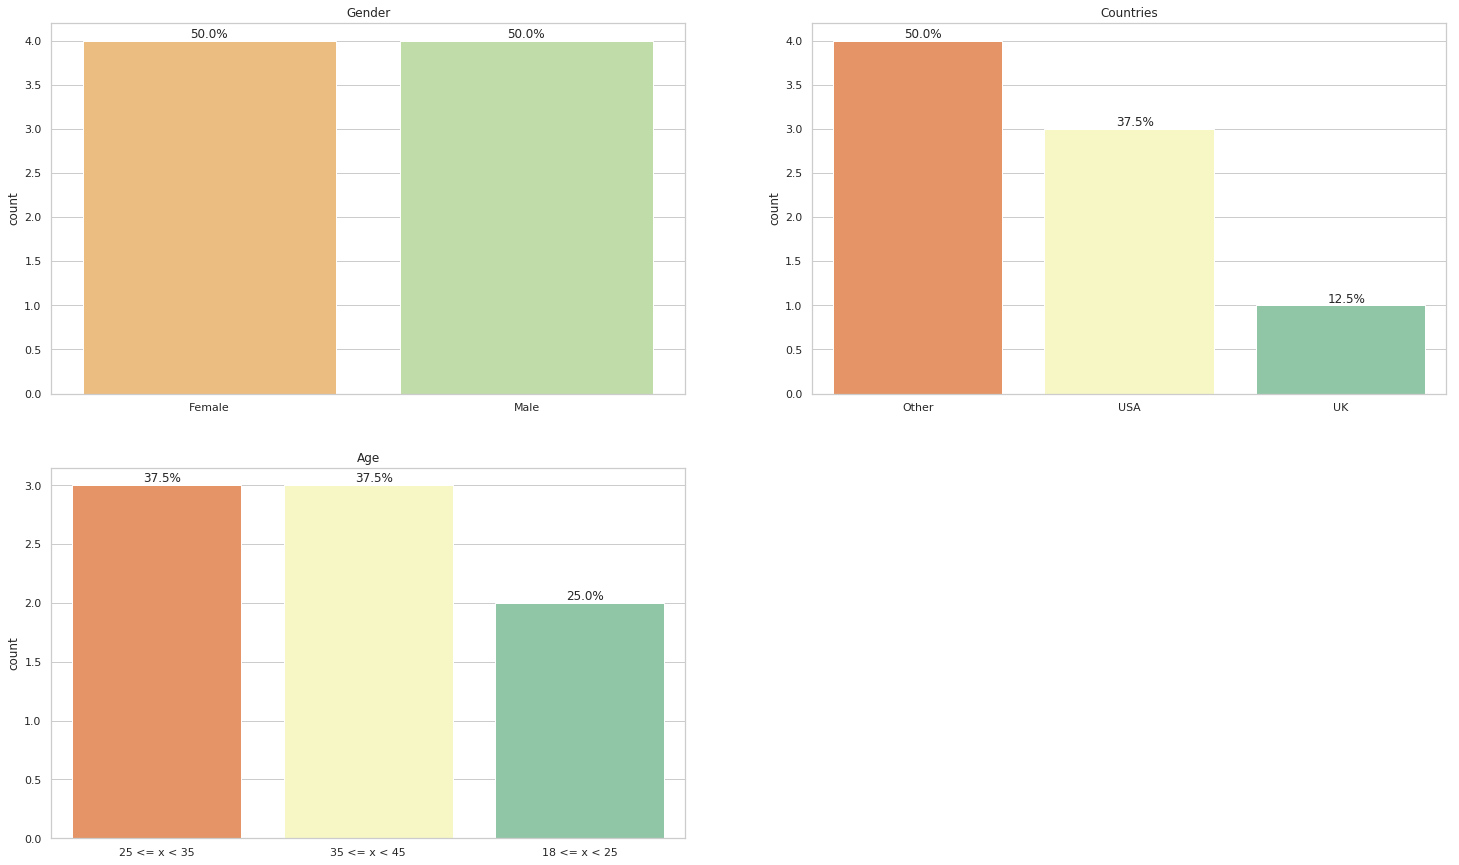

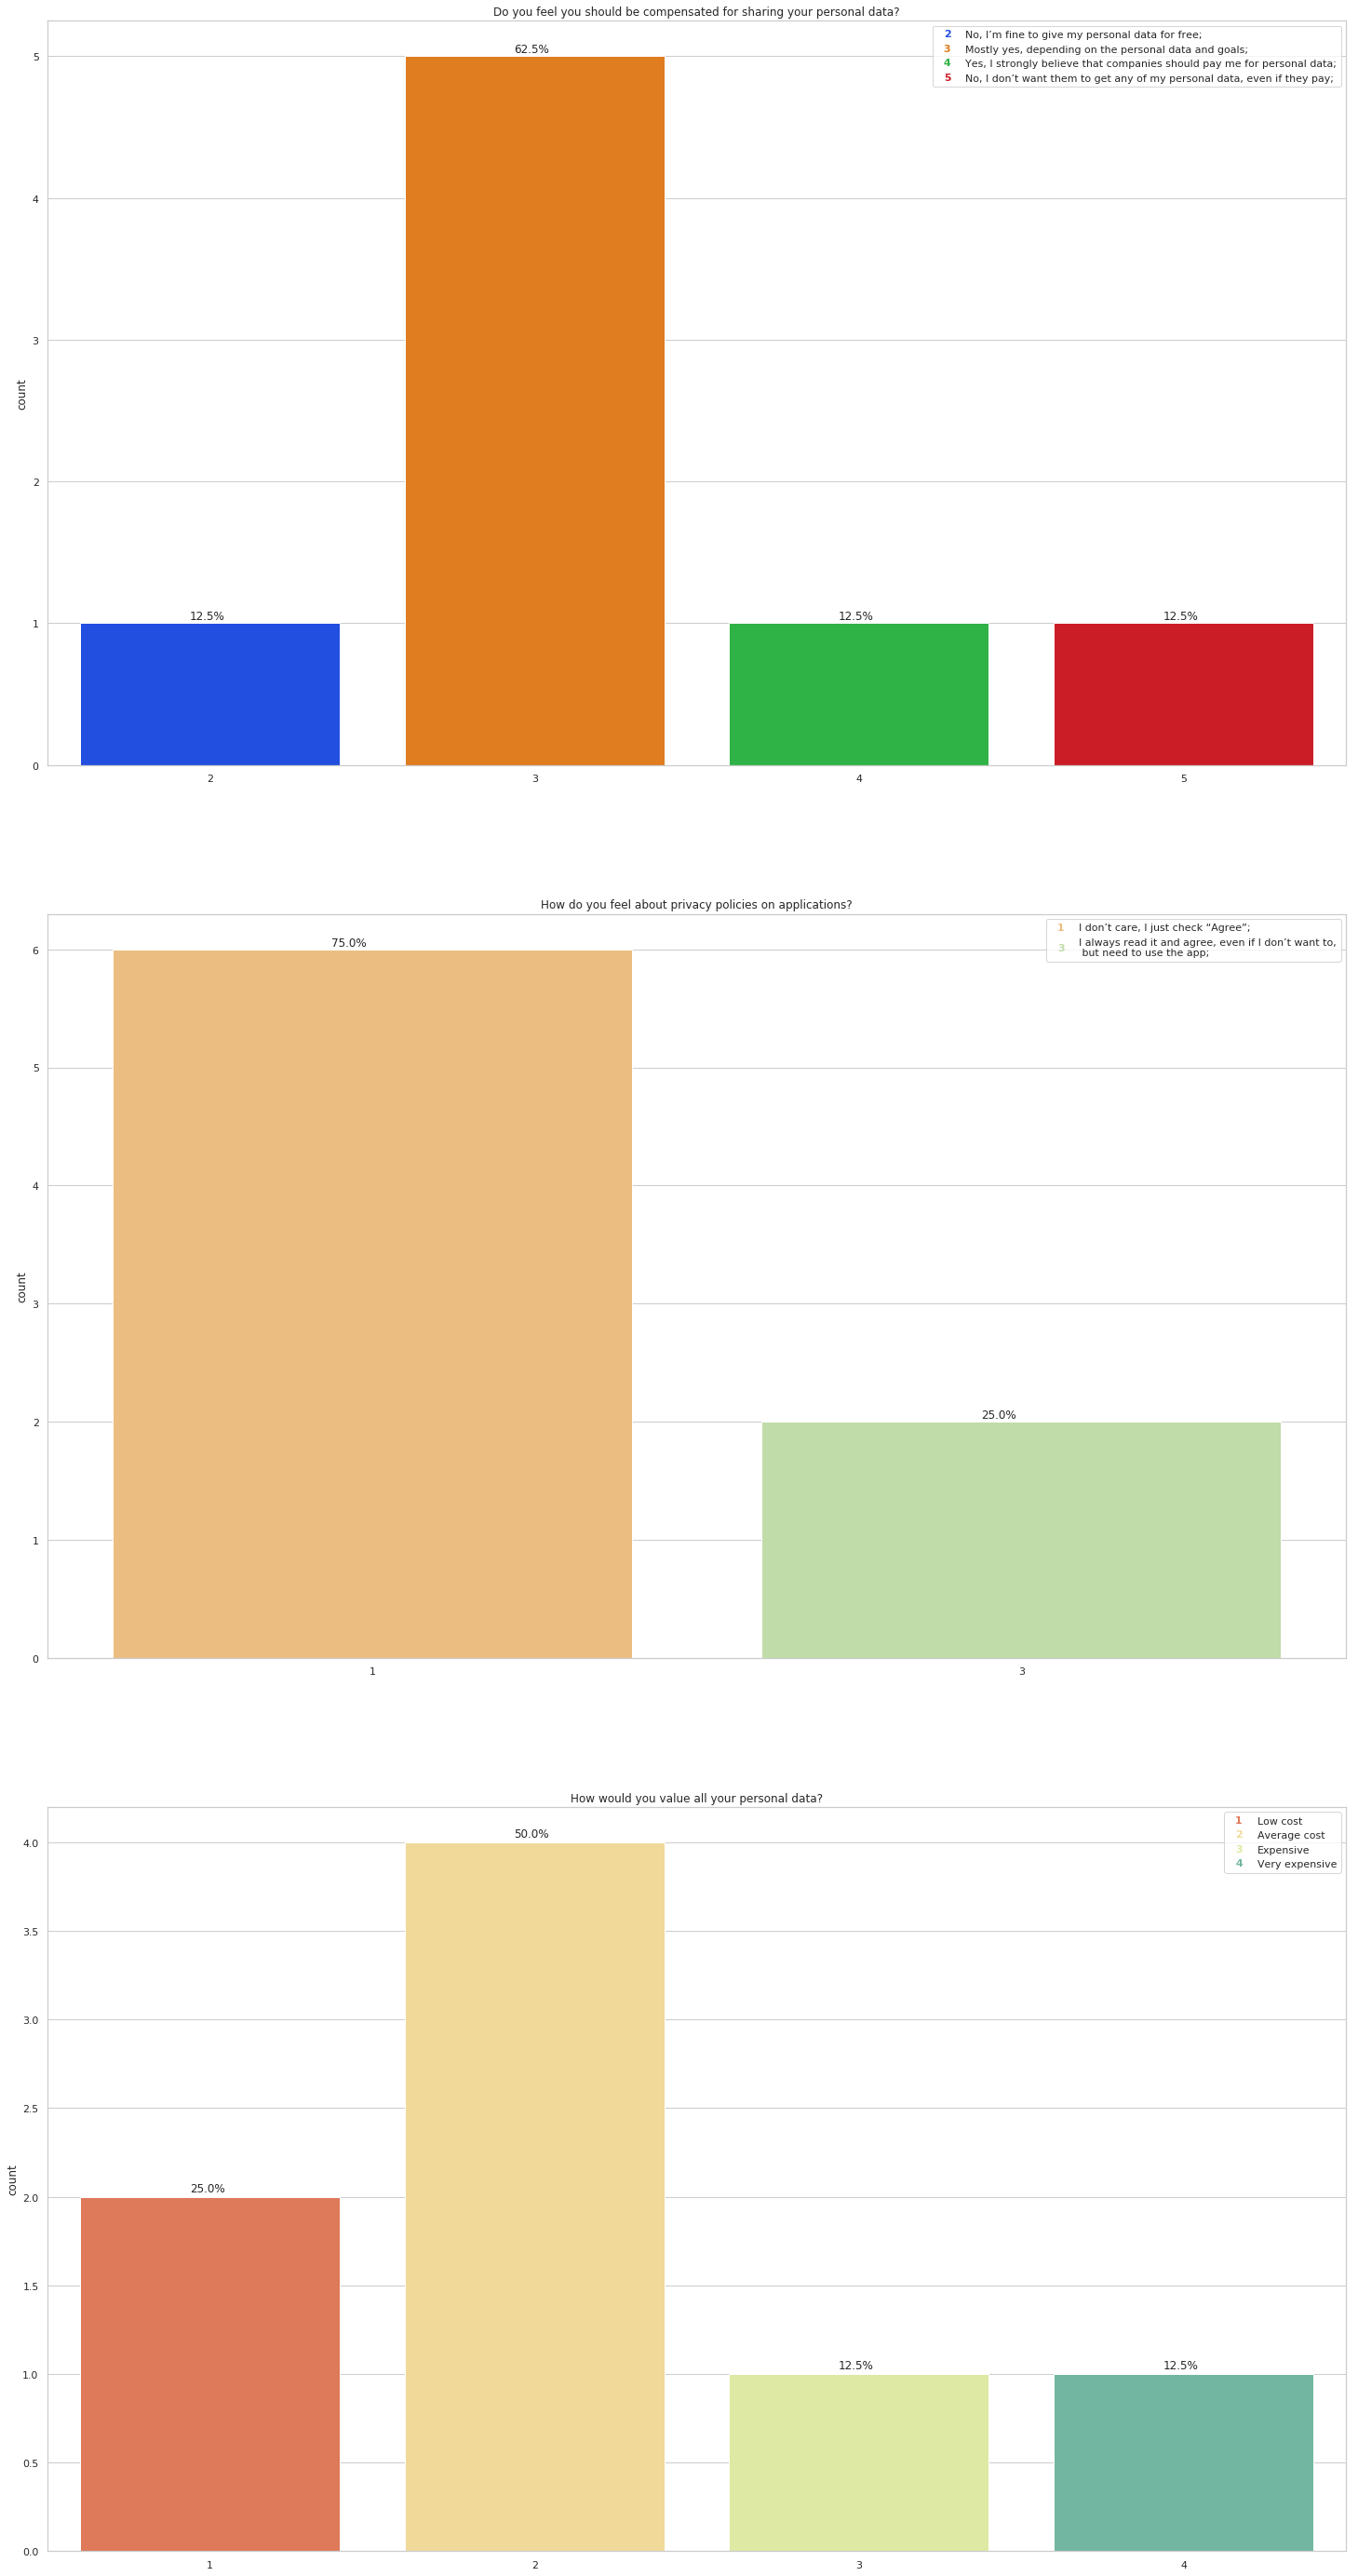

In [55]:
print_basics(earners_top_20_social_users, ' for Top 20 social users, earners only')
print_opinions(earners_top_20_social_users, ' for Top 20 social users, earners only')

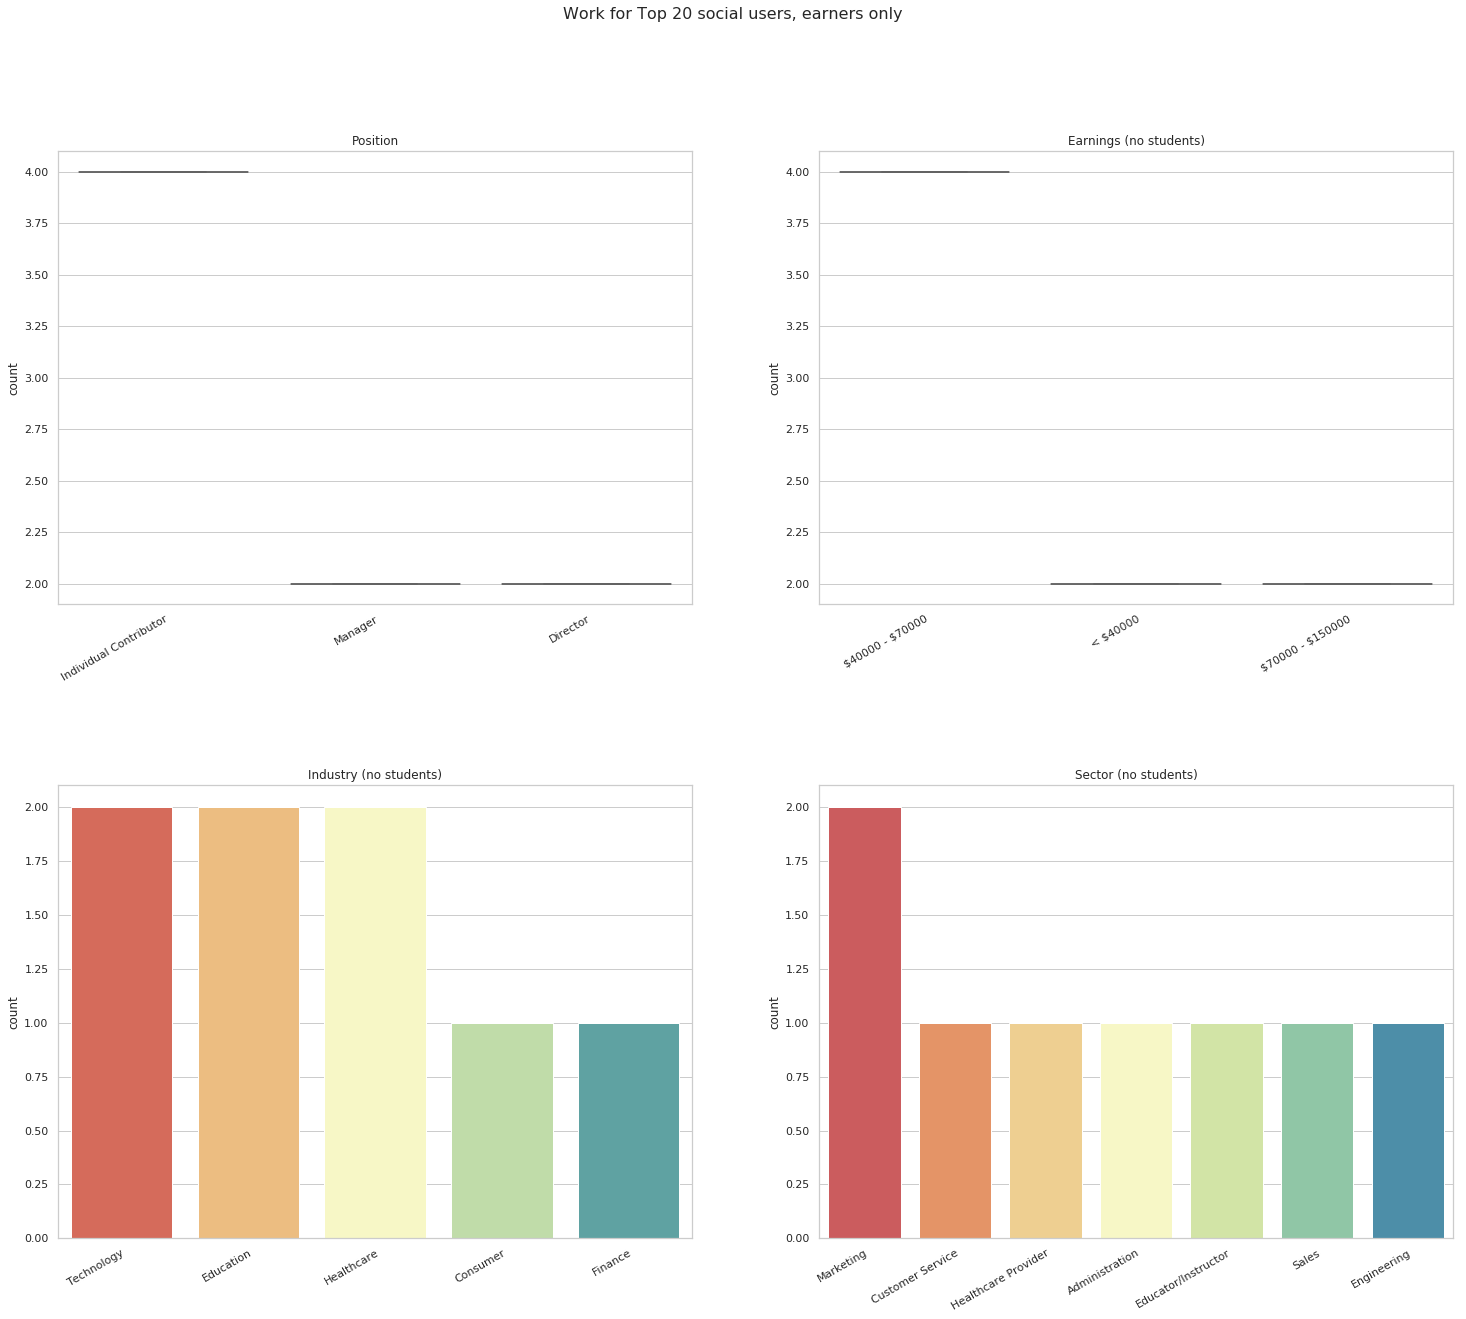

In [56]:


sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

# source_data = pd.DataFrame(source_counts).reset_index()
# flavor_data = pd.DataFrame(flavor_counts).reset_index()

fig = plt.figure(2, figsize=(25,20))
# fig, ax = plt.subplots()
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], title='Position')
gpos = sns.boxplot(x=POSITION, y='count', data=to_bar_data(earners_top_20_social_users, POSITION), palette='Spectral')
rotateTickLabels(gpos, 30, 'x')
plt.xlabel('')

plt.subplot(the_grid[1, 0], title='Industry (no students)')
gind = sns.barplot(x=WORKING_INDUSTRY, y='count', data=to_bar_data(earners_top_20_social_users, WORKING_INDUSTRY), palette='Spectral')
rotateTickLabels(gind, 30, 'x')
plt.xlabel('')

plt.subplot(the_grid[1, 1], title='Sector (no students)')
gsector = sns.barplot(x=WORKING_SECTOR, y='count', data=to_bar_data(earners_top_20_social_users, WORKING_SECTOR), palette='Spectral')
rotateTickLabels(gsector, 30, 'x')
plt.xlabel('')

plt.subplot(the_grid[0, 1], title='Earnings (no students)')
gearn = sns.boxplot(x=EARNINGS, y='count', data=to_bar_data(earners_top_20_social_users, EARNINGS, map_earnings), palette='Spectral')
rotateTickLabels(gearn, 30, 'x')
plt.xlabel('')

plt.suptitle('Work for Top 20 social users, earners only', fontsize=16)

# ... plot stuff
plt.subplots_adjust(hspace=0.4)

I don't see any specifics for earners.

In [57]:
def print_who_is(dataset, columns, values):
    sizes = []
    sizes.append(dataset.shape[0])
    for i in range(len(columns)):
        if i == 0:
            sizes.append(dataset[dataset[columns[i]] == values[i]].shape[0])
        elif i == 1:
            sizes.append(dataset[(dataset[columns[i]] == values[i]) & (dataset[columns[i - 1]] == values[i - 1])].shape[0])
        elif i == 2:
            sizes.append(dataset[(dataset[columns[i]] == values[i]) & (dataset[columns[i - 1]] == values[i - 1]) & (dataset[columns[i - 2]] == values[i - 2])].shape[0])
    return sizes

# Who are best buyers?

### Purchasing apps

In [58]:
print(print_percentiles(filtered_data, COUNT_PURCHASE_GOODS, DEFAULT_PERCENTILES))
print(print_percentiles(students,      COUNT_PURCHASE_GOODS, DEFAULT_PERCENTILES))
print(print_percentiles(earners,       COUNT_PURCHASE_GOODS, DEFAULT_PERCENTILES))

[1.0, 2.0, 5.0, 10.0, 10.449999999999989, 20.0]
[1.0, 2.0, 5.0, 10.0, 11.299999999999997, 20.0]
[1.0, 2.0, 4.0, 6.799999999999997, 10.0, 13.200000000000003]


In [59]:
purchasing_total_90_percentile = filtered_data[COUNT_PURCHASE_GOODS + '_norm'].quantile(0.9)
purchasing_total_80_percentile = filtered_data[COUNT_PURCHASE_GOODS + '_norm'].quantile(0.8)

In [60]:
purchasing_total_90_users = filtered_data[filtered_data[COUNT_PURCHASE_GOODS + '_norm'] > purchasing_total_90_percentile]
purchasing_total_80_users = filtered_data[filtered_data[COUNT_PURCHASE_GOODS + '_norm'] > purchasing_total_80_percentile]

In [61]:
purchasing_total_90_users.shape[0], purchasing_total_80_users.shape[0]

(8, 26)

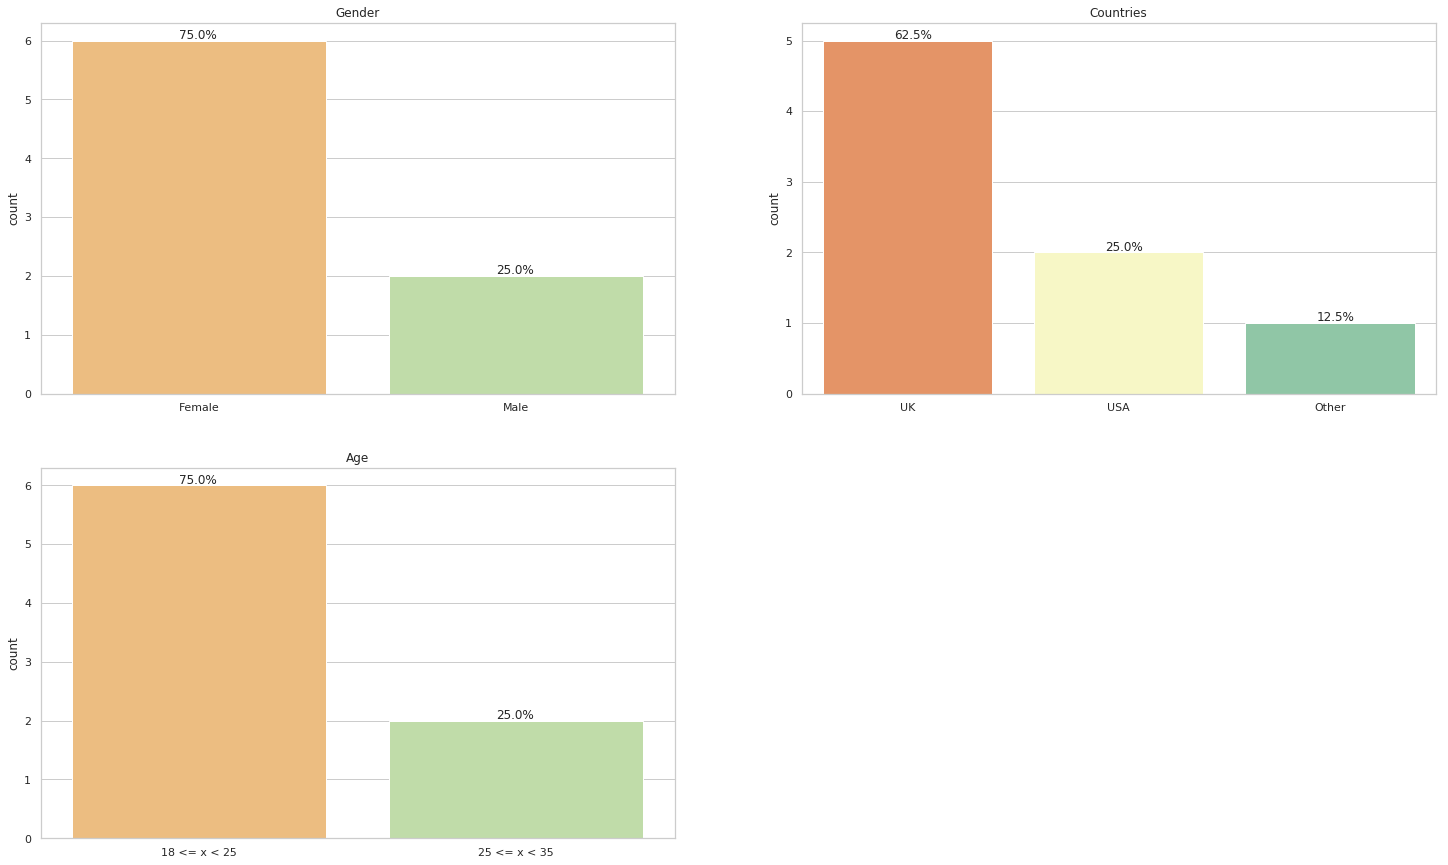

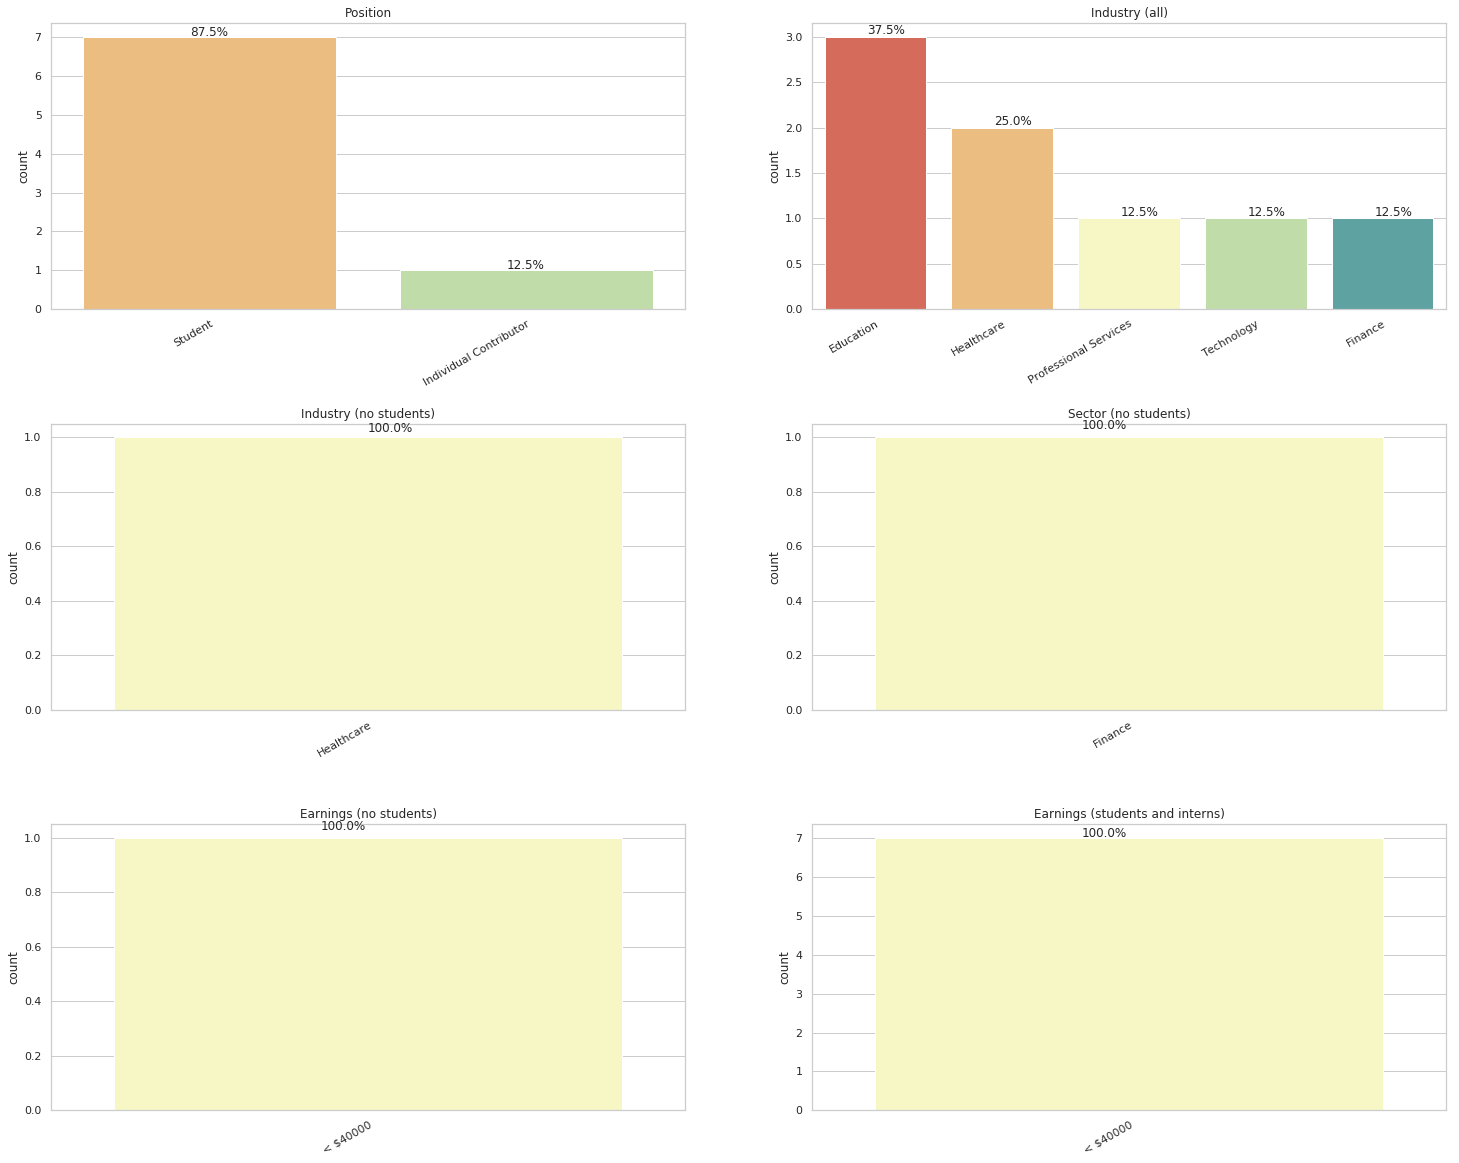

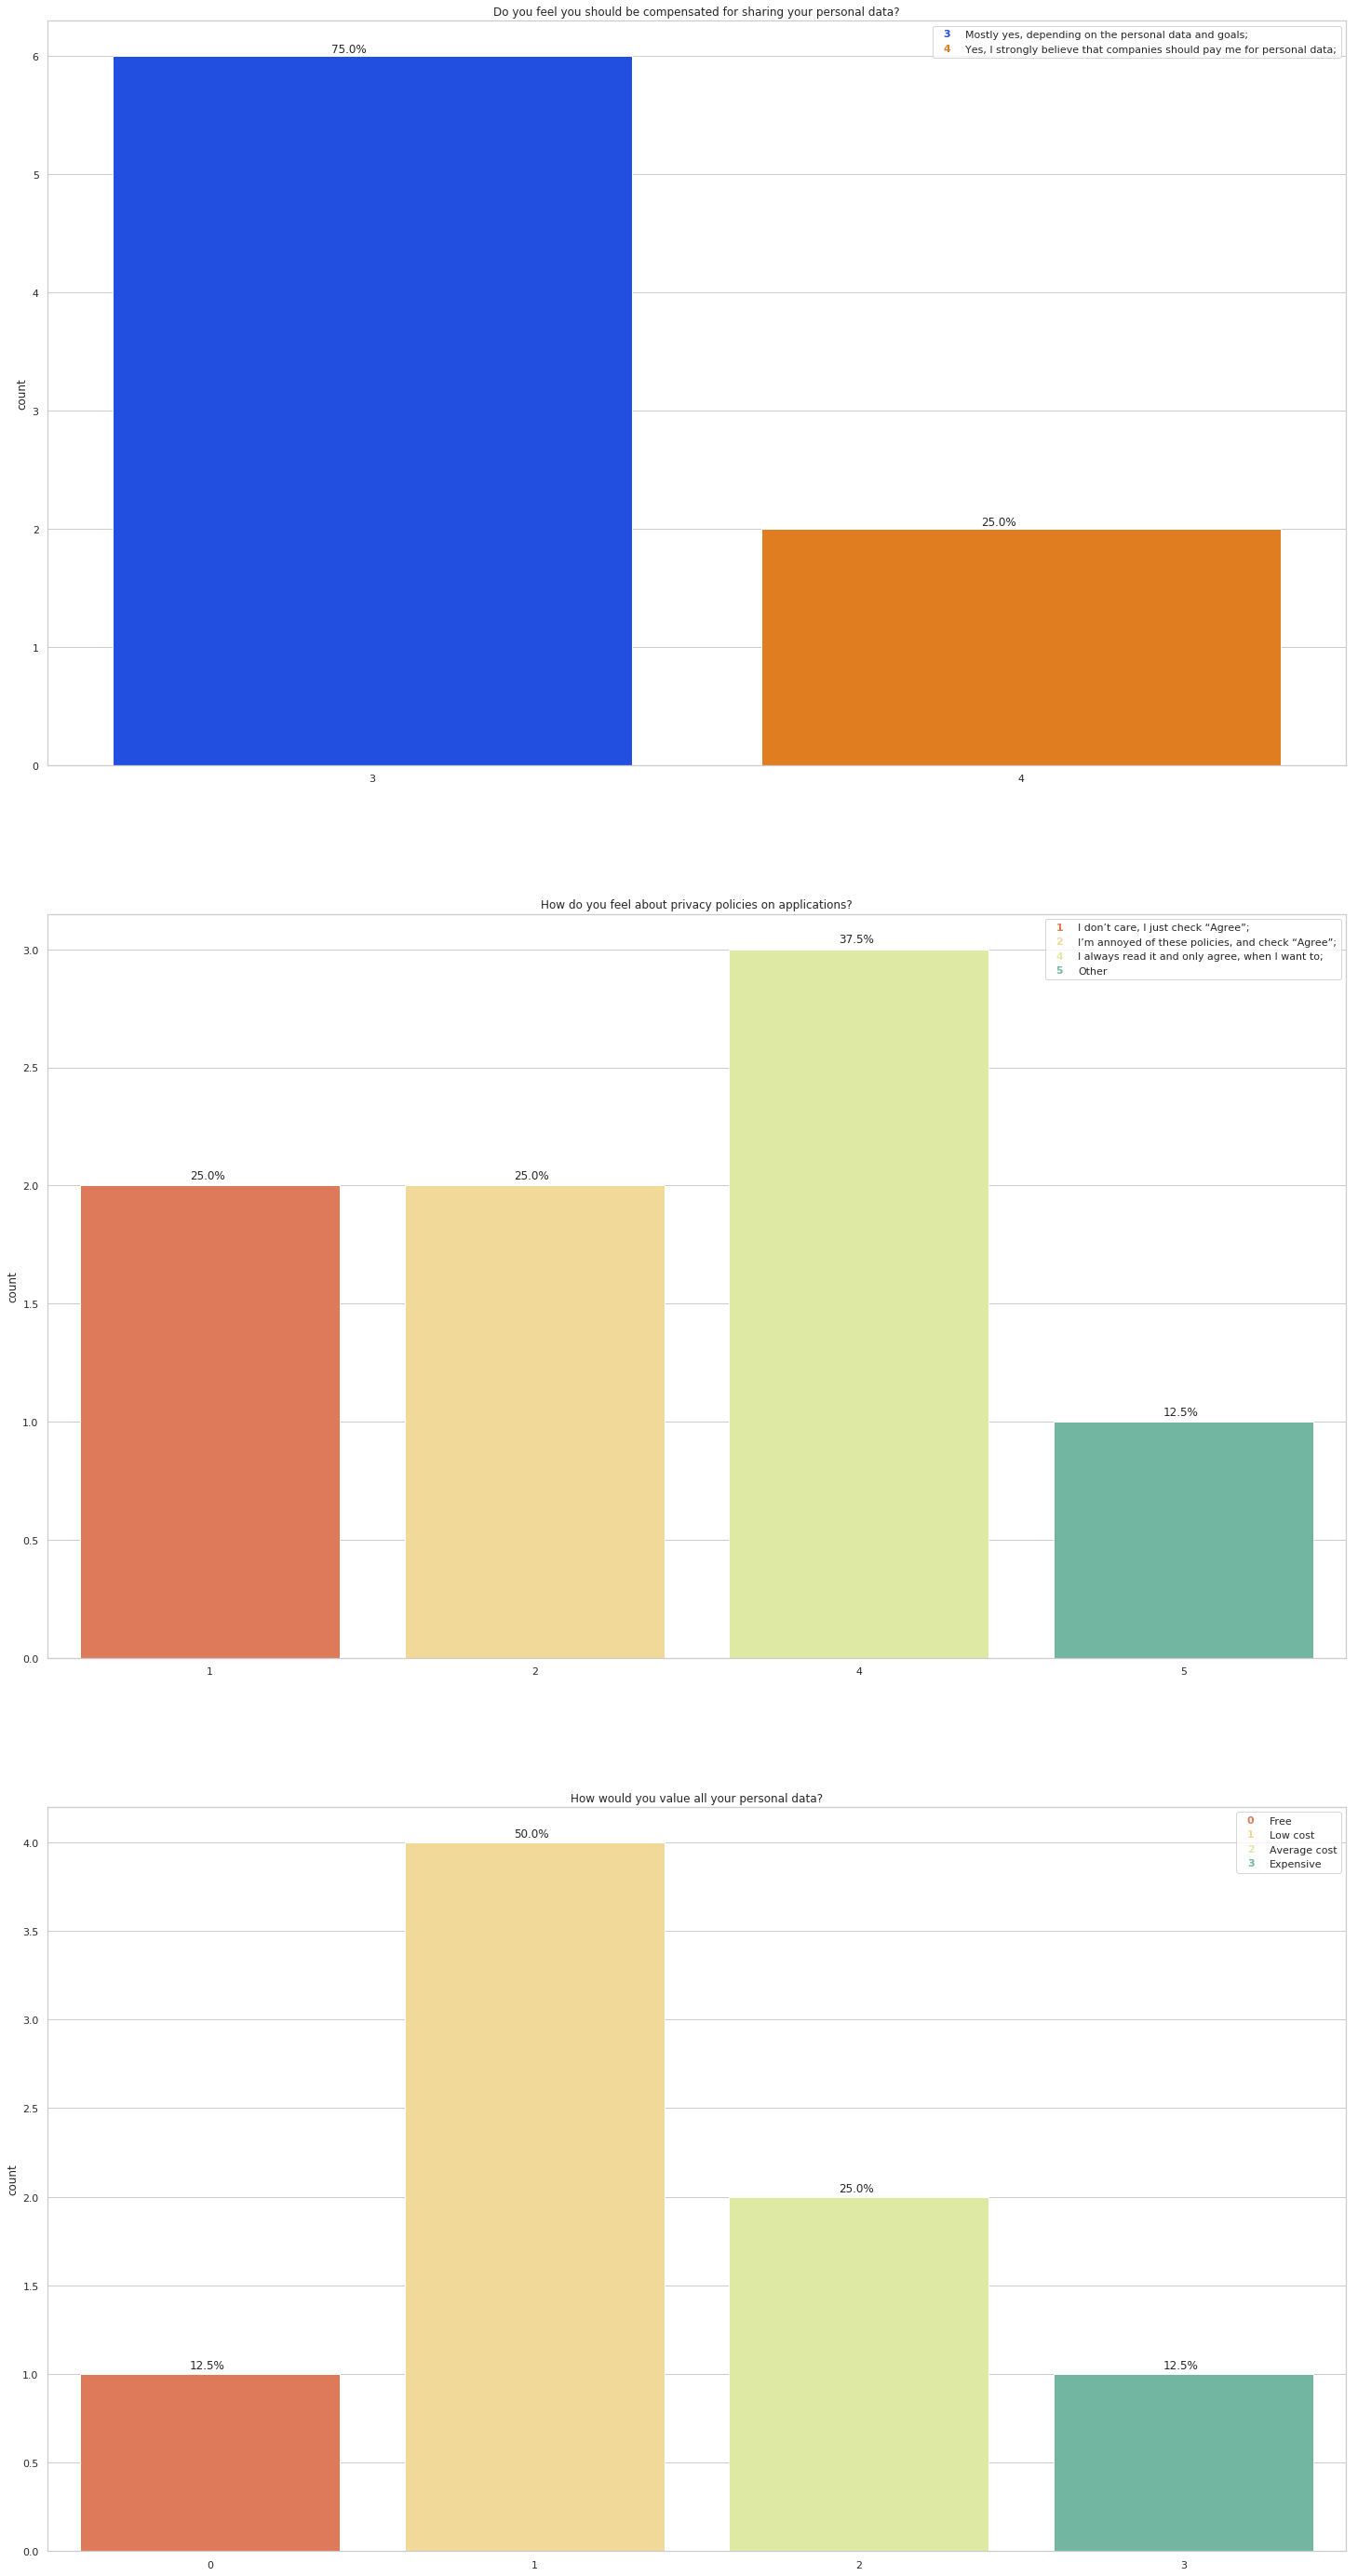

In [62]:
print_basics(purchasing_total_90_users, ' for Top 10 purchasing users')
print_work(purchasing_total_90_users, ' for Top 10 purchasing users')
print_opinions(purchasing_total_90_users, ' for Top 10 purchasing users')

In [63]:
print_who_is(purchasing_total_80_users, [POSITION, GENDER], ['Student', 'Female'])

[26, 21, 18]

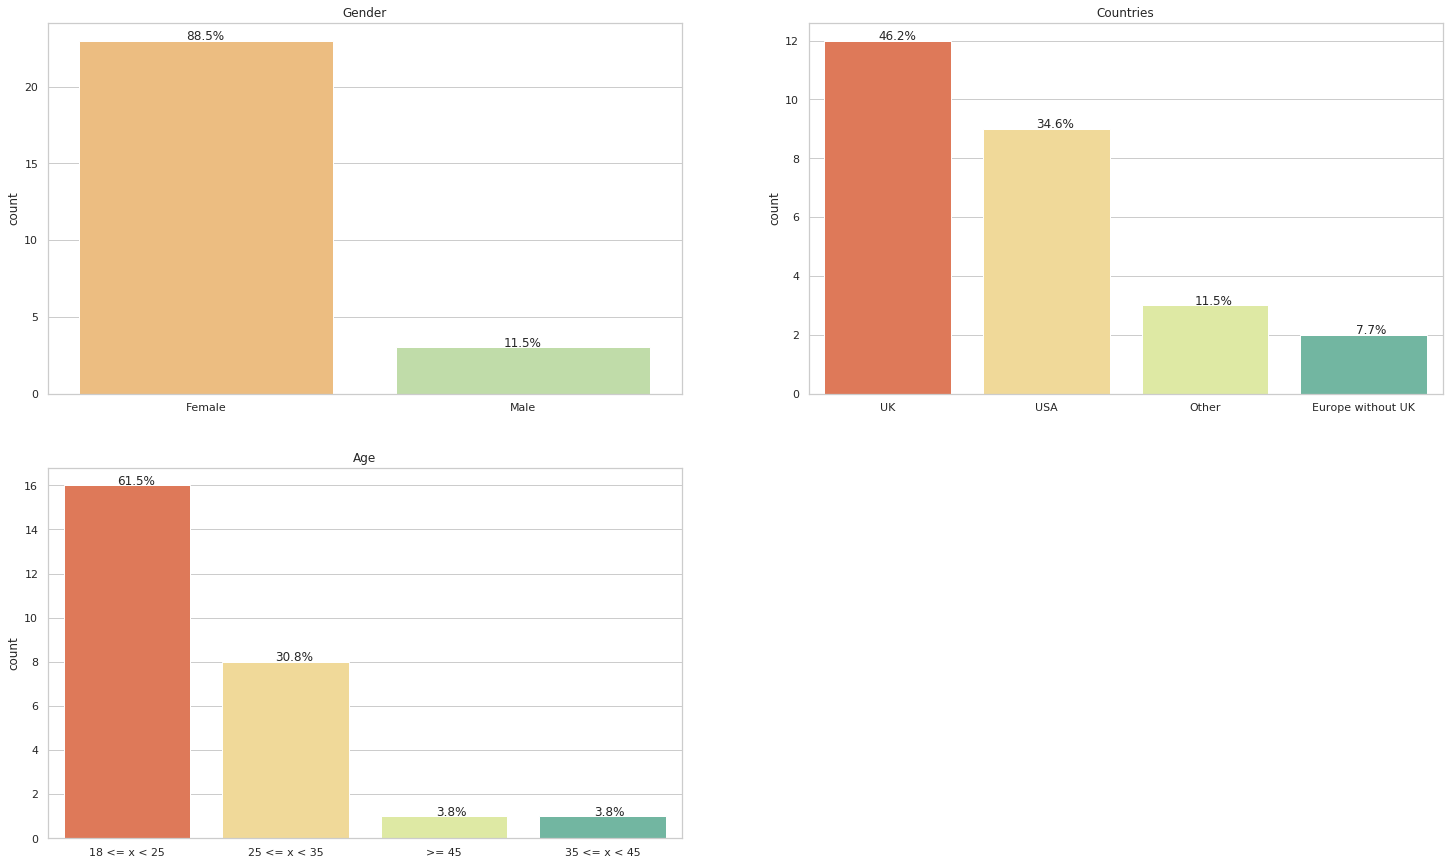

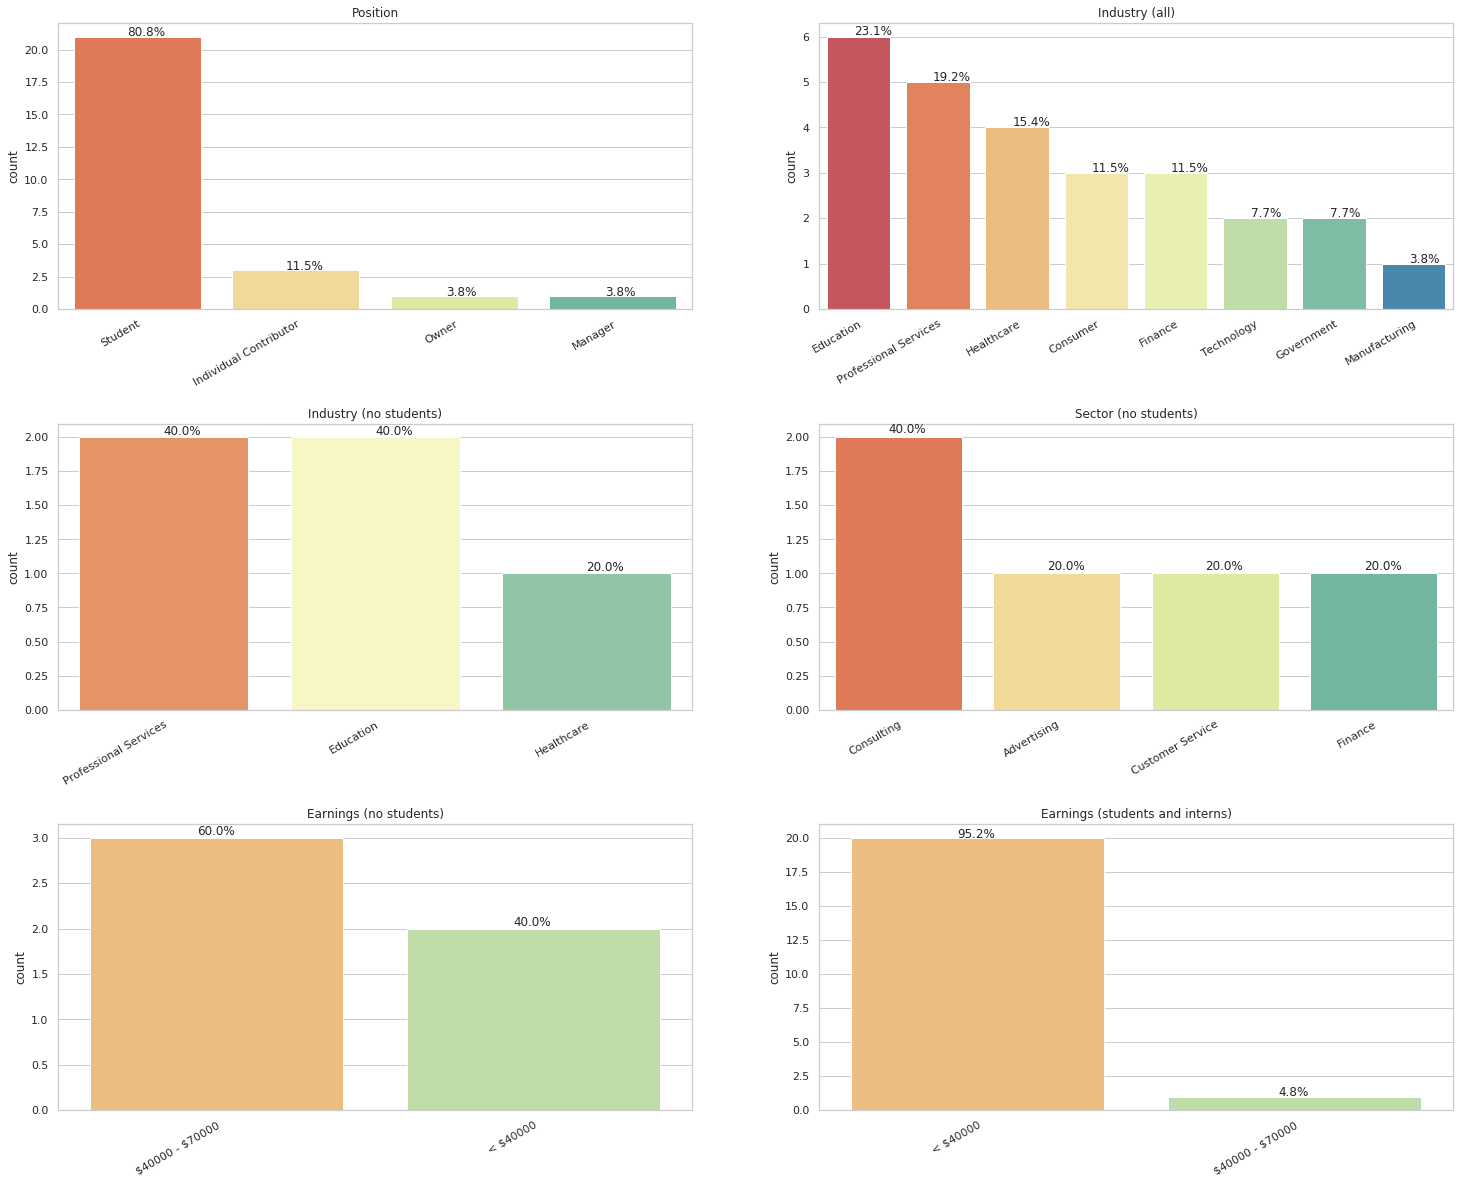

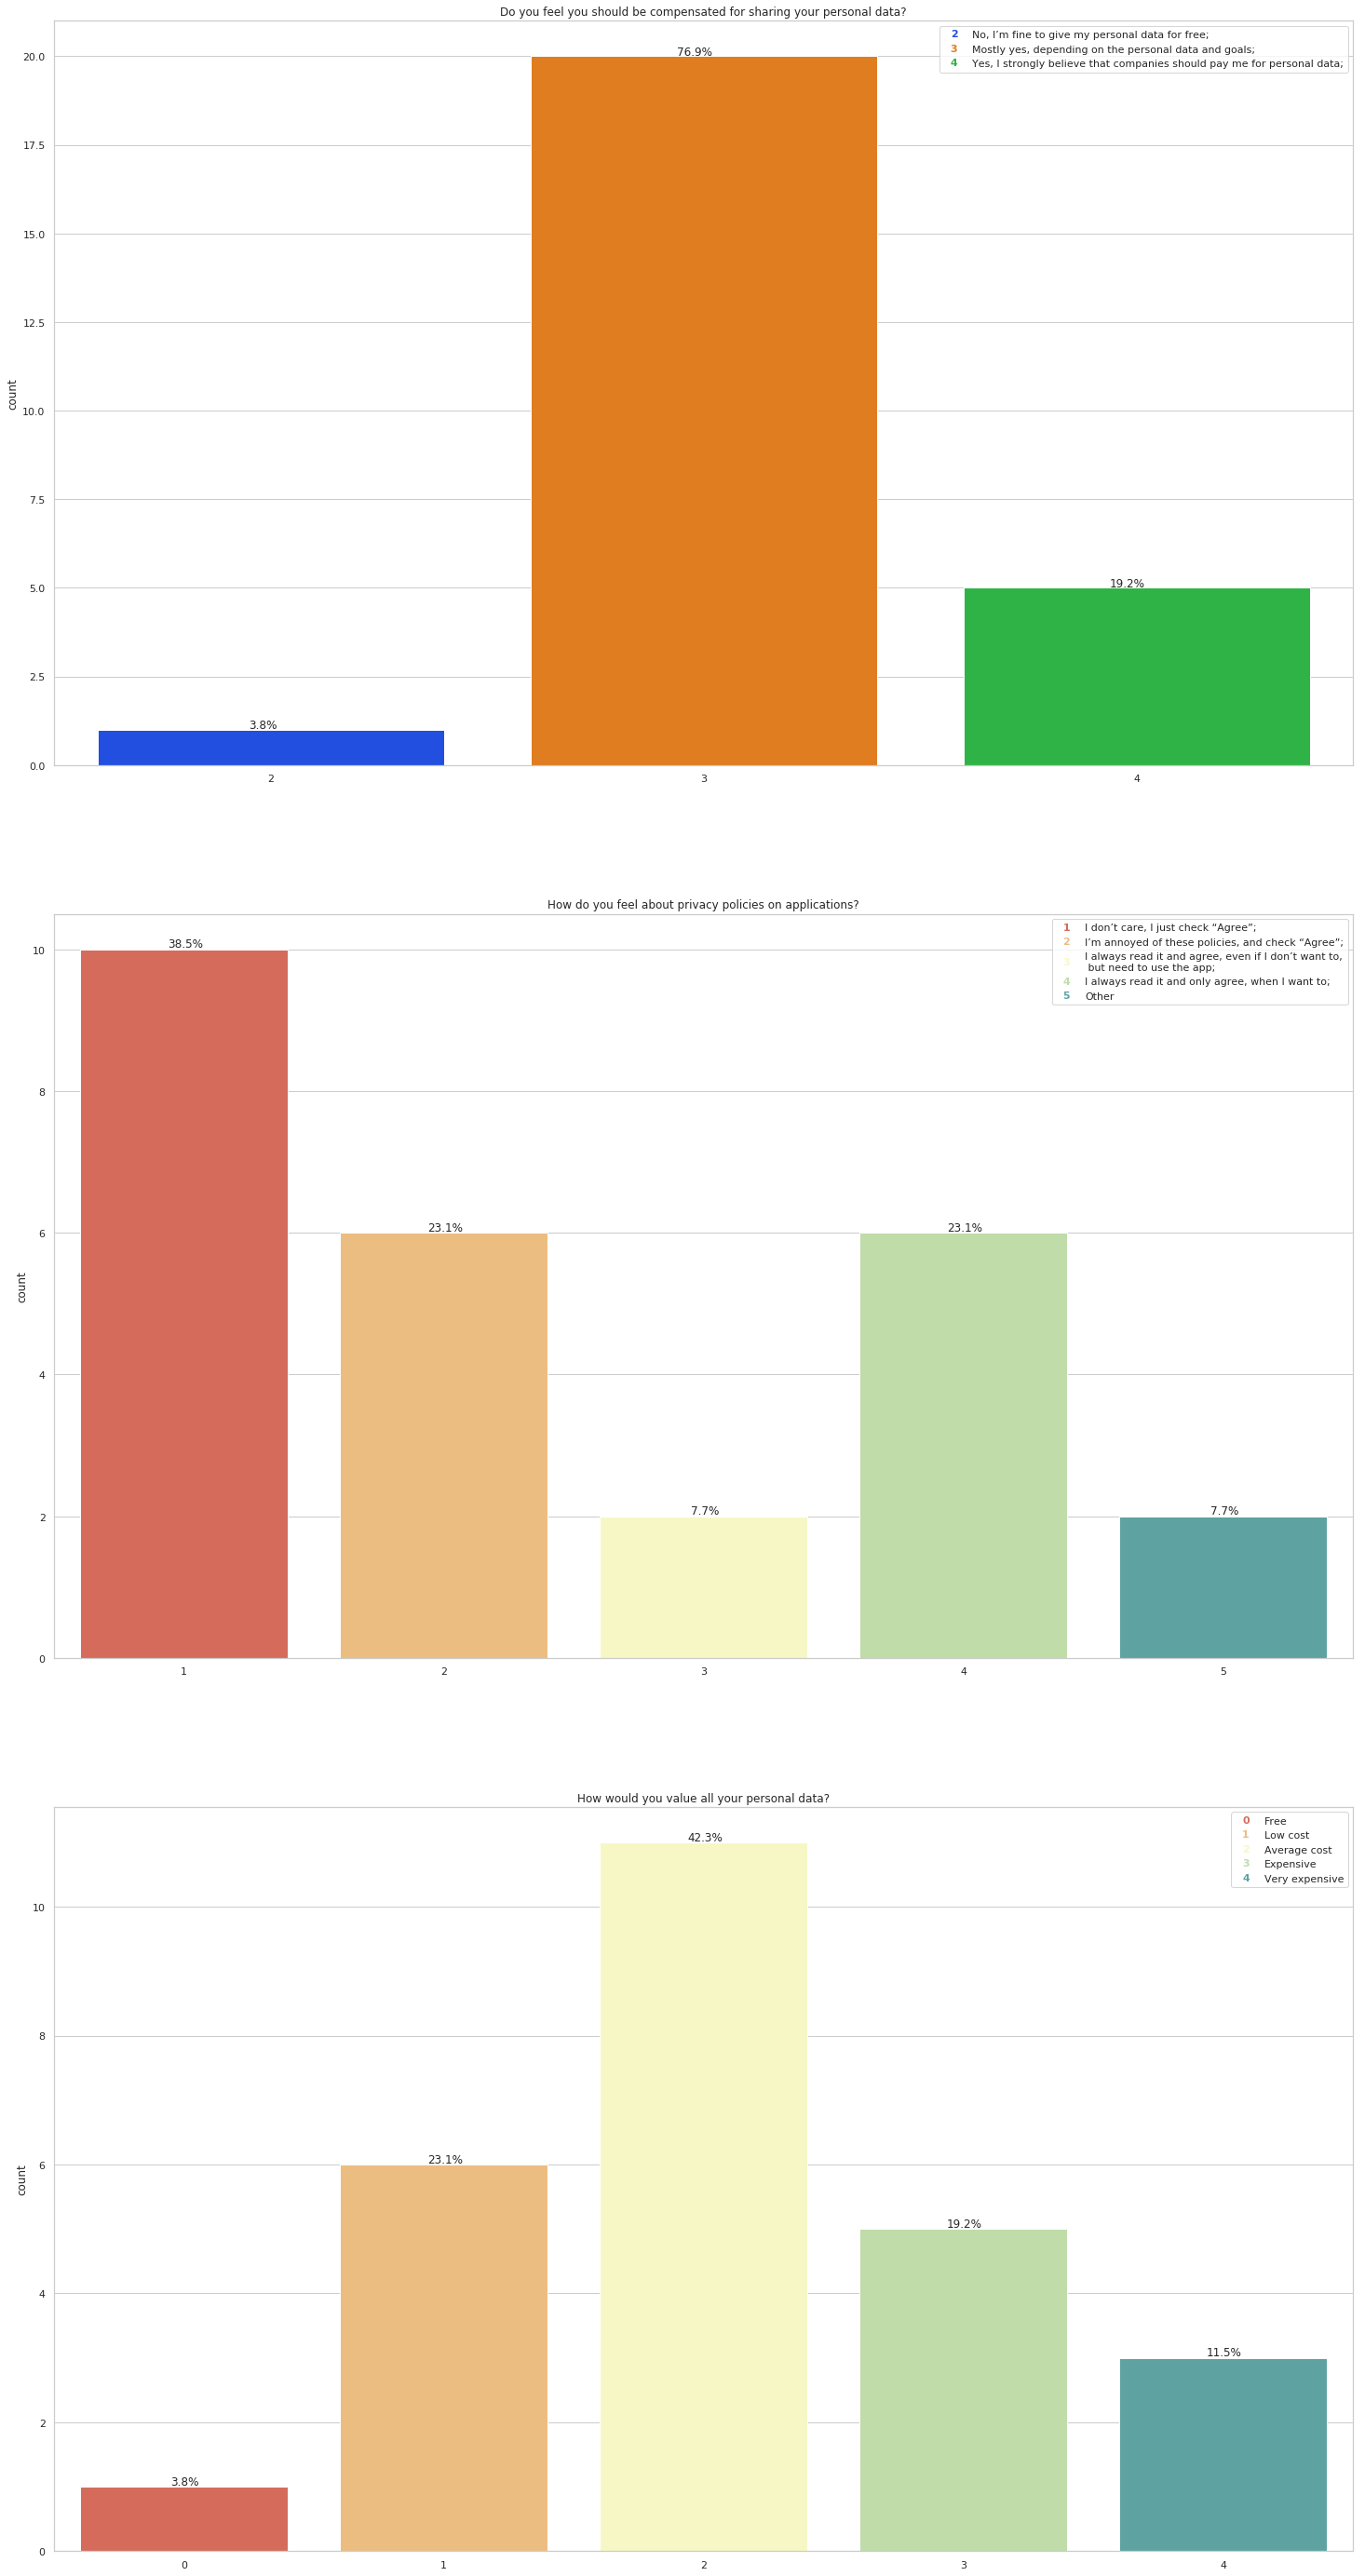

In [64]:
print_basics(purchasing_total_80_users, ' for Top 20 purchasing users')
print_work(purchasing_total_80_users, ' for Top 20 purchasing users')
print_opinions(purchasing_total_80_users, ' for Top 20 purchasing users')

In [65]:
print_who_is(purchasing_total_90_users, [POSITION, GENDER], ['Student', 'Female'])

[8, 7, 5]

In [66]:
purchasing_0_users = filtered_data[filtered_data[COUNT_PURCHASE_GOODS + '_norm'] <= 0]

In [67]:
print_who_is(purchasing_0_users, [POSITION, GENDER], ['Student', 'Female'])

[38, 28, 19]

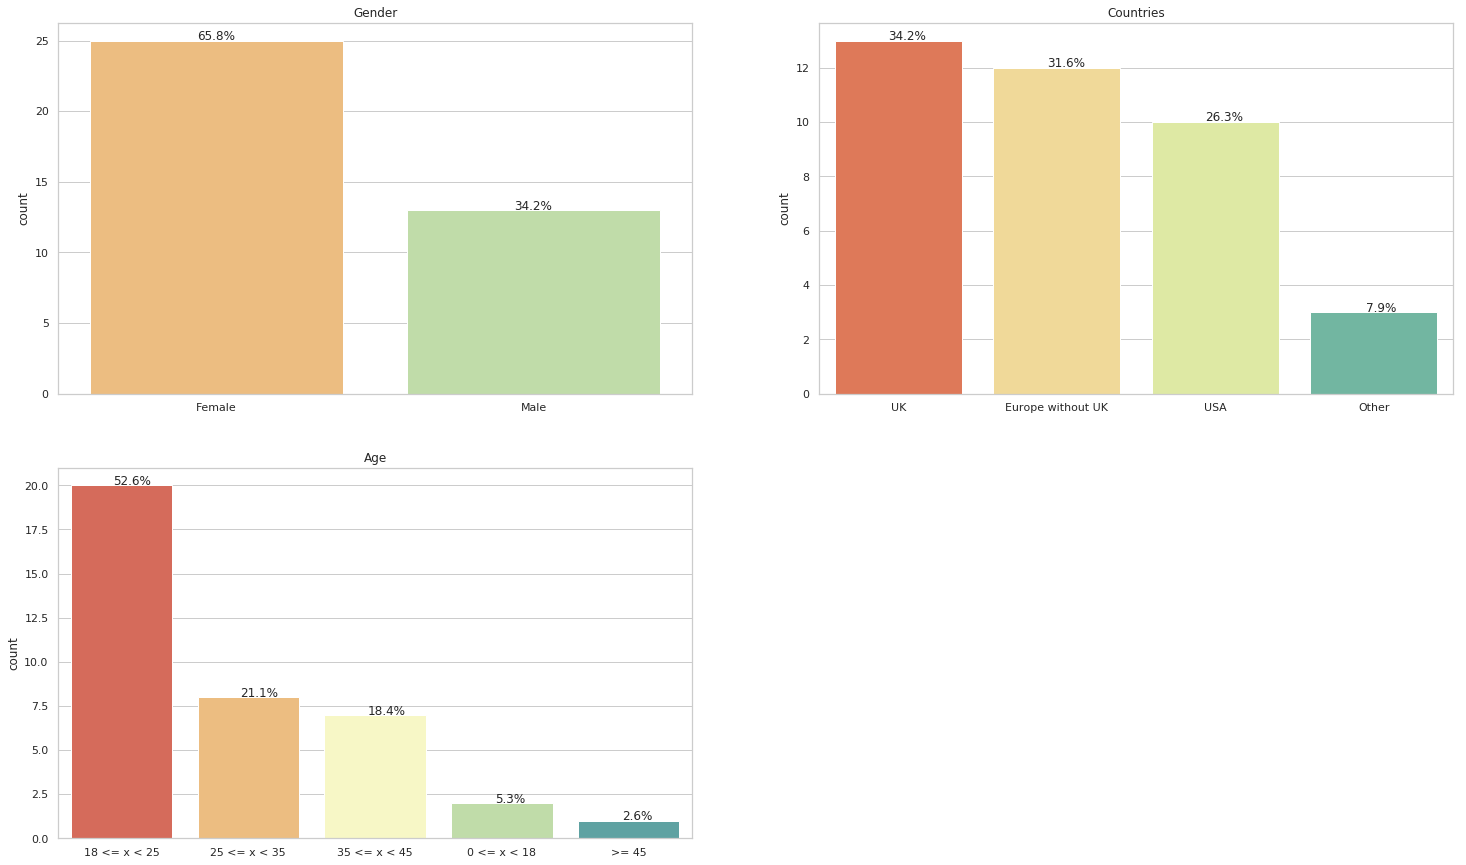

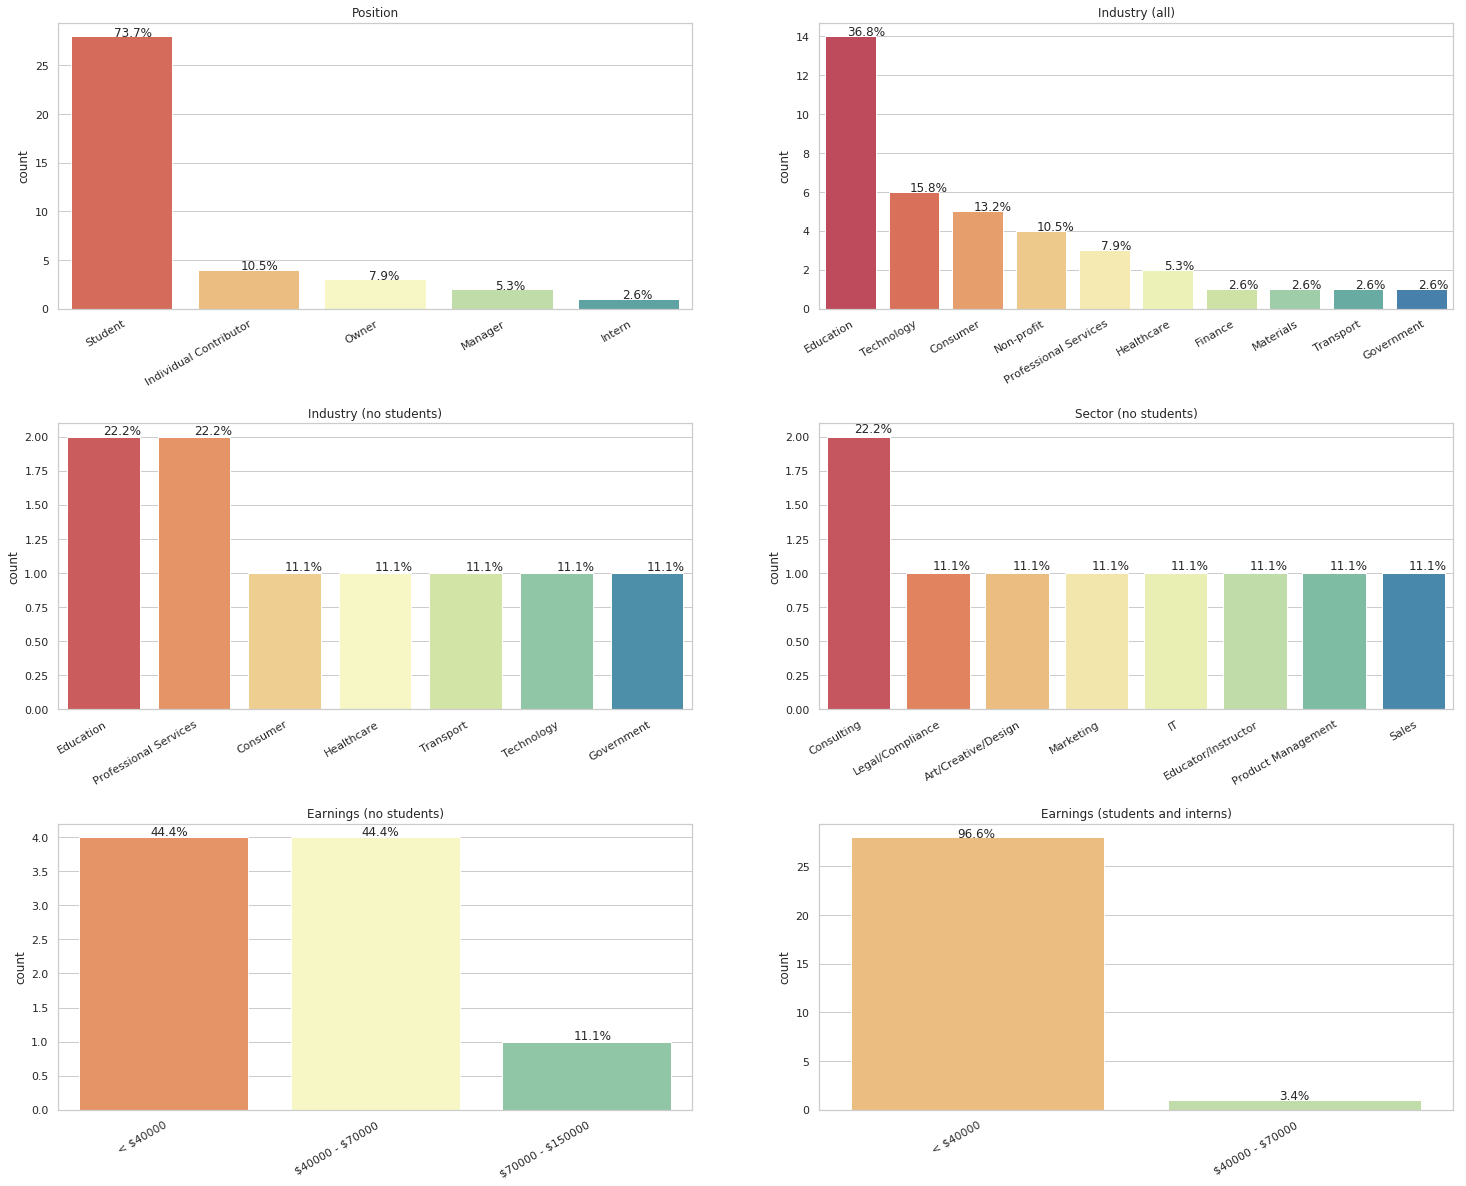

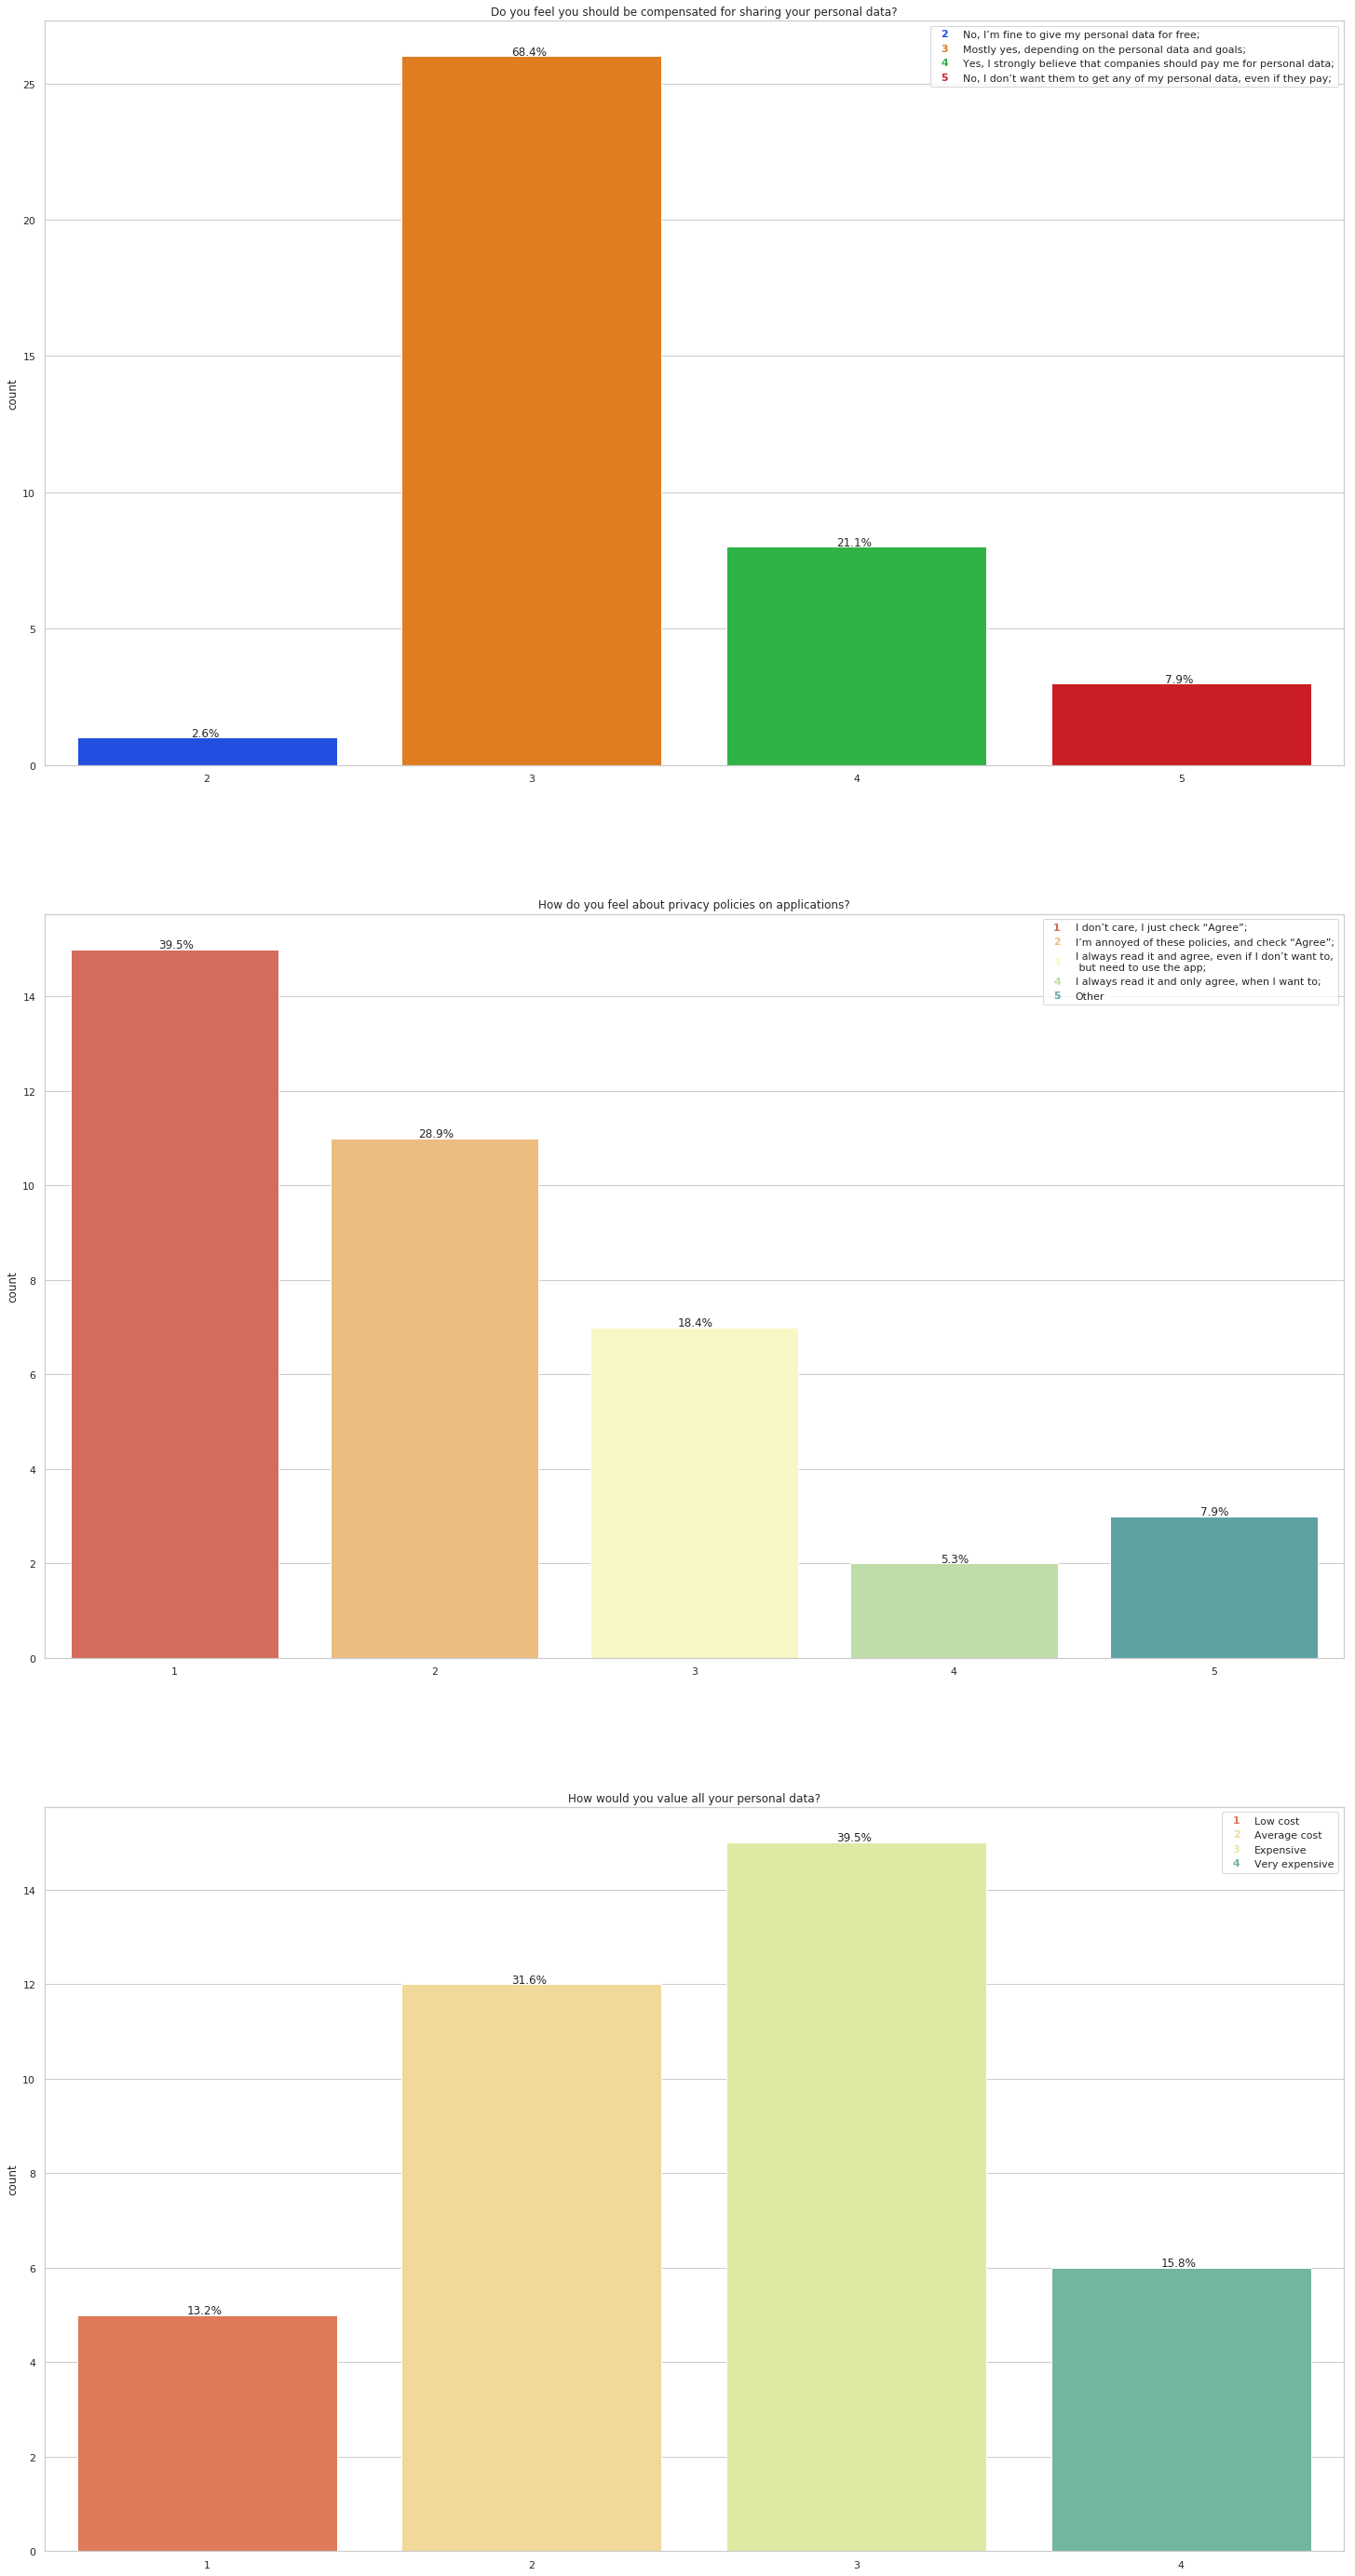

In [68]:
print_basics(purchasing_0_users, ' for users with 0 purchasing')
print_work(purchasing_0_users, ' for users with 0 purchasing')
print_opinions(purchasing_0_users, ' for users with 0 purchasing')

## Subscriptions

In [69]:
subscriptions_top_20_users = filtered_data[filtered_data[COUNT_SUBSCRIPTIONS + '_norm'] > filtered_data[COUNT_SUBSCRIPTIONS + '_norm'].quantile(0.8)]

In [70]:
print_who_is(subscriptions_top_20_users, [POSITION, GENDER], ['Student', 'Female'])

[26, 19, 11]

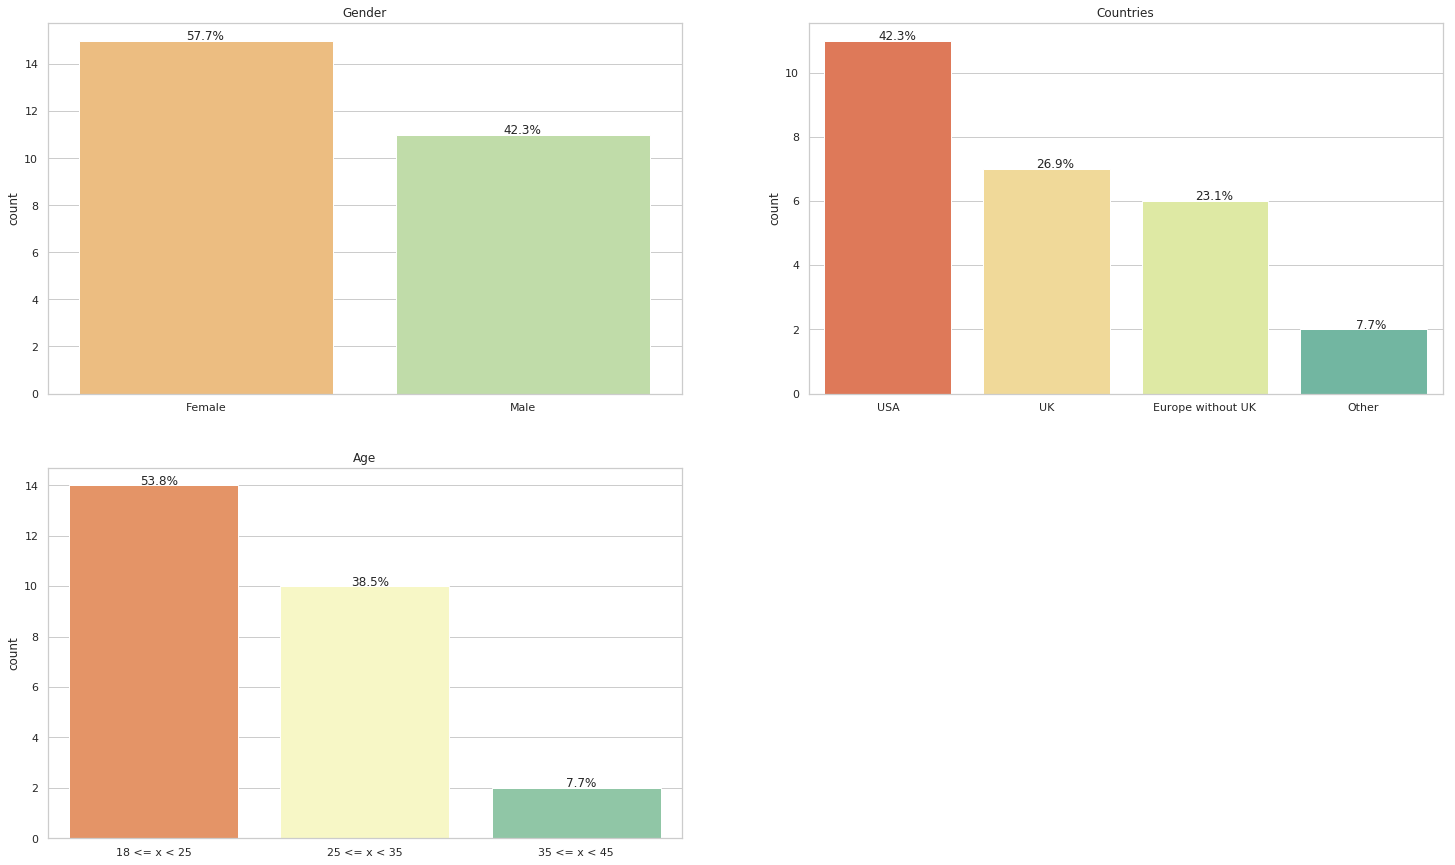

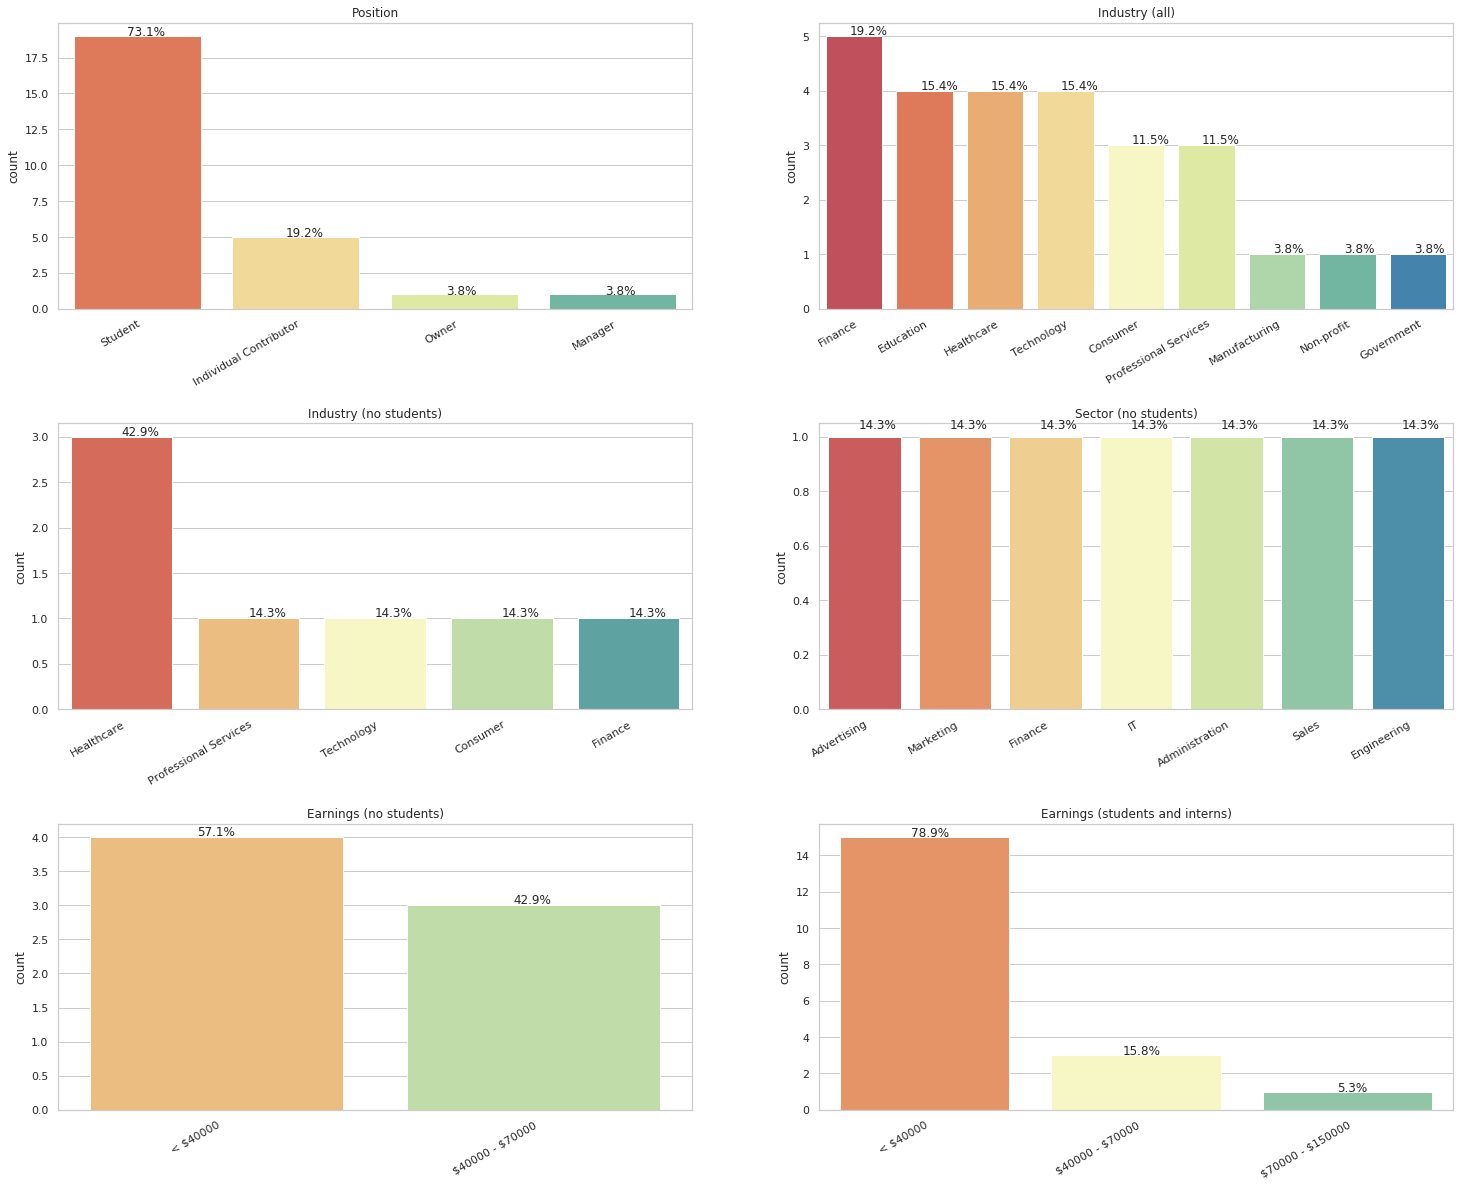

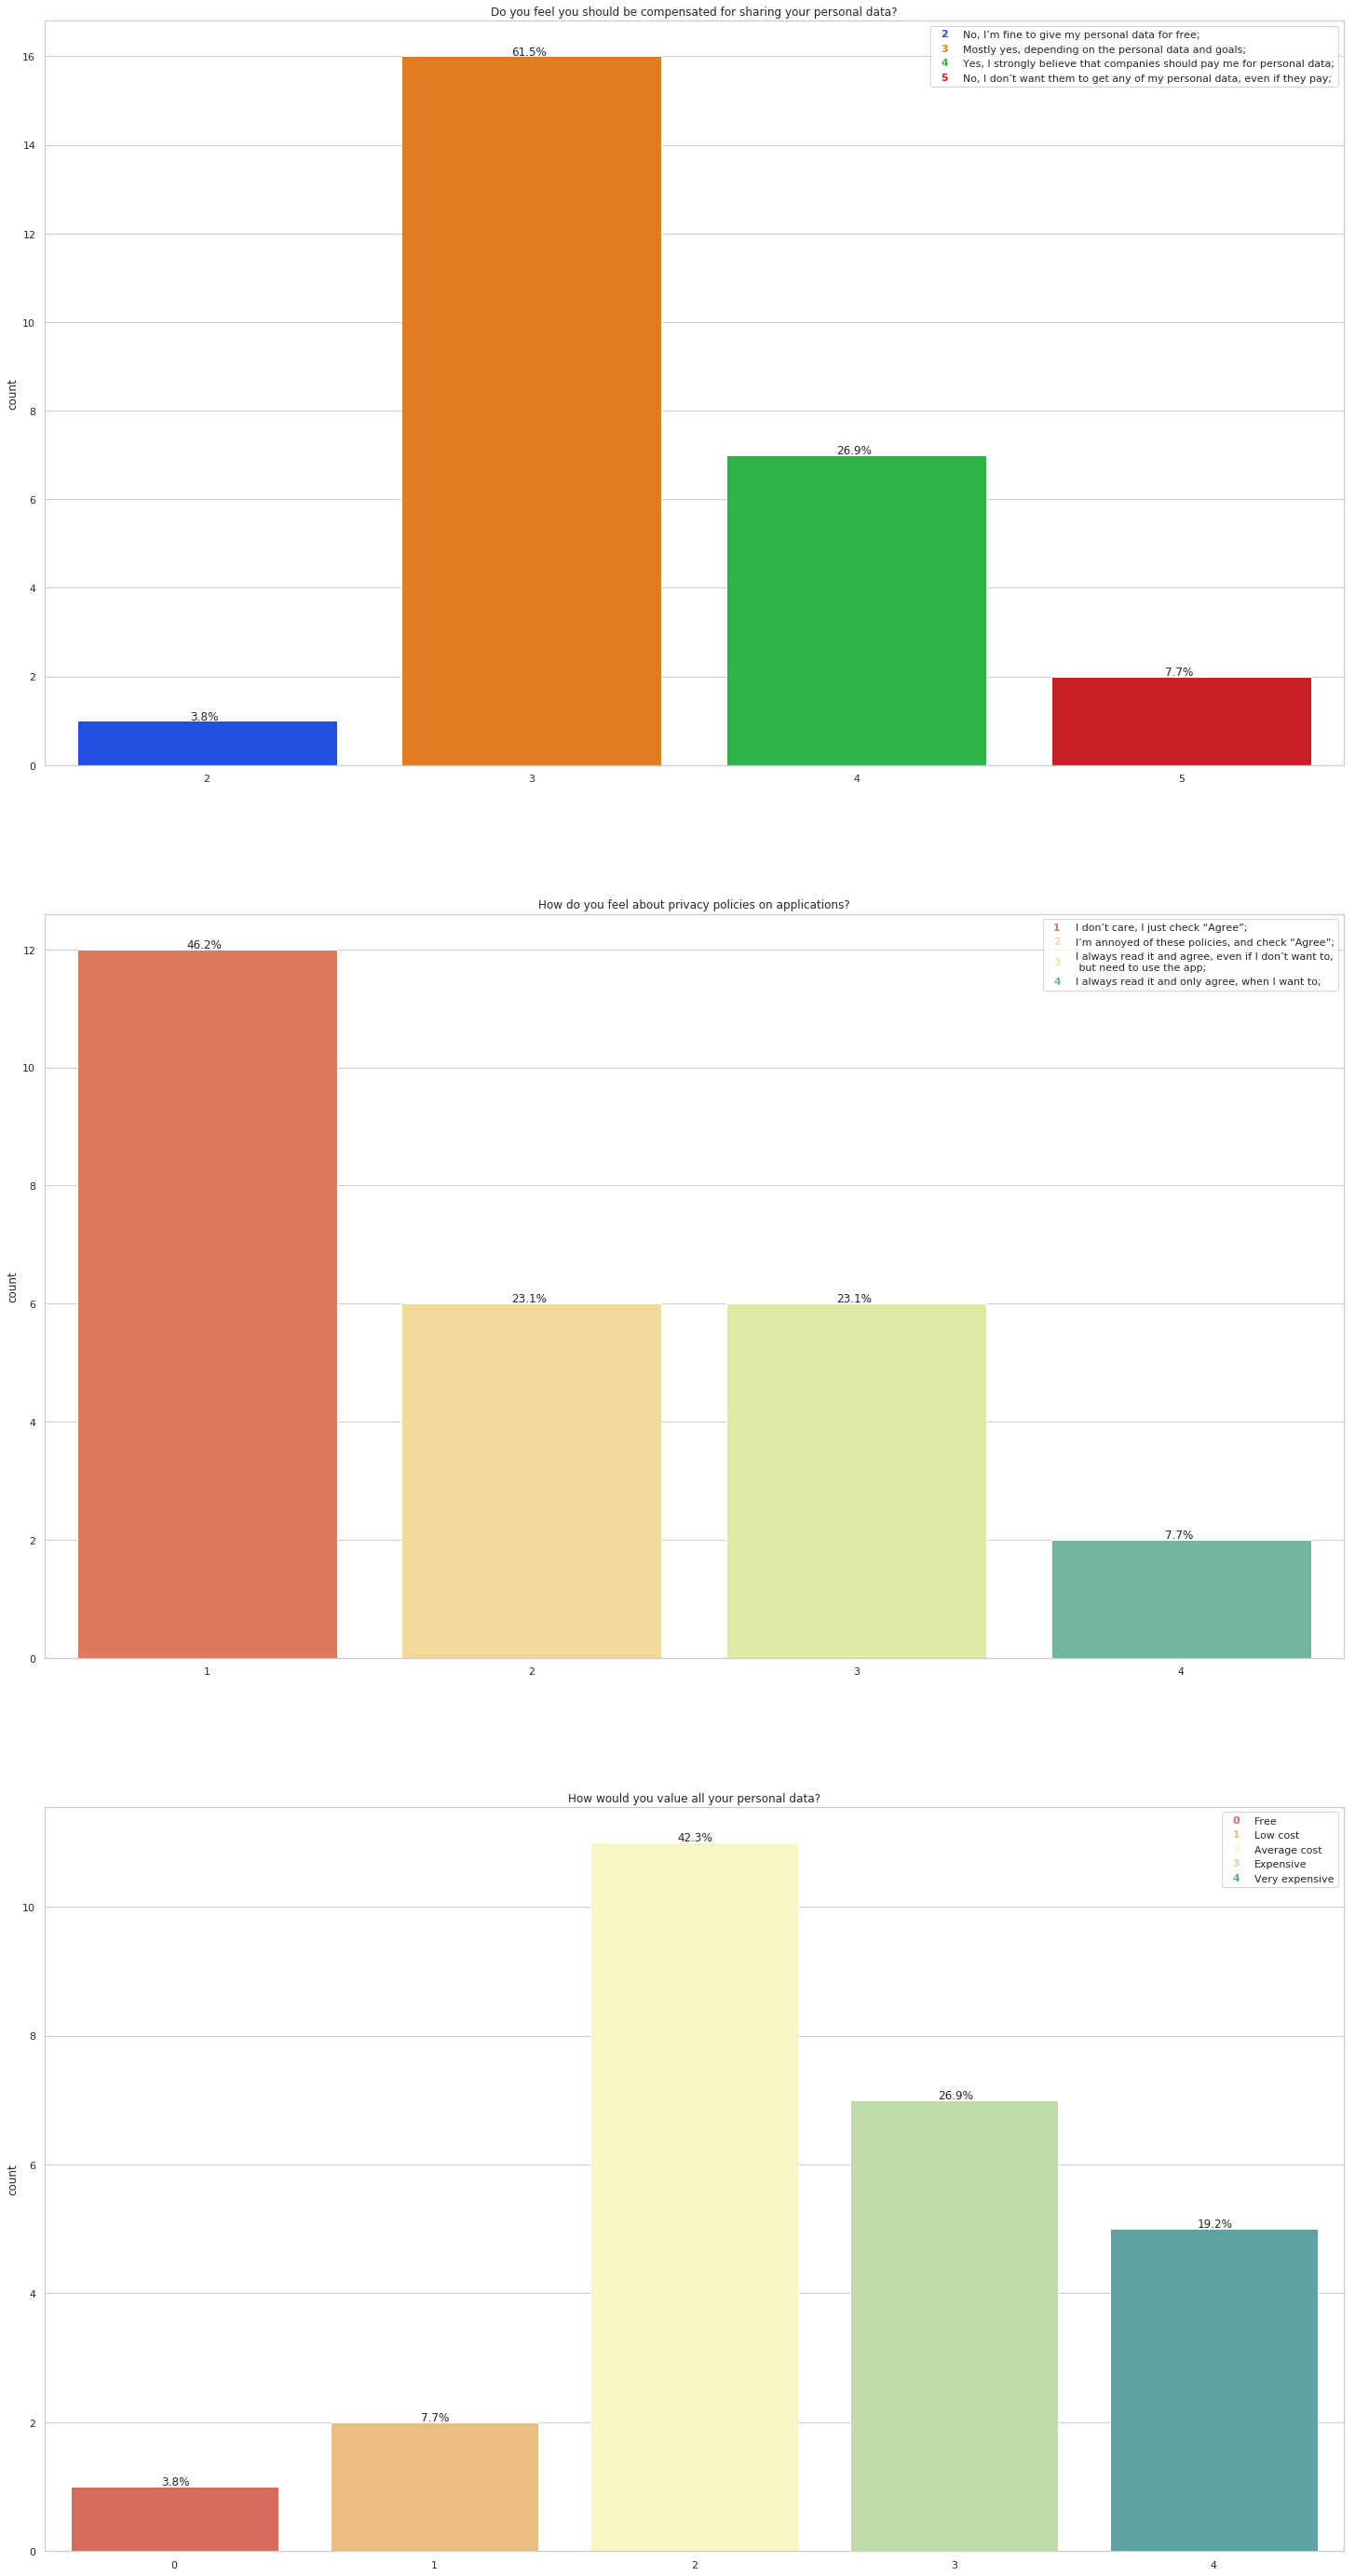

In [71]:
print_basics(subscriptions_top_20_users, ' for Top 20 subscriptions')
print_work(subscriptions_top_20_users, ' for Top 20 subscriptions')
print_opinions(subscriptions_top_20_users, ' for Top 20 subscriptions')

In [72]:
subscriptions_0_users = filtered_data[filtered_data[COUNT_SUBSCRIPTIONS + '_norm'] <= 0]

In [73]:
print(print_who_is(subscriptions_0_users, [POSITION, GENDER], ['Student', 'Female']))
print(print_who_is(subscriptions_0_users, [GENDER, POSITION], ['Female', 'Student']))

[70, 53, 35]
[70, 45, 35]


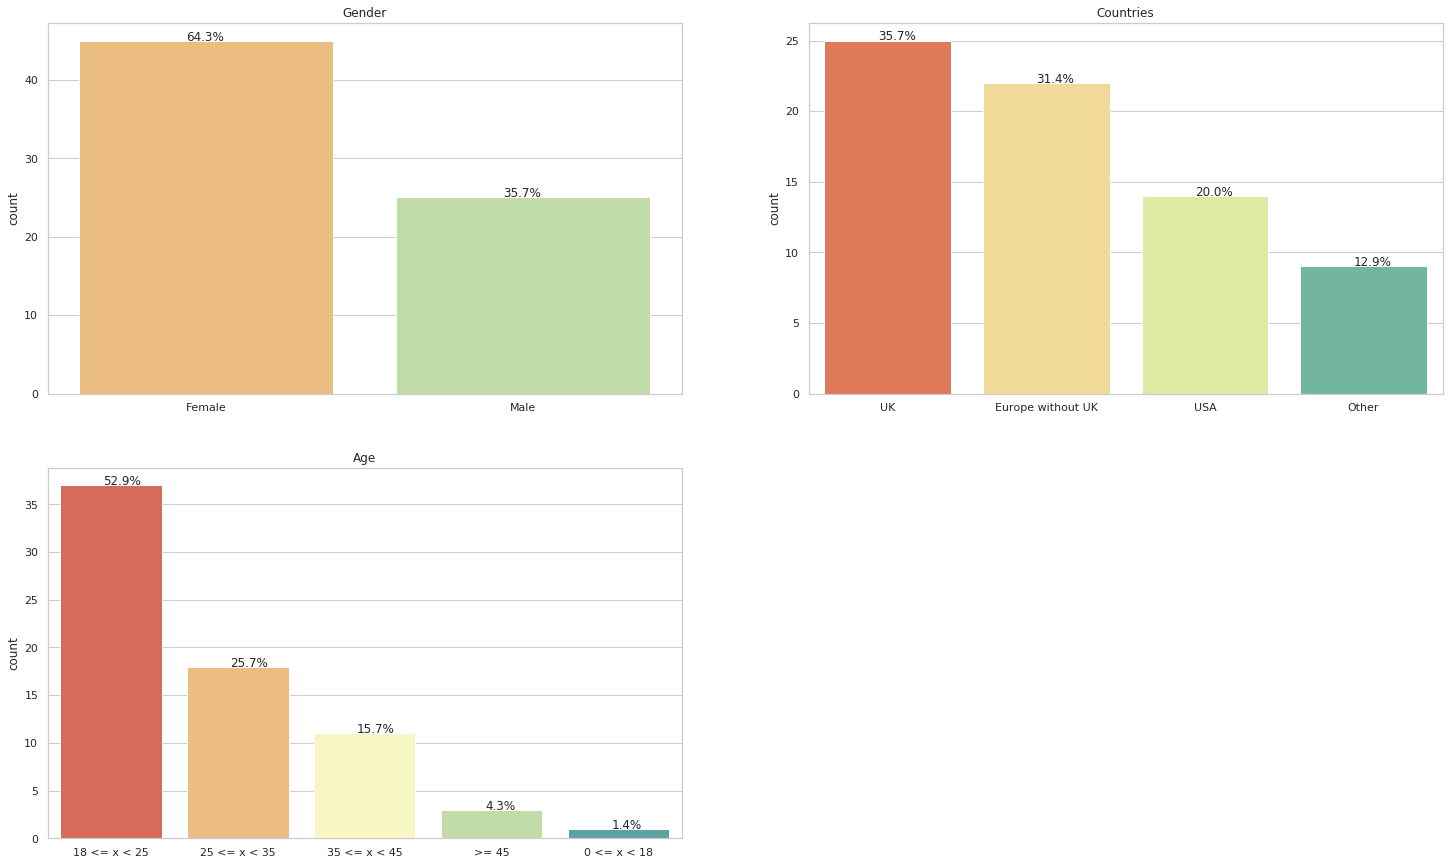

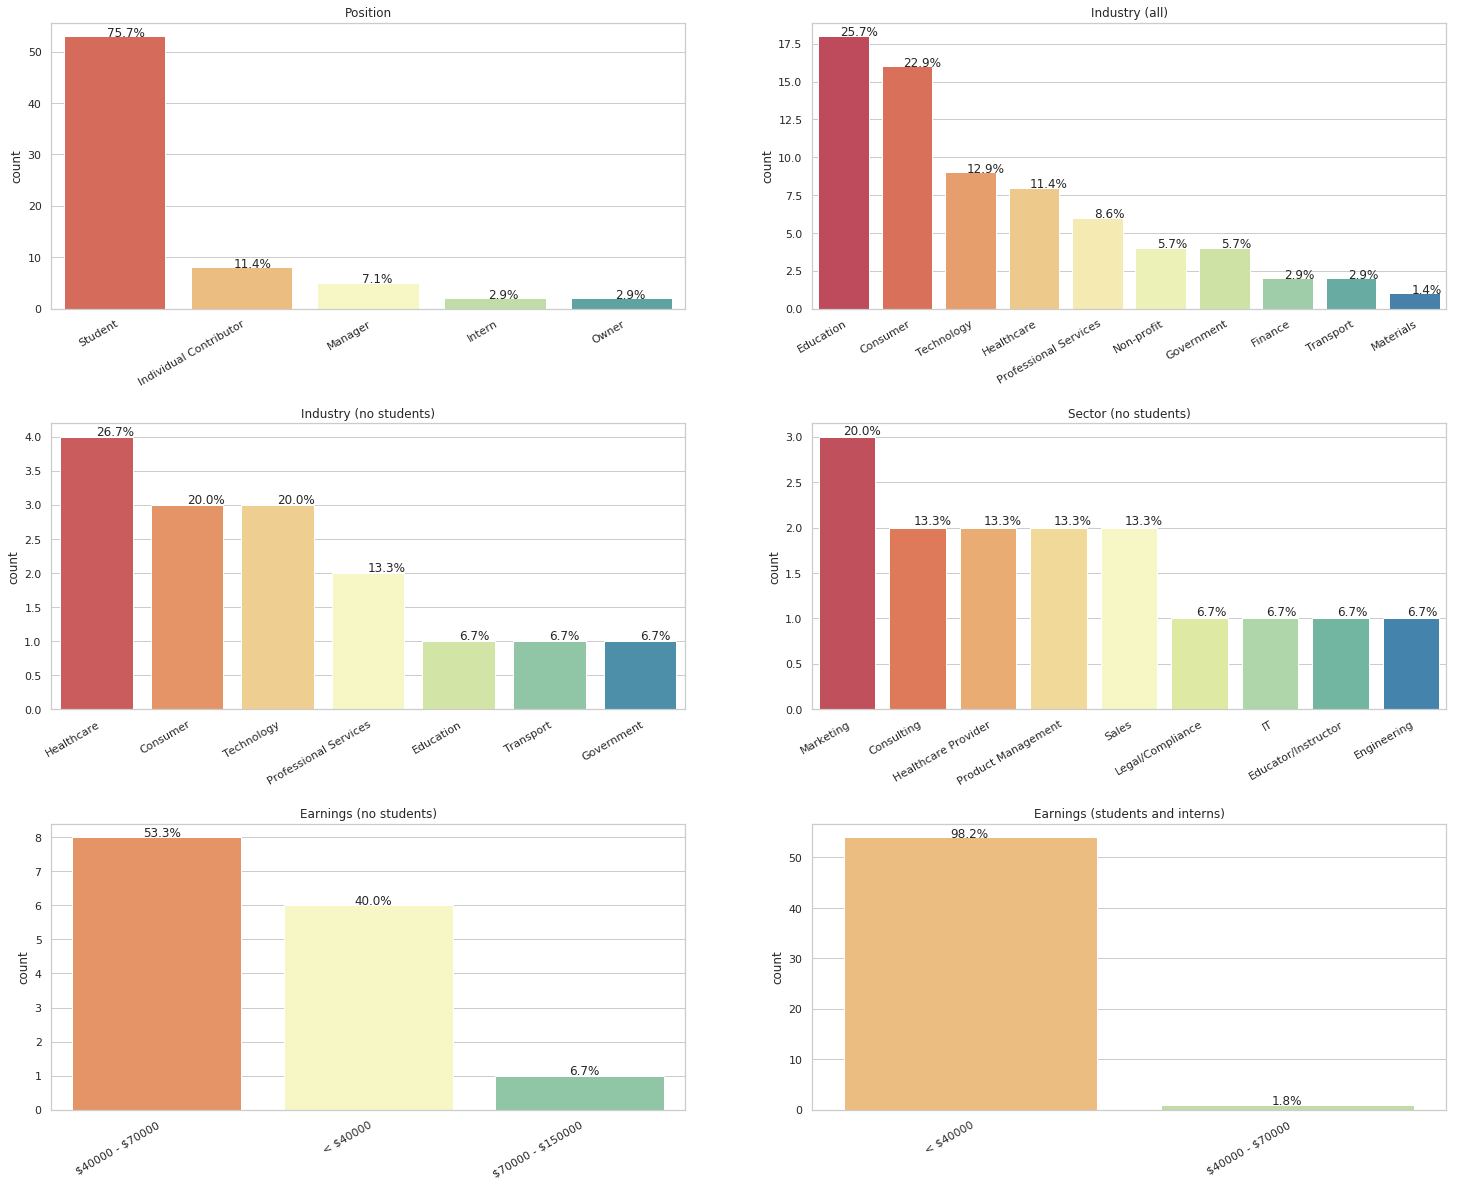

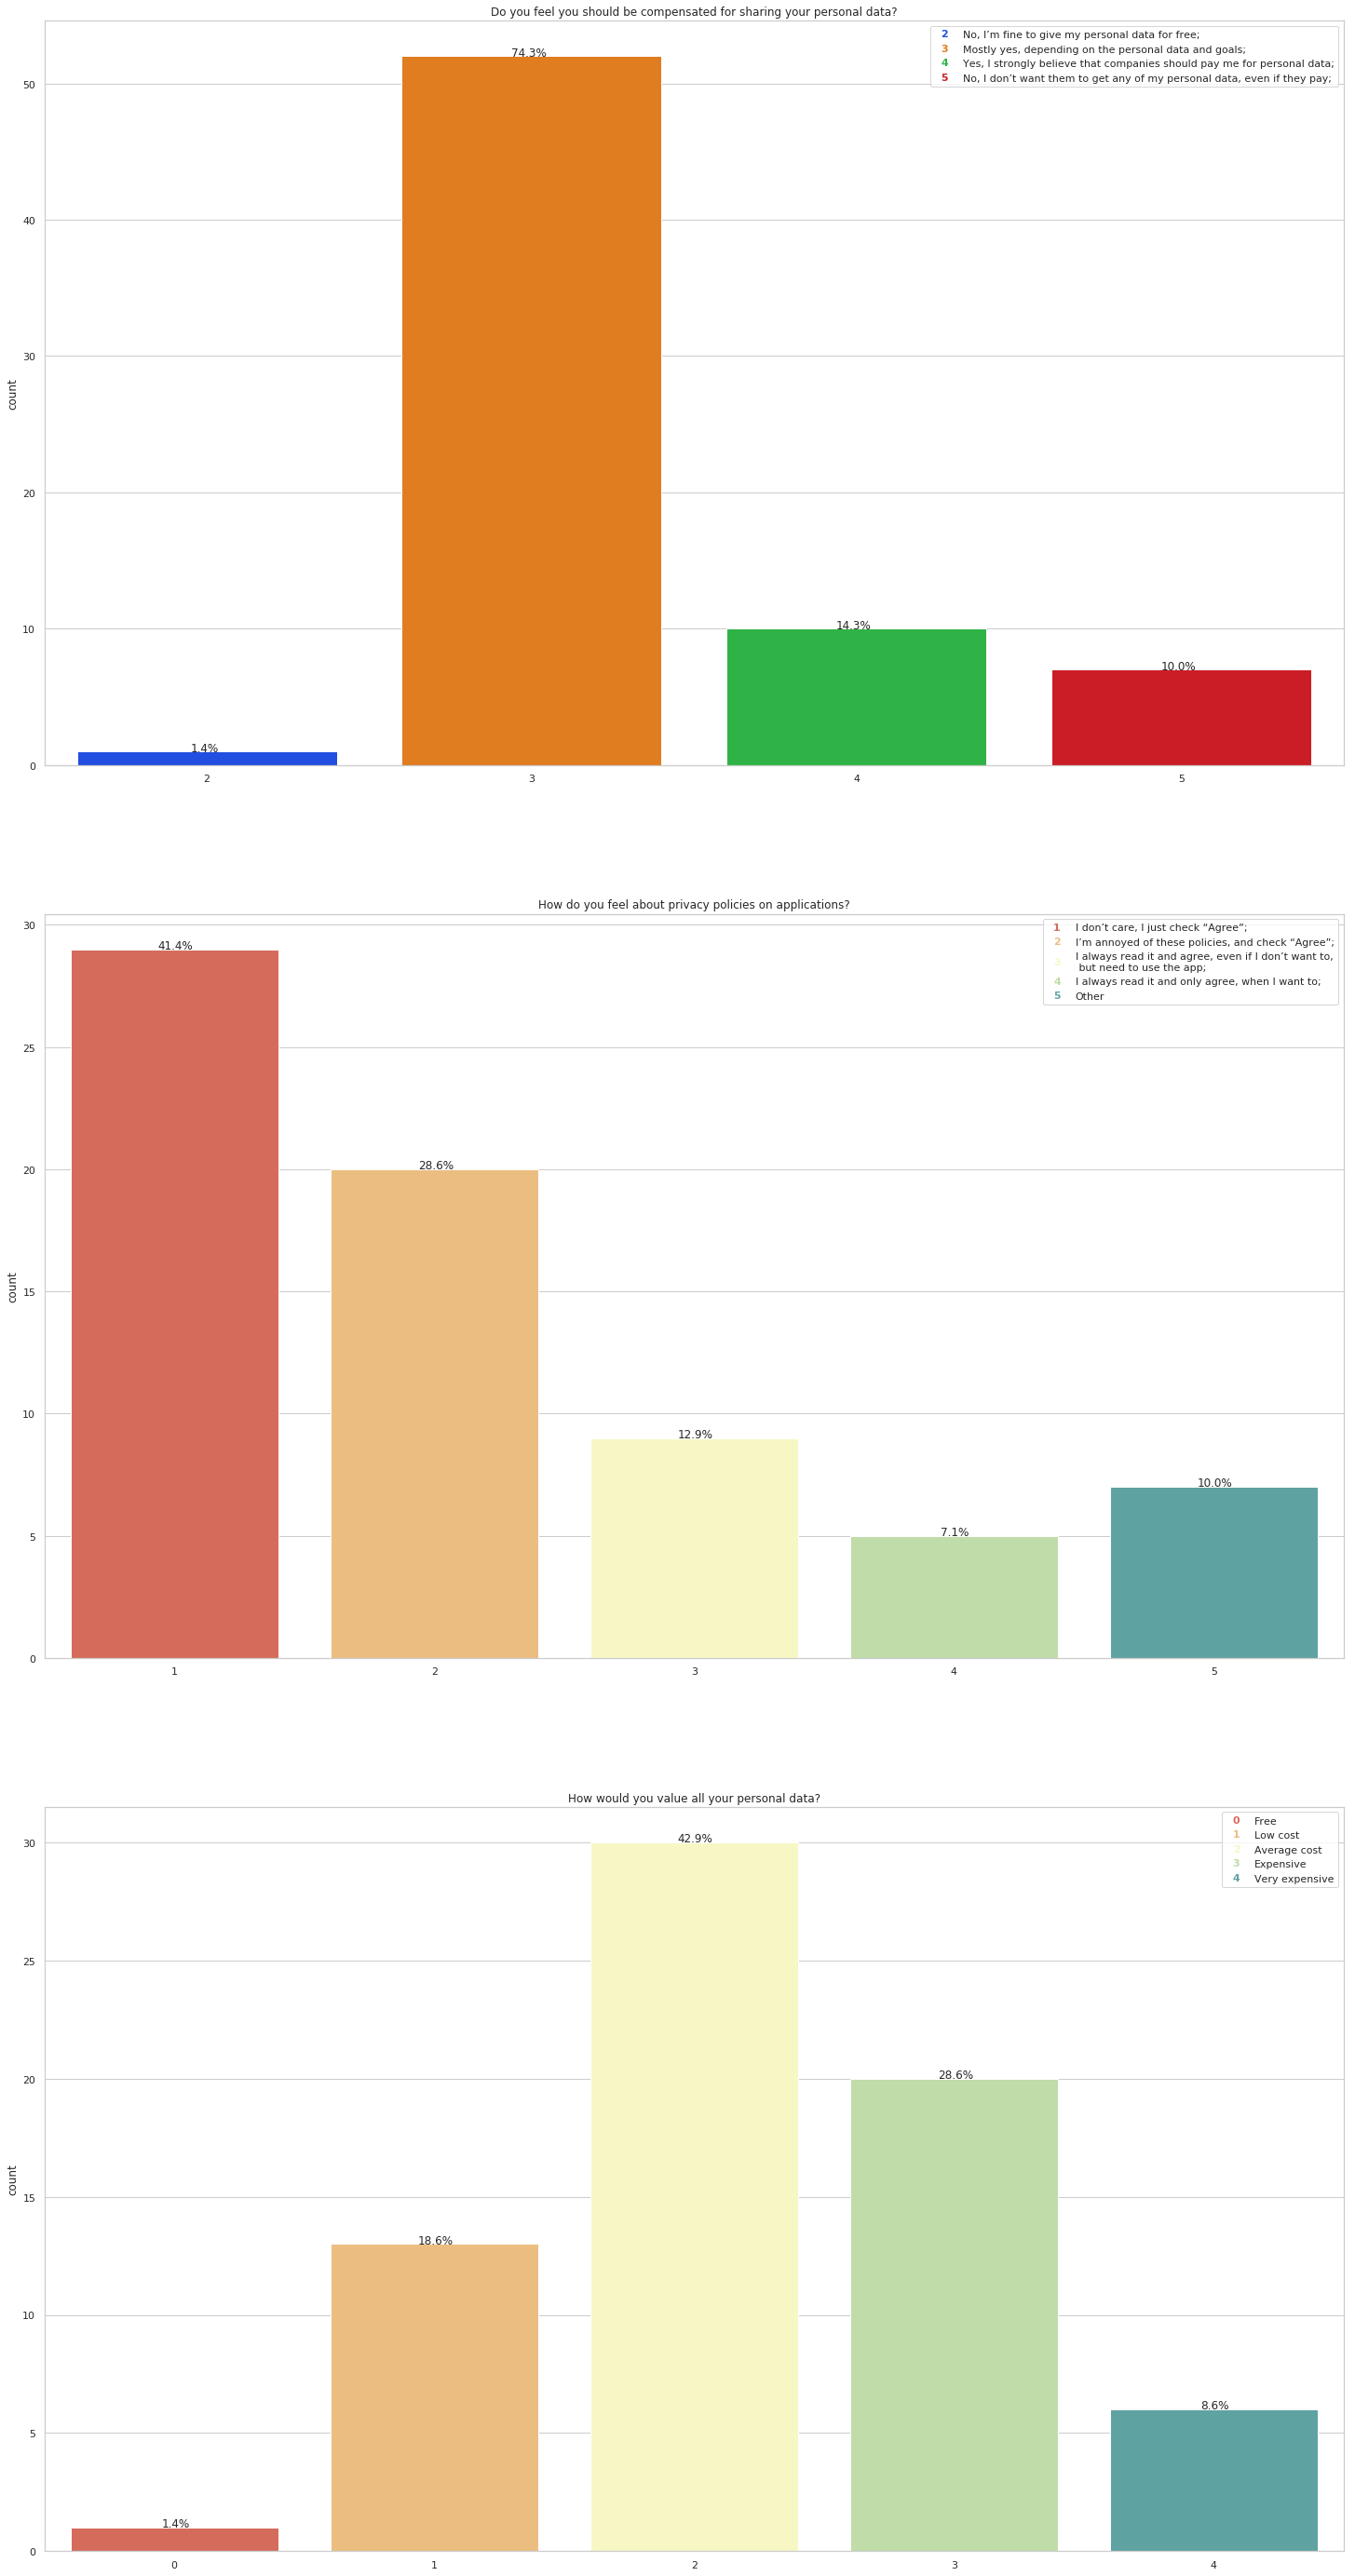

In [74]:
print_basics(subscriptions_0_users, ' for users with 0 subscriptions')
print_work(subscriptions_0_users, ' for users with 0 subscriptions')
print_opinions(subscriptions_0_users, ' for users with 0 subscriptions')

## Statistical tests

In [75]:
NORM_COUNTS = [COUNT_BANKS + '_norm', COUNT_GAMES + '_norm', COUNT_PAYMENTS + '_norm', COUNT_PURCHASE_GOODS + '_norm', \
               COUNT_SOCIAL + '_norm', COUNT_SUBSCRIPTIONS + '_norm', COUNT_TOTAL_APPS + '_norm']

In [76]:
SHORT_NAMES = {
    COUNT_BANKS + '_norm': 'Banks',
    COUNT_GAMES + '_norm': 'Games',
    COUNT_PAYMENTS + '_norm': 'Pay',
    COUNT_PURCHASE_GOODS + '_norm': 'Goods',
    COUNT_SOCIAL + '_norm': "Social",
    COUNT_SUBSCRIPTIONS + '_norm': 'Subs',
    COUNT_TOTAL_APPS + '_norm': 'Total',
    COMPENSATION + '_norm': 'Compensation'
}

In [77]:
SHORT_COUNT_NAMES = [ v for k, v in SHORT_NAMES.items() if "How many" in k ]

In [78]:
SHORT_COUNT_NAMES

['Banks', 'Games', 'Pay', 'Goods', 'Social', 'Subs', 'Total']

In [79]:
counts_data = filtered_data[NORM_COUNTS + [COMPENSATION + '_norm']]
for k,v in SHORT_NAMES.items():
    counts_data[v] = counts_data[k]
counts_data.drop(SHORT_NAMES.keys(), axis=1, inplace=True)

/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/egor/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
counts_data.head()

,Banks,Games,Pay,Goods,Social,Subs,Total,Compensation
0,2,0,1,6,7,0,22,3
1,3,0,1,0,3,2,10,4
2,0,2,0,0,0,0,15,5
3,1,3,1,0,4,0,10,3
4,1,6,0,2,5,1,35,5


/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/egor/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/egor/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/egor/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/home/egor/anaconda3/lib/python3.7/site-packages/numpy/core/fr

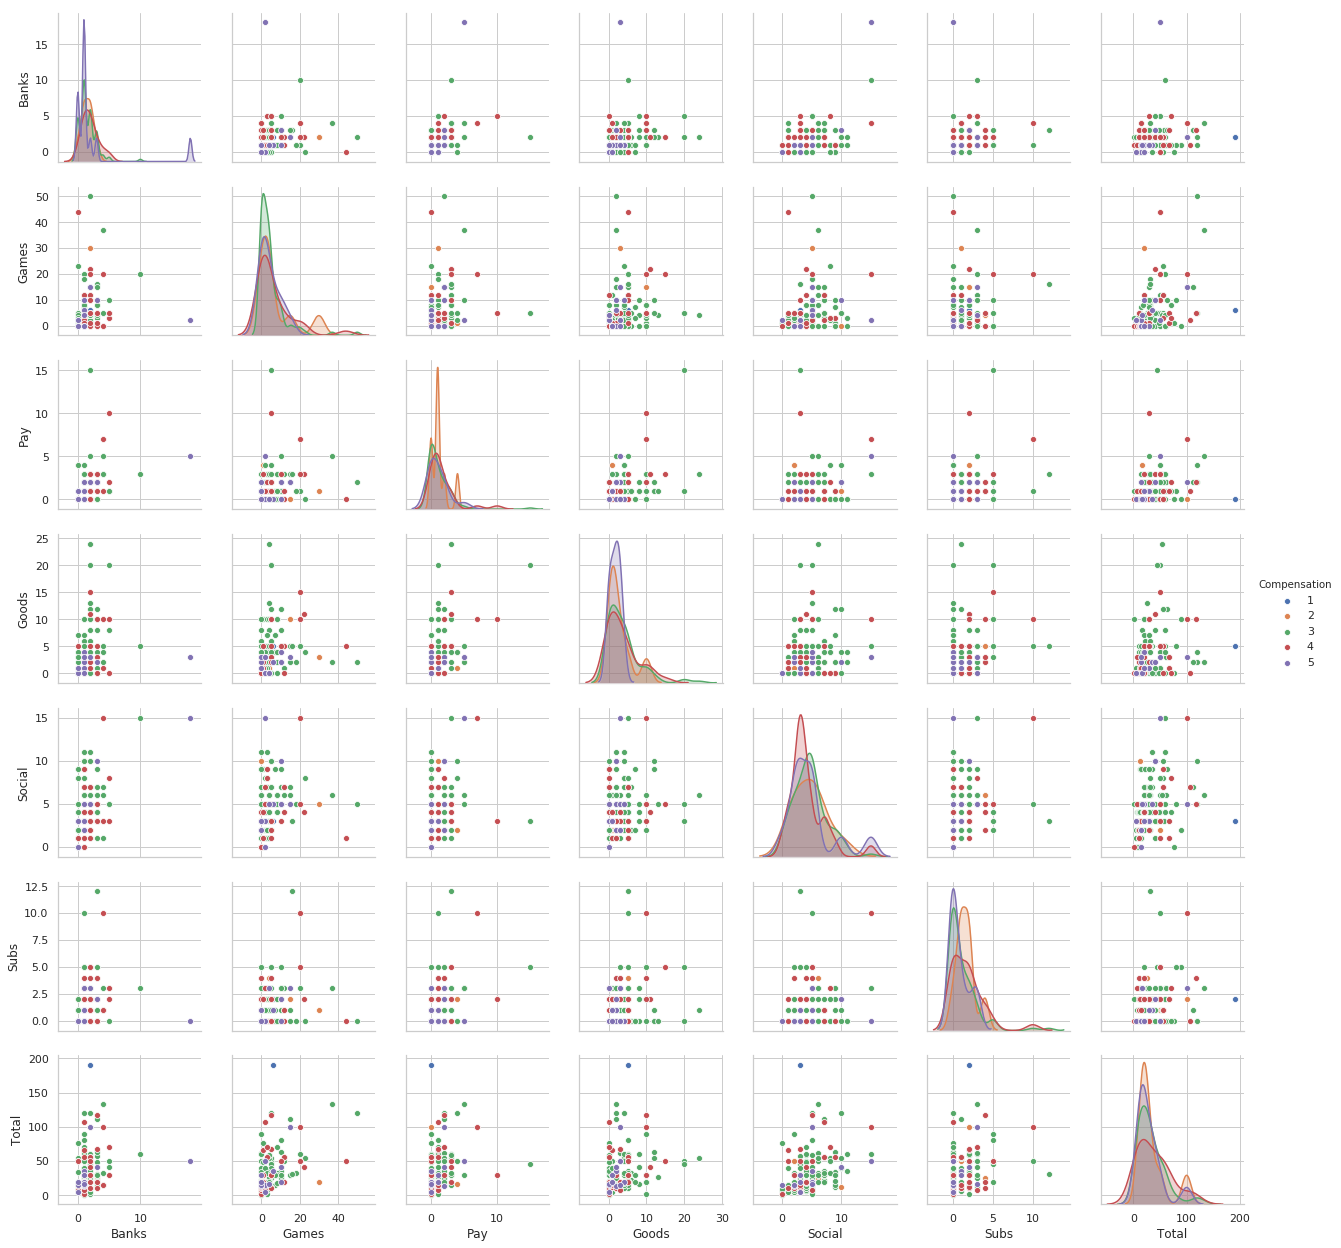

In [81]:
g = sns.pairplot(counts_data, vars=SHORT_COUNT_NAMES, kind='scatter', hue=SHORT_NAMES[COMPENSATION + '_norm'])  
# [rotateTickLabels(ax, 30, 'x') for ax in g.axes.flat]
# for ax in g.axes.flat:
#     for label in ax.get_yticklabels():
#         label.set_rotation(30)
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#     rotateTickLabels(ax, 30, 'x')
print('')

In [82]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import kstest

In [83]:
for c in interesting_columns_normed:
    print(c)
    try:
        p1 = shapiro(filtered_data[c].map(int))[1]
        p2 = normaltest(filtered_data[c].map(int))[1]
        anderson_values = anderson(filtered_data[c].map(int))
        if p1 < 0.05 and p2 < 0.05:
            print('Not normal')
        else:
            print('Normality: ' + str((p1, p2)))
        print('Anderson: ' + str(anderson_values))
        
        pK = kstest(filtered_data[c].map(int), cdf='norm')
        print(pK)
    except:
        print('Not int')

Gender_norm
Not normal
Anderson: AndersonResult(statistic=31.11086811995966, critical_values=array([0.562, 0.64 , 0.768, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.5058184302790693, pvalue=0.0)
My position is_norm
Not normal
Anderson: AndersonResult(statistic=30.804010015093496, critical_values=array([0.562, 0.64 , 0.768, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.5, pvalue=0.0)
What are your net earnings per year?_norm
Not normal
Anderson: AndersonResult(statistic=35.20675105547858, critical_values=array([0.562, 0.64 , 0.768, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
How do you feel about privacy policies on applications?_norm
Not normal
Anderson: AndersonResult(statistic=12.173602683790733, critical_values=array([0.562, 0.64 , 0.768, 0.895, 1.065]), significance_level=array([15. , 10. ,  

### Paying customers

In [128]:
def pay_customer(row):
    if row[COUNT_PURCHASE_GOODS + '_norm'] > 0:
        if row[COUNT_SUBSCRIPTIONS + '_norm'] > 0:
            return 1
        else:
            return 2
    else:
        if row[COUNT_SUBSCRIPTIONS + '_norm'] > 0:
            return 3
        else:
            return 4

In [129]:
PAYING = 'PAYING'
filtered_data[PAYING] = filtered_data.apply(pay_customer, axis=1)

In [130]:
filtered_data[PAYING].value_counts()

1    70
2    44
4    26
3    12
Name: PAYING, dtype: int64

In [93]:
filtered_data['is_student'] = np.nan

filtered_data.loc[(filtered_data[POSITION] == 'Student'), 'is_student'] = 'student'
filtered_data.loc[(filtered_data[POSITION] != 'Student'), 'is_student'] = 'no_student'

filtered_data['is_student'].unique()

array(['student', 'no_student'], dtype=object)

In [94]:
filtered_data['is_student'].value_counts()

student       112
no_student     40
Name: is_student, dtype: int64

In [131]:
grouped = filtered_data[[PAYING, 'is_student', WHERE_ARE_YOU]].groupby([PAYING, 'is_student']).count()

In [132]:
grouped['count'] = grouped[WHERE_ARE_YOU]

In [133]:
grouped=pd.DataFrame(grouped).reset_index()[[PAYING, 'is_student', 'count']]

('1', (0.9236928104575164, 0.7393790849673201, 0.5050653594771239, 1.0))
('2', (0.9236928104575164, 0.7393790849673201, 0.5050653594771239, 1.0))
('3', (0.9236928104575164, 0.7393790849673201, 0.5050653594771239, 1.0))
('4', (0.9236928104575164, 0.7393790849673201, 0.5050653594771239, 1.0))


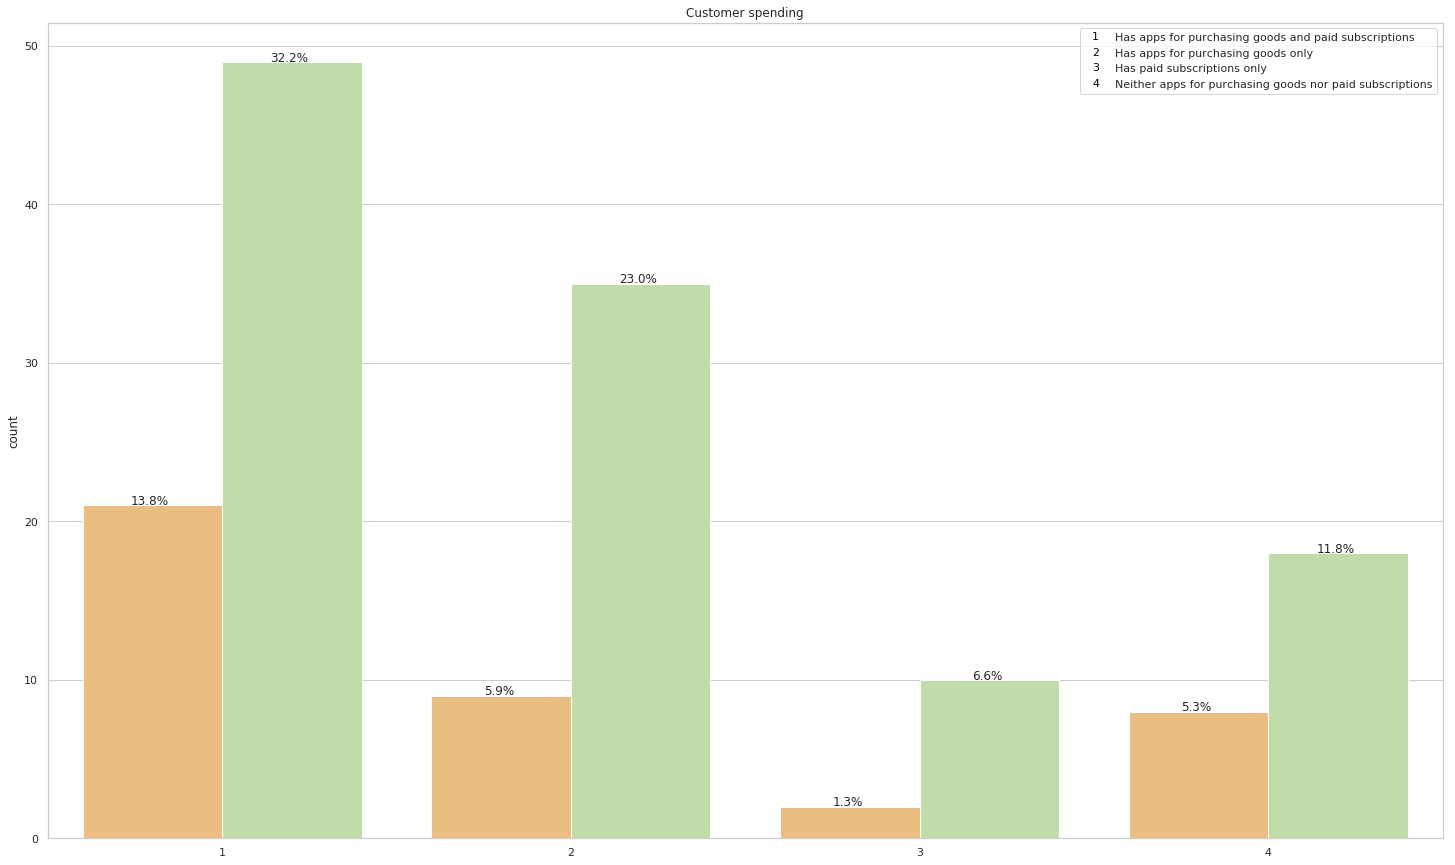

In [153]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(25,15))
the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0],  title='Customer spending')

class SpecialTextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent, width, height, fontsize,trans):
        print(tup)
        tx = Text(width/2., height/2, tup[0], fontsize=fontsize,
                  ha="center", va="center", color='black', fontweight="normal")
        return [tx]

df=grouped
ax=sns.barplot(x=PAYING, y='count', hue='is_student', data=df, palette='Spectral')
# sns.catplot(x='class', y=PAYING, hue='sex', data=df, kind='bar')
handltext = ["1", "2", "3", "4", "no_student", "student"]
labels = ["Has apps for purchasing goods and paid subscriptions", \
          'Has apps for purchasing goods only', \
          'Has paid subscriptions only', \
          'Neither apps for purchasing goods nor paid subscriptions',
          "No students", 'Students'  ]
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h if isinstance(h, str) else h.get_text()]  for h in t]
handles = [(h if isinstance(h, str) else h.get_text(),c.get_fc()) for h,c in zip(t, ax.patches)]
ax.legend(handles, labels, handler_map={tuple : SpecialTextHandler()}) 
plt.xlabel('')
add_percentage(df, ax)